In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libfmp 1.2.2 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.0.3 which is incompatible.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.


In [1]:
pip install --upgrade numpy

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libfmp 1.2.2 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.0.3 which is incompatible.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.4 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.


In [1]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

C:\Users\Juan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


tf.Tensor(-352.08017, shape=(), dtype=float32)


In [2]:
# Librerías necesarias
from random import seed  # Para inicializar el generador de números aleatorios
from random import randrange  # Para generar números aleatorios dentro de un rango
from csv import reader  # Para leer y analizar archivos CSV


#from google.colab import drive
import pandas as pd
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Activation


import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold
import os
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import ipywidgets as widgets
from IPython.display import display
from datetime import timedelta
from scipy.spatial.distance import euclidean
import sys
from matplotlib.lines import Line2D
import pickle
from scipy.spatial.distance import cdist


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import math
#from ctgan import CTGAN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import joblib


from sklearn.model_selection import StratifiedKFold

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import time
import gc

from sklearn.metrics import confusion_matrix

import pickle

from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import random
import tensorflow as tf



from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns


In [3]:
import os
print("Número de núcleos de CPU disponibles:", os.cpu_count())

Número de núcleos de CPU disponibles: 16


In [4]:
def reproducibilidad():
    # Numpy
    np.random.seed(3)

    # Python Random
    random.seed(3)

    # Tensorflow
    tf.random.set_seed(3)


def experimentosMLP(df_red_neuronal, nombre_archivo):
    reproducibilidad()

    modelos = {}

    skf = StratifiedKFold(n_splits=10, shuffle=True)

    X = df_red_neuronal.drop(labels='IMECA_Total', axis=1).values
    Y = df_red_neuronal['IMECA_Total'].values

    tiempo_inicio = time.time()  # Tiempo de inicio

    acc_promedio = 0.0  # Variable para acumular la precisión de cada modelo
    i=1
    for train_index, test_index in skf.split(X, Y):
        dim_entrada = X.shape[1]
        dim_salida = 4  # Número de clases
        na = ((2/3) * dim_entrada) + (dim_salida)
        na = math.trunc(na)

        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        modelo = Sequential()
        modelo.add(Dense(na, input_dim=dim_entrada, activation='tanh'))
        modelo.add(Dense(na/2, activation='tanh'))
        modelo.add(Dense(dim_salida, activation='softmax'))

        modelo.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=[categorical_accuracy])

        # Ajustar los índices de las clases para estar en el rango de 0 a 3
        Y_train_onehot = to_categorical(Y_train - 1, num_classes=dim_salida)
        Y_test_onehot = to_categorical(Y_test - 1, num_classes=dim_salida)

        history = modelo.fit(X_train, Y_train_onehot, validation_data=(X_test, Y_test_onehot), batch_size=100, epochs=50, 
                             shuffle=True, verbose=1, workers=12, callbacks=[EarlyStopping(monitor='categorical_accuracy', patience=3)])
                                #Originalmente shuffle es False
        modelos['modelo_prueba_kfold_' + str(len(modelos) + 1)] = modelo

        _, acc = modelo.evaluate(X_test, Y_test_onehot)  # Obtenemos la precisión del modelo
        acc_promedio += acc  # Acumulamos la precisión


        print('####\tResultado del Modelo K-Fold\t####', i)

        print(modelo.evaluate(X_test, Y_test_onehot))
        i=i+1
    tiempo_fin = time.time()  # Tiempo de finalización
    tiempo_total = tiempo_fin - tiempo_inicio  # Tiempo total

    acc_promedio /= 10  # Calculamos el promedio de la precisión

    print("Tiempo total:", tiempo_total)
    print("Promedio de categorical_accuracy:", acc_promedio)

    ruta_modelos ='Modelo_neuronal_'+ nombre_archivo + '.pkl'
    with open(ruta_modelos, 'wb') as archivo:
        pickle.dump(modelos, archivo)


    # Liberar la memoria de los objetos que ya no se necesitan
    del modelos
    del skf
    del X
    del Y

    gc.collect()

    return tiempo_total, acc_promedio



import pickle

def cargar_modelos(ruta_modelos):
    with open(ruta_modelos, 'rb') as archivo:
        modelos = pickle.load(archivo)
    return modelos

def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4, y_pred_labels

# DataFrame Normal

In [ ]:
TIMES1 = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES1)

#df_normalizado1['TIMESTAMP'] = pd.to_datetime(df_normalizado1['TIMESTAMP'])

df_red_neuronal1 = df_normalizado1#.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)

df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

num_columnas1 = df_red_neuronal1.shape[1]

print("Número de columnas:", num_columnas1)

In [ ]:
Tiempo, accuracy= experimentosMLP(df_red_neuronal1, nombre_archivo='Normal_Completo')
print(Tiempo, accuracy)

In [ ]:
df_rendimiento_Smote = pd.DataFrame({'Num_Características': 24,'Tiempo_Total': Tiempo, 'Accuracy_Promedio': accuracy}, index=[24])
    #'Num_Características': num_características,'Tiempo_Total': tiempo_total_lista, 'Accuracy_Promedio': acc_promedio_lista})

guardar_rendimiento = 'AaccuracyTime_Normal_Completo.csv'
df_rendimiento_Smote.to_csv(guardar_rendimiento, index=True)

In [ ]:
# Cargar los datos
TIMES1 = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES1)

#df_normalizado1['TIMESTAMP'] = pd.to_datetime(df_normalizado1['TIMESTAMP'])
df_red_neuronal1=df_normalizado1
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']


ruta_modelos = 'Modelo_neuronal_Normal_Completo.pkl'#'Modelo_neuronal_Normal_Completo.pkl'
modelos_kfold = cargar_modelos(ruta_modelos)

mejor_recall = -1
mejor_modelo = None
mejor_kfold = None

# Evaluar cada uno de los modelos k-fold
for nombre_modelo, modelo in modelos_kfold.items():
    recall_clase_4, _ = evaluar_modelo(modelo, X_test, y_test)
    
    if recall_clase_4 > mejor_recall:
        mejor_recall = recall_clase_4
        mejor_modelo = modelo
        mejor_kfold = nombre_modelo

# Guardar la información del mejor modelo en un archivo CSV
if mejor_modelo:
    mejores_modelos_info = {
        'Mejor_KFold': [mejor_kfold],
        'Mejor_Recall_Clase_4': [mejor_recall]
    }

    df_mejor_modelo = pd.DataFrame(mejores_modelos_info)
    df_mejor_modelo.to_csv('Aa_Mejores_Modelos_CCOMPLETO_CLASE4.csv', index=False)

    print(f"El mejor modelo es {mejor_kfold} con un recall de la clase 4 de {mejor_recall:.4f}.")
else:
    print("No se encontró un modelo válido.")

# DataFrame Varianza

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Varianza'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Varianza_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'.")




98429/98429 [==============================] - 47s 481us/step


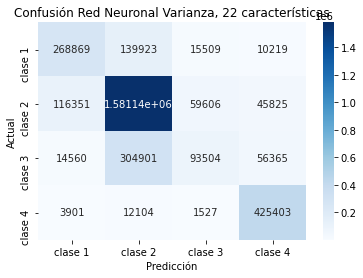

Confusión Red Neuronal Varianza, 22 características:
[[ 268869  139923   15509   10219]
 [ 116351 1581137   59606   45825]
 [  14560  304901   93504   56365]
 [   3901   12104    1527  425403]]
98429/98429 [==============================] - 45s 460us/step


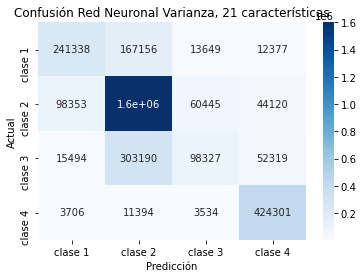

Confusión Red Neuronal Varianza, 21 características:
[[ 241338  167156   13649   12377]
 [  98353 1600001   60445   44120]
 [  15494  303190   98327   52319]
 [   3706   11394    3534  424301]]
98429/98429 [==============================] - 47s 473us/step


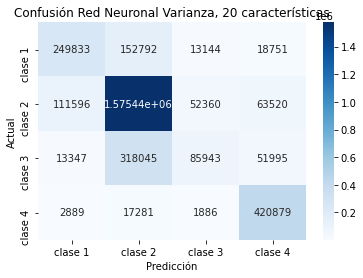

Confusión Red Neuronal Varianza, 20 características:
[[ 249833  152792   13144   18751]
 [ 111596 1575443   52360   63520]
 [  13347  318045   85943   51995]
 [   2889   17281    1886  420879]]
98429/98429 [==============================] - 45s 454us/step


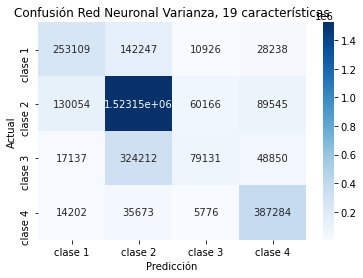

Confusión Red Neuronal Varianza, 19 características:
[[ 253109  142247   10926   28238]
 [ 130054 1523154   60166   89545]
 [  17137  324212   79131   48850]
 [  14202   35673    5776  387284]]
98429/98429 [==============================] - 47s 476us/step


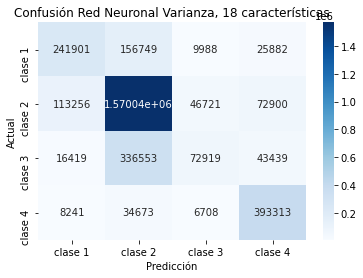

Confusión Red Neuronal Varianza, 18 características:
[[ 241901  156749    9988   25882]
 [ 113256 1570042   46721   72900]
 [  16419  336553   72919   43439]
 [   8241   34673    6708  393313]]
98429/98429 [==============================] - 46s 469us/step


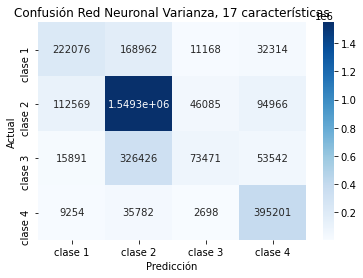

Confusión Red Neuronal Varianza, 17 características:
[[ 222076  168962   11168   32314]
 [ 112569 1549299   46085   94966]
 [  15891  326426   73471   53542]
 [   9254   35782    2698  395201]]
98429/98429 [==============================] - 49s 496us/step


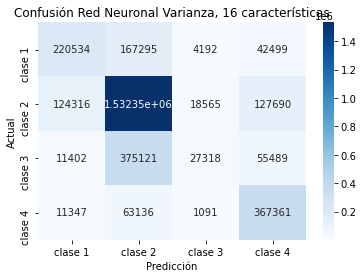

Confusión Red Neuronal Varianza, 16 características:
[[ 220534  167295    4192   42499]
 [ 124316 1532348   18565  127690]
 [  11402  375121   27318   55489]
 [  11347   63136    1091  367361]]
98429/98429 [==============================] - 46s 468us/step


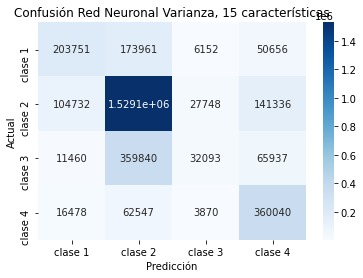

Confusión Red Neuronal Varianza, 15 características:
[[ 203751  173961    6152   50656]
 [ 104732 1529103   27748  141336]
 [  11460  359840   32093   65937]
 [  16478   62547    3870  360040]]
98429/98429 [==============================] - 45s 460us/step


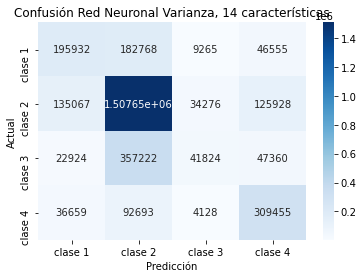

Confusión Red Neuronal Varianza, 14 características:
[[ 195932  182768    9265   46555]
 [ 135067 1507648   34276  125928]
 [  22924  357222   41824   47360]
 [  36659   92693    4128  309455]]
98429/98429 [==============================] - 47s 478us/step


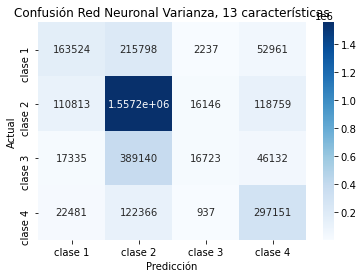

Confusión Red Neuronal Varianza, 13 características:
[[ 163524  215798    2237   52961]
 [ 110813 1557201   16146  118759]
 [  17335  389140   16723   46132]
 [  22481  122366     937  297151]]
98429/98429 [==============================] - 46s 464us/step


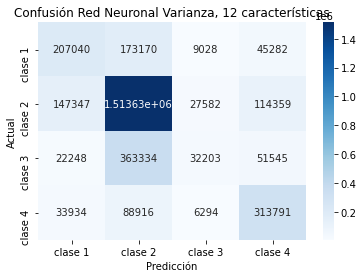

Confusión Red Neuronal Varianza, 12 características:
[[ 207040  173170    9028   45282]
 [ 147347 1513631   27582  114359]
 [  22248  363334   32203   51545]
 [  33934   88916    6294  313791]]
98429/98429 [==============================] - 46s 464us/step


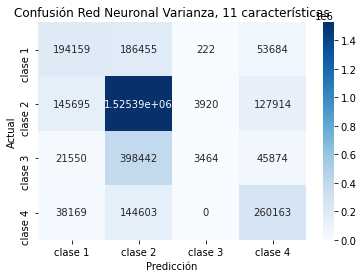

Confusión Red Neuronal Varianza, 11 características:
[[ 194159  186455     222   53684]
 [ 145695 1525390    3920  127914]
 [  21550  398442    3464   45874]
 [  38169  144603       0  260163]]
98429/98429 [==============================] - 45s 461us/step


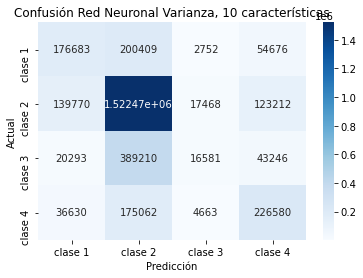

Confusión Red Neuronal Varianza, 10 características:
[[ 176683  200409    2752   54676]
 [ 139770 1522469   17468  123212]
 [  20293  389210   16581   43246]
 [  36630  175062    4663  226580]]
98429/98429 [==============================] - 46s 469us/step


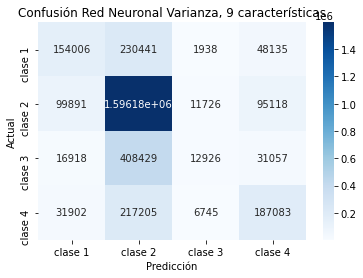

Confusión Red Neuronal Varianza, 9 características:
[[ 154006  230441    1938   48135]
 [  99891 1596184   11726   95118]
 [  16918  408429   12926   31057]
 [  31902  217205    6745  187083]]
98429/98429 [==============================] - 46s 462us/step


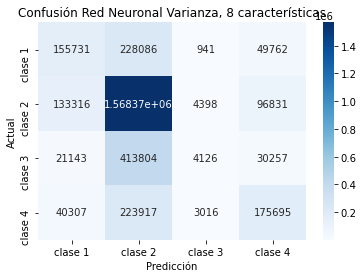

Confusión Red Neuronal Varianza, 8 características:
[[ 155731  228086     941   49762]
 [ 133316 1568374    4398   96831]
 [  21143  413804    4126   30257]
 [  40307  223917    3016  175695]]
98429/98429 [==============================] - 44s 449us/step


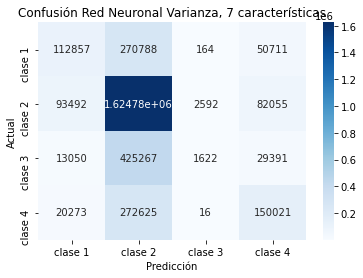

Confusión Red Neuronal Varianza, 7 características:
[[ 112857  270788     164   50711]
 [  93492 1624780    2592   82055]
 [  13050  425267    1622   29391]
 [  20273  272625      16  150021]]
98429/98429 [==============================] - 46s 468us/step


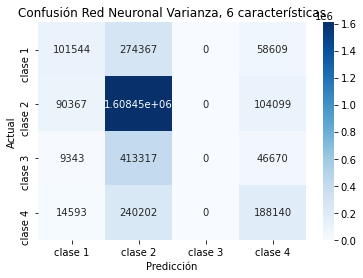

Confusión Red Neuronal Varianza, 6 características:
[[ 101544  274367       0   58609]
 [  90367 1608453       0  104099]
 [   9343  413317       0   46670]
 [  14593  240202       0  188140]]
98429/98429 [==============================] - 44s 451us/step


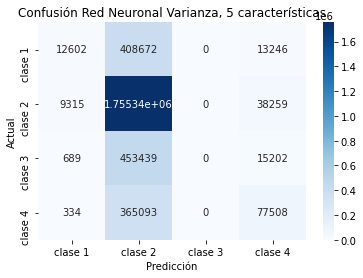

Confusión Red Neuronal Varianza, 5 características:
[[  12602  408672       0   13246]
 [   9315 1755345       0   38259]
 [    689  453439       0   15202]
 [    334  365093       0   77508]]
98429/98429 [==============================] - 44s 451us/step


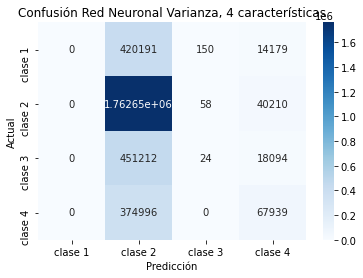

Confusión Red Neuronal Varianza, 4 características:
[[      0  420191     150   14179]
 [      0 1762651      58   40210]
 [      0  451212      24   18094]
 [      0  374996       0   67939]]
98429/98429 [==============================] - 45s 453us/step


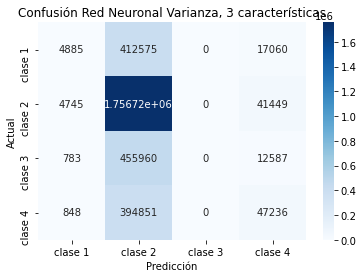

Confusión Red Neuronal Varianza, 3 características:
[[   4885  412575       0   17060]
 [   4745 1756725       0   41449]
 [    783  455960       0   12587]
 [    848  394851       0   47236]]
98429/98429 [==============================] - 48s 483us/step


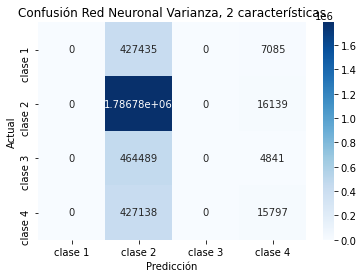

Confusión Red Neuronal Varianza, 2 características:
[[      0  427435       0    7085]
 [      0 1786780       0   16139]
 [      0  464489       0    4841]
 [      0  427138       0   15797]]
98429/98429 [==============================] - 49s 499us/step


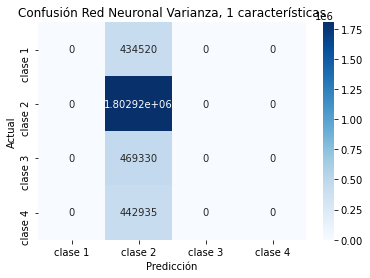

Confusión Red Neuronal Varianza, 1 características:
[[      0  434520       0       0]
 [      0 1802919       0       0]
 [      0  469330       0       0]
 [      0  442935       0       0]]


In [13]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Varianza'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal Varianza, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal Varianza, {i} características:")
    print(conf_matrix)
    i=i-1

# DataFrame MAD

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['MAD'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_MAD_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv'.")




98429/98429 [==============================] - 52s 527us/step


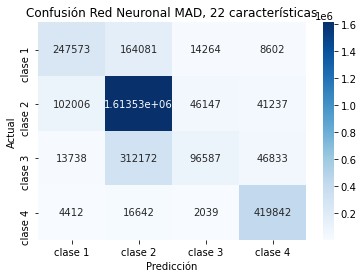

Confusión Red Neuronal MAD, 22 características:
[[ 247573  164081   14264    8602]
 [ 102006 1613529   46147   41237]
 [  13738  312172   96587   46833]
 [   4412   16642    2039  419842]]
98429/98429 [==============================] - 51s 519us/step


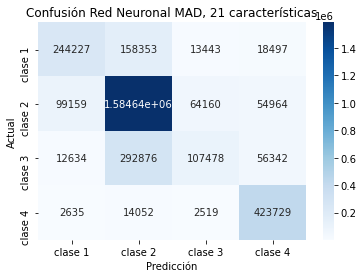

Confusión Red Neuronal MAD, 21 características:
[[ 244227  158353   13443   18497]
 [  99159 1584636   64160   54964]
 [  12634  292876  107478   56342]
 [   2635   14052    2519  423729]]
98429/98429 [==============================] - 54s 550us/step


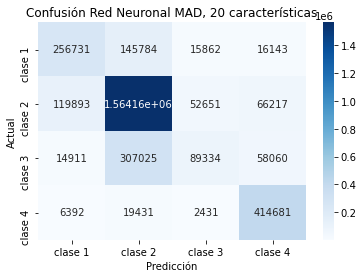

Confusión Red Neuronal MAD, 20 características:
[[ 256731  145784   15862   16143]
 [ 119893 1564158   52651   66217]
 [  14911  307025   89334   58060]
 [   6392   19431    2431  414681]]
98429/98429 [==============================] - 51s 516us/step


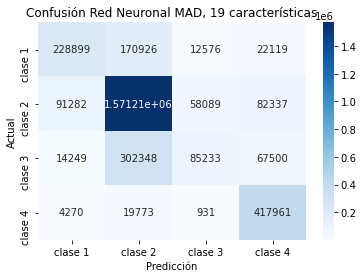

Confusión Red Neuronal MAD, 19 características:
[[ 228899  170926   12576   22119]
 [  91282 1571211   58089   82337]
 [  14249  302348   85233   67500]
 [   4270   19773     931  417961]]
98429/98429 [==============================] - 51s 516us/step


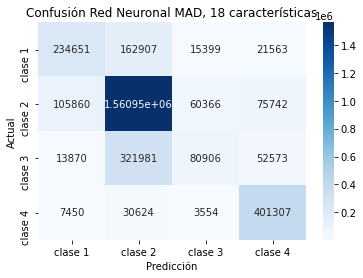

Confusión Red Neuronal MAD, 18 características:
[[ 234651  162907   15399   21563]
 [ 105860 1560951   60366   75742]
 [  13870  321981   80906   52573]
 [   7450   30624    3554  401307]]
98429/98429 [==============================] - 50s 512us/step


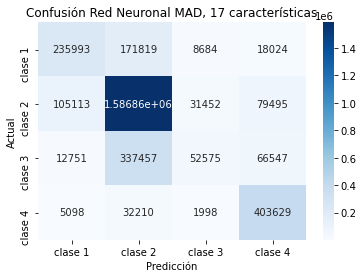

Confusión Red Neuronal MAD, 17 características:
[[ 235993  171819    8684   18024]
 [ 105113 1586859   31452   79495]
 [  12751  337457   52575   66547]
 [   5098   32210    1998  403629]]
98429/98429 [==============================] - 50s 507us/step


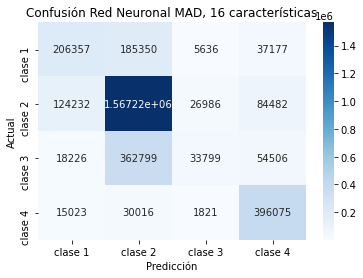

Confusión Red Neuronal MAD, 16 características:
[[ 206357  185350    5636   37177]
 [ 124232 1567219   26986   84482]
 [  18226  362799   33799   54506]
 [  15023   30016    1821  396075]]
98429/98429 [==============================] - 50s 508us/step


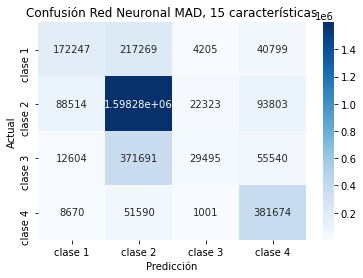

Confusión Red Neuronal MAD, 15 características:
[[ 172247  217269    4205   40799]
 [  88514 1598279   22323   93803]
 [  12604  371691   29495   55540]
 [   8670   51590    1001  381674]]
98429/98429 [==============================] - 50s 507us/step


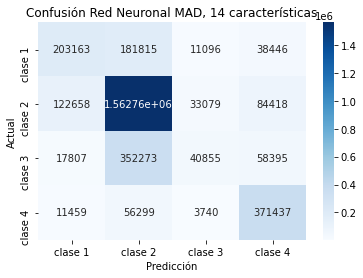

Confusión Red Neuronal MAD, 14 características:
[[ 203163  181815   11096   38446]
 [ 122658 1562764   33079   84418]
 [  17807  352273   40855   58395]
 [  11459   56299    3740  371437]]
98429/98429 [==============================] - 51s 513us/step


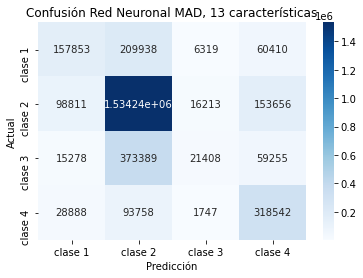

Confusión Red Neuronal MAD, 13 características:
[[ 157853  209938    6319   60410]
 [  98811 1534239   16213  153656]
 [  15278  373389   21408   59255]
 [  28888   93758    1747  318542]]
98429/98429 [==============================] - 50s 509us/step


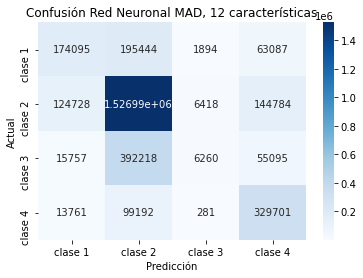

Confusión Red Neuronal MAD, 12 características:
[[ 174095  195444    1894   63087]
 [ 124728 1526989    6418  144784]
 [  15757  392218    6260   55095]
 [  13761   99192     281  329701]]
98429/98429 [==============================] - 51s 515us/step


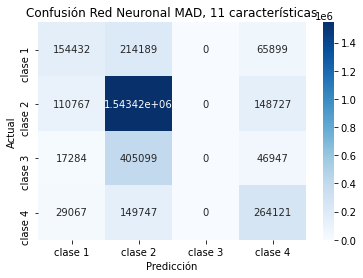

Confusión Red Neuronal MAD, 11 características:
[[ 154432  214189       0   65899]
 [ 110767 1543425       0  148727]
 [  17284  405099       0   46947]
 [  29067  149747       0  264121]]
98429/98429 [==============================] - 50s 507us/step


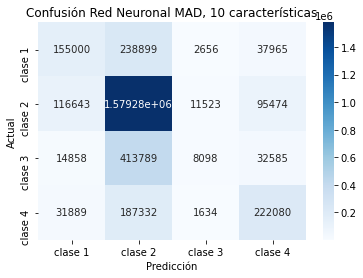

Confusión Red Neuronal MAD, 10 características:
[[ 155000  238899    2656   37965]
 [ 116643 1579279   11523   95474]
 [  14858  413789    8098   32585]
 [  31889  187332    1634  222080]]
98429/98429 [==============================] - 50s 507us/step


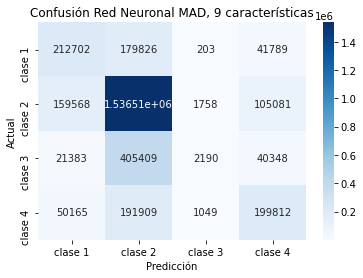

Confusión Red Neuronal MAD, 9 características:
[[ 212702  179826     203   41789]
 [ 159568 1536512    1758  105081]
 [  21383  405409    2190   40348]
 [  50165  191909    1049  199812]]
98429/98429 [==============================] - 51s 513us/step


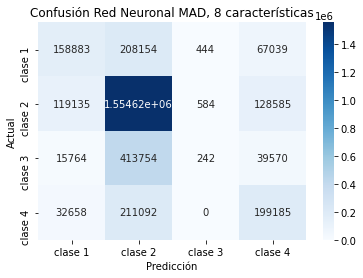

Confusión Red Neuronal MAD, 8 características:
[[ 158883  208154     444   67039]
 [ 119135 1554615     584  128585]
 [  15764  413754     242   39570]
 [  32658  211092       0  199185]]
98429/98429 [==============================] - 50s 511us/step


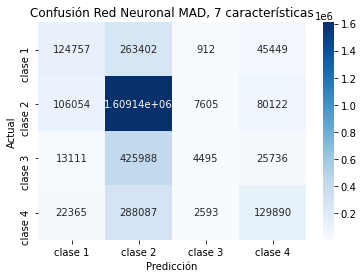

Confusión Red Neuronal MAD, 7 características:
[[ 124757  263402     912   45449]
 [ 106054 1609138    7605   80122]
 [  13111  425988    4495   25736]
 [  22365  288087    2593  129890]]
98429/98429 [==============================] - 50s 506us/step


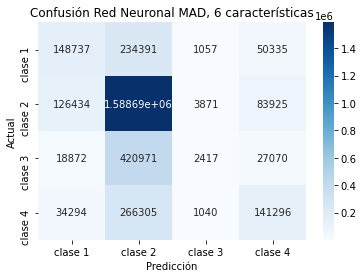

Confusión Red Neuronal MAD, 6 características:
[[ 148737  234391    1057   50335]
 [ 126434 1588689    3871   83925]
 [  18872  420971    2417   27070]
 [  34294  266305    1040  141296]]
98429/98429 [==============================] - 51s 516us/step


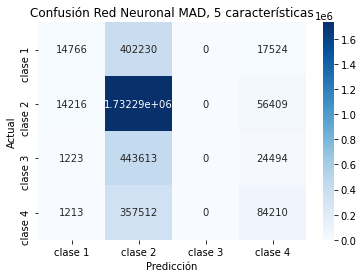

Confusión Red Neuronal MAD, 5 características:
[[  14766  402230       0   17524]
 [  14216 1732294       0   56409]
 [   1223  443613       0   24494]
 [   1213  357512       0   84210]]
98429/98429 [==============================] - 50s 512us/step


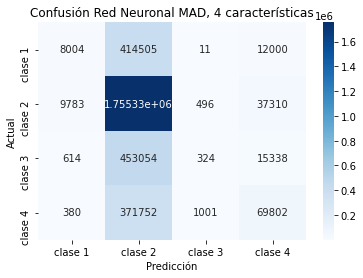

Confusión Red Neuronal MAD, 4 características:
[[   8004  414505      11   12000]
 [   9783 1755330     496   37310]
 [    614  453054     324   15338]
 [    380  371752    1001   69802]]
98429/98429 [==============================] - 50s 512us/step


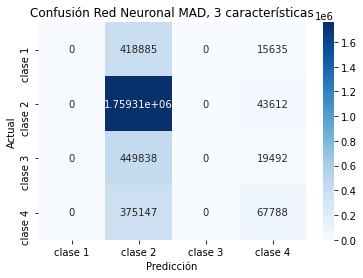

Confusión Red Neuronal MAD, 3 características:
[[      0  418885       0   15635]
 [      0 1759307       0   43612]
 [      0  449838       0   19492]
 [      0  375147       0   67788]]
98429/98429 [==============================] - 51s 515us/step


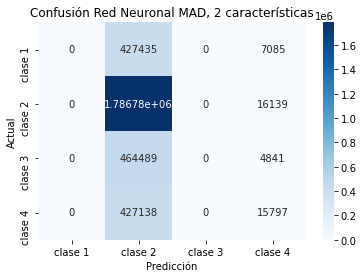

Confusión Red Neuronal MAD, 2 características:
[[      0  427435       0    7085]
 [      0 1786780       0   16139]
 [      0  464489       0    4841]
 [      0  427138       0   15797]]
98429/98429 [==============================] - 50s 504us/step


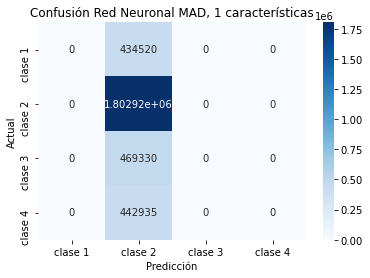

Confusión Red Neuronal MAD, 1 características:
[[      0  434520       0       0]
 [      0 1802919       0       0]
 [      0  469330       0       0]
 [      0  442935       0       0]]


In [14]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['MAD'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal MAD, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal MAD, {i} características:")
    print(conf_matrix)
    i=i-1



# DR

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['DR'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_DR_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv'.")




98429/98429 [==============================] - 52s 524us/step


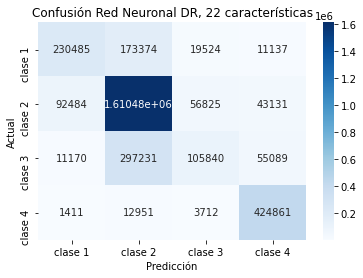

Confusión Red Neuronal DR, 22 características:
[[ 230485  173374   19524   11137]
 [  92484 1610479   56825   43131]
 [  11170  297231  105840   55089]
 [   1411   12951    3712  424861]]
98429/98429 [==============================] - 51s 522us/step


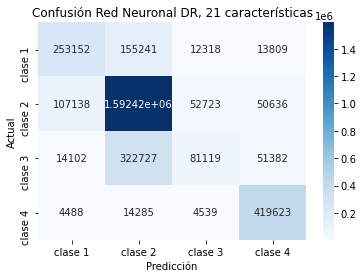

Confusión Red Neuronal DR, 21 características:
[[ 253152  155241   12318   13809]
 [ 107138 1592422   52723   50636]
 [  14102  322727   81119   51382]
 [   4488   14285    4539  419623]]
98429/98429 [==============================] - 52s 527us/step


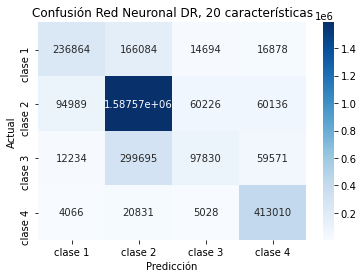

Confusión Red Neuronal DR, 20 características:
[[ 236864  166084   14694   16878]
 [  94989 1587568   60226   60136]
 [  12234  299695   97830   59571]
 [   4066   20831    5028  413010]]
98429/98429 [==============================] - 52s 531us/step


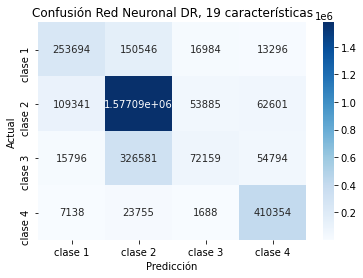

Confusión Red Neuronal DR, 19 características:
[[ 253694  150546   16984   13296]
 [ 109341 1577092   53885   62601]
 [  15796  326581   72159   54794]
 [   7138   23755    1688  410354]]
98429/98429 [==============================] - 52s 530us/step


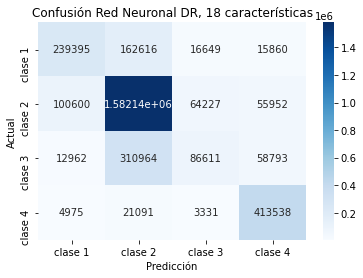

Confusión Red Neuronal DR, 18 características:
[[ 239395  162616   16649   15860]
 [ 100600 1582140   64227   55952]
 [  12962  310964   86611   58793]
 [   4975   21091    3331  413538]]
98429/98429 [==============================] - 52s 528us/step


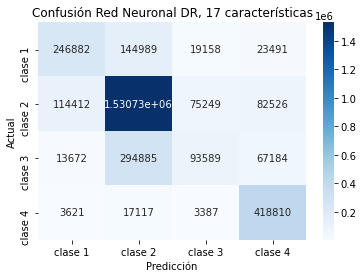

Confusión Red Neuronal DR, 17 características:
[[ 246882  144989   19158   23491]
 [ 114412 1530732   75249   82526]
 [  13672  294885   93589   67184]
 [   3621   17117    3387  418810]]
98429/98429 [==============================] - 51s 520us/step


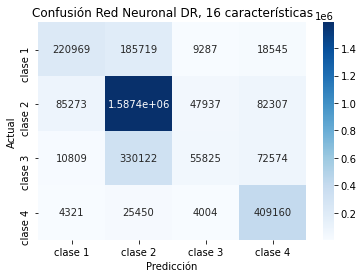

Confusión Red Neuronal DR, 16 características:
[[ 220969  185719    9287   18545]
 [  85273 1587402   47937   82307]
 [  10809  330122   55825   72574]
 [   4321   25450    4004  409160]]
98429/98429 [==============================] - 50s 511us/step


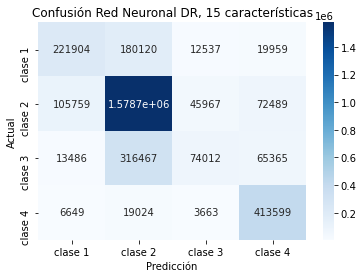

Confusión Red Neuronal DR, 15 características:
[[ 221904  180120   12537   19959]
 [ 105759 1578704   45967   72489]
 [  13486  316467   74012   65365]
 [   6649   19024    3663  413599]]
98429/98429 [==============================] - 51s 519us/step


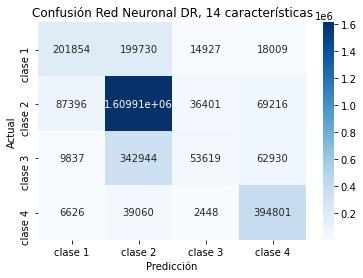

Confusión Red Neuronal DR, 14 características:
[[ 201854  199730   14927   18009]
 [  87396 1609906   36401   69216]
 [   9837  342944   53619   62930]
 [   6626   39060    2448  394801]]
98429/98429 [==============================] - 52s 525us/step


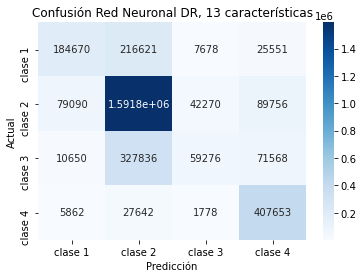

Confusión Red Neuronal DR, 13 características:
[[ 184670  216621    7678   25551]
 [  79090 1591803   42270   89756]
 [  10650  327836   59276   71568]
 [   5862   27642    1778  407653]]
98429/98429 [==============================] - 52s 524us/step


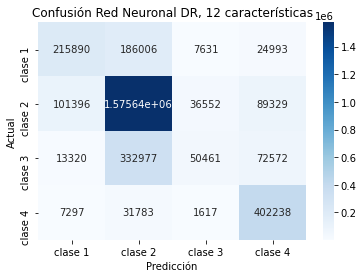

Confusión Red Neuronal DR, 12 características:
[[ 215890  186006    7631   24993]
 [ 101396 1575642   36552   89329]
 [  13320  332977   50461   72572]
 [   7297   31783    1617  402238]]
98429/98429 [==============================] - 51s 517us/step


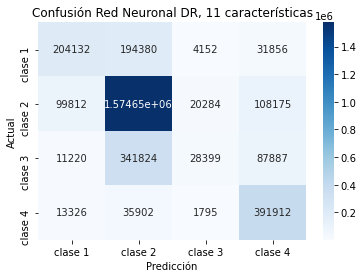

Confusión Red Neuronal DR, 11 características:
[[ 204132  194380    4152   31856]
 [  99812 1574648   20284  108175]
 [  11220  341824   28399   87887]
 [  13326   35902    1795  391912]]
98429/98429 [==============================] - 51s 520us/step


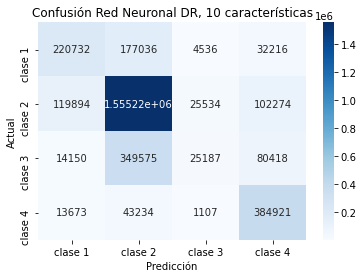

Confusión Red Neuronal DR, 10 características:
[[ 220732  177036    4536   32216]
 [ 119894 1555217   25534  102274]
 [  14150  349575   25187   80418]
 [  13673   43234    1107  384921]]
98429/98429 [==============================] - 52s 528us/step


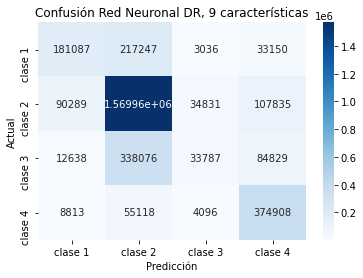

Confusión Red Neuronal DR, 9 características:
[[ 181087  217247    3036   33150]
 [  90289 1569964   34831  107835]
 [  12638  338076   33787   84829]
 [   8813   55118    4096  374908]]
98429/98429 [==============================] - 55s 556us/step


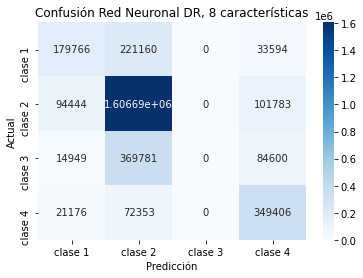

Confusión Red Neuronal DR, 8 características:
[[ 179766  221160       0   33594]
 [  94444 1606692       0  101783]
 [  14949  369781       0   84600]
 [  21176   72353       0  349406]]
98429/98429 [==============================] - 51s 516us/step


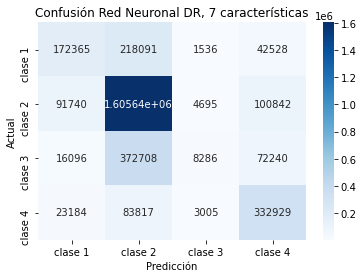

Confusión Red Neuronal DR, 7 características:
[[ 172365  218091    1536   42528]
 [  91740 1605642    4695  100842]
 [  16096  372708    8286   72240]
 [  23184   83817    3005  332929]]
98429/98429 [==============================] - 52s 523us/step


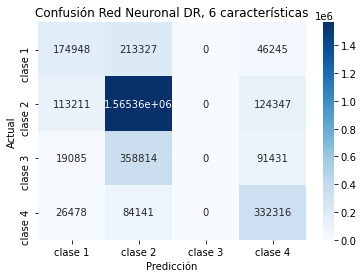

Confusión Red Neuronal DR, 6 características:
[[ 174948  213327       0   46245]
 [ 113211 1565361       0  124347]
 [  19085  358814       0   91431]
 [  26478   84141       0  332316]]
98429/98429 [==============================] - 53s 539us/step


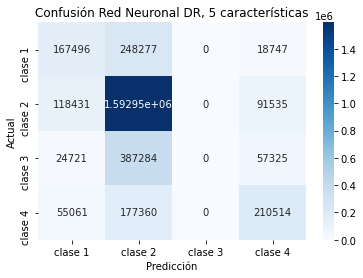

Confusión Red Neuronal DR, 5 características:
[[ 167496  248277       0   18747]
 [ 118431 1592953       0   91535]
 [  24721  387284       0   57325]
 [  55061  177360       0  210514]]
98429/98429 [==============================] - 52s 529us/step


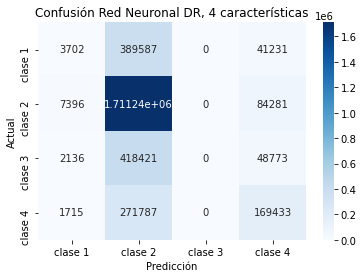

Confusión Red Neuronal DR, 4 características:
[[   3702  389587       0   41231]
 [   7396 1711242       0   84281]
 [   2136  418421       0   48773]
 [   1715  271787       0  169433]]
98429/98429 [==============================] - 53s 535us/step


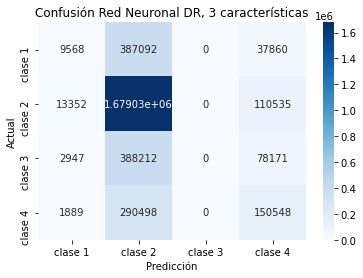

Confusión Red Neuronal DR, 3 características:
[[   9568  387092       0   37860]
 [  13352 1679032       0  110535]
 [   2947  388212       0   78171]
 [   1889  290498       0  150548]]
98429/98429 [==============================] - 52s 531us/step


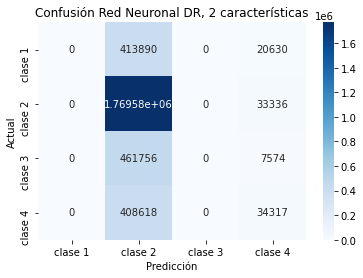

Confusión Red Neuronal DR, 2 características:
[[      0  413890       0   20630]
 [      0 1769583       0   33336]
 [      0  461756       0    7574]
 [      0  408618       0   34317]]
98429/98429 [==============================] - 53s 538us/step


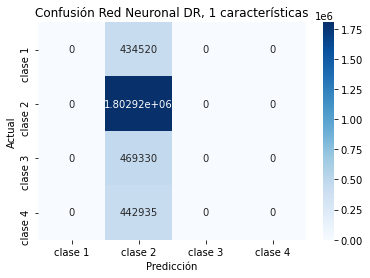

Confusión Red Neuronal DR, 1 características:
[[      0  434520       0       0]
 [      0 1802919       0       0]
 [      0  469330       0       0]
 [      0  442935       0       0]]


In [17]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['DR'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal DR, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal DR, {i} características:")
    print(conf_matrix)
    i=i-1

# PCA

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['PCA'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_PCA_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv'.")




98429/98429 [==============================] - 54s 545us/step


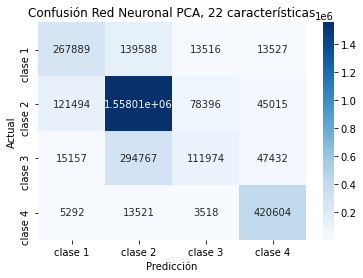

Confusión Red Neuronal PCA, 22 características:
[[ 267889  139588   13516   13527]
 [ 121494 1558014   78396   45015]
 [  15157  294767  111974   47432]
 [   5292   13521    3518  420604]]
98429/98429 [==============================] - 54s 548us/step


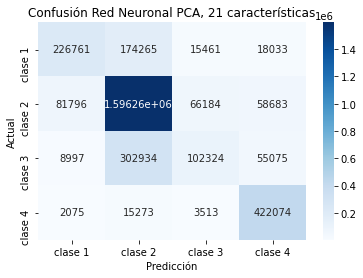

Confusión Red Neuronal PCA, 21 características:
[[ 226761  174265   15461   18033]
 [  81796 1596256   66184   58683]
 [   8997  302934  102324   55075]
 [   2075   15273    3513  422074]]
98429/98429 [==============================] - 53s 538us/step


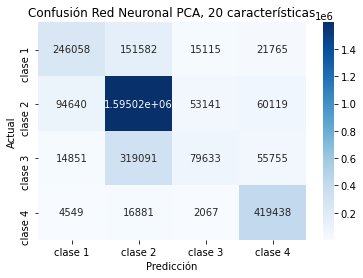

Confusión Red Neuronal PCA, 20 características:
[[ 246058  151582   15115   21765]
 [  94640 1595019   53141   60119]
 [  14851  319091   79633   55755]
 [   4549   16881    2067  419438]]
98429/98429 [==============================] - 54s 545us/step


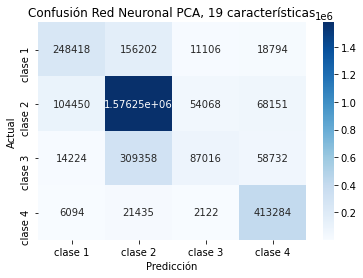

Confusión Red Neuronal PCA, 19 características:
[[ 248418  156202   11106   18794]
 [ 104450 1576250   54068   68151]
 [  14224  309358   87016   58732]
 [   6094   21435    2122  413284]]
98429/98429 [==============================] - 53s 533us/step


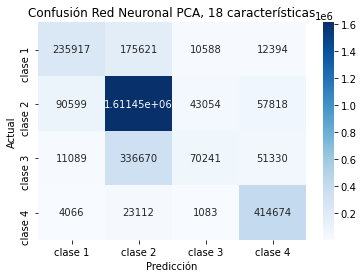

Confusión Red Neuronal PCA, 18 características:
[[ 235917  175621   10588   12394]
 [  90599 1611448   43054   57818]
 [  11089  336670   70241   51330]
 [   4066   23112    1083  414674]]
98429/98429 [==============================] - 48s 488us/step


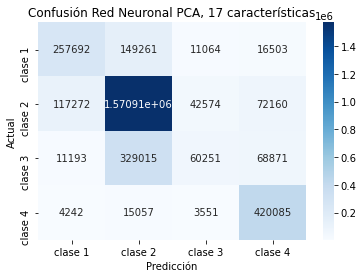

Confusión Red Neuronal PCA, 17 características:
[[ 257692  149261   11064   16503]
 [ 117272 1570913   42574   72160]
 [  11193  329015   60251   68871]
 [   4242   15057    3551  420085]]
98429/98429 [==============================] - 48s 487us/step


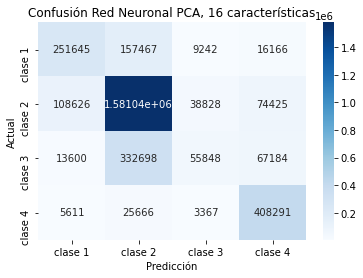

Confusión Red Neuronal PCA, 16 características:
[[ 251645  157467    9242   16166]
 [ 108626 1581040   38828   74425]
 [  13600  332698   55848   67184]
 [   5611   25666    3367  408291]]
98429/98429 [==============================] - 46s 467us/step


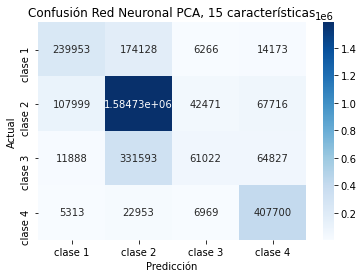

Confusión Red Neuronal PCA, 15 características:
[[ 239953  174128    6266   14173]
 [ 107999 1584733   42471   67716]
 [  11888  331593   61022   64827]
 [   5313   22953    6969  407700]]
98429/98429 [==============================] - 46s 468us/step


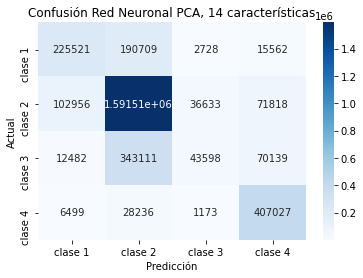

Confusión Red Neuronal PCA, 14 características:
[[ 225521  190709    2728   15562]
 [ 102956 1591512   36633   71818]
 [  12482  343111   43598   70139]
 [   6499   28236    1173  407027]]
98429/98429 [==============================] - 46s 469us/step


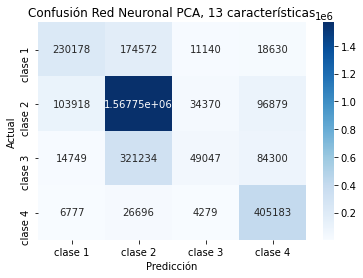

Confusión Red Neuronal PCA, 13 características:
[[ 230178  174572   11140   18630]
 [ 103918 1567752   34370   96879]
 [  14749  321234   49047   84300]
 [   6777   26696    4279  405183]]
98429/98429 [==============================] - 45s 455us/step


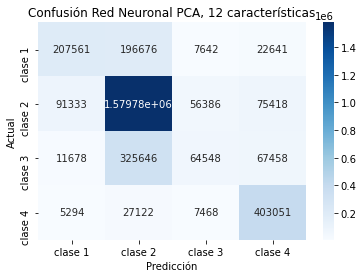

Confusión Red Neuronal PCA, 12 características:
[[ 207561  196676    7642   22641]
 [  91333 1579782   56386   75418]
 [  11678  325646   64548   67458]
 [   5294   27122    7468  403051]]
98429/98429 [==============================] - 47s 478us/step


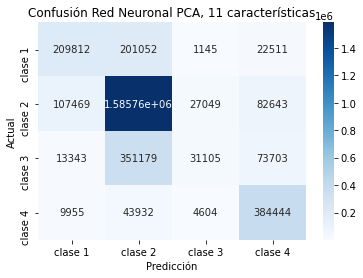

Confusión Red Neuronal PCA, 11 características:
[[ 209812  201052    1145   22511]
 [ 107469 1585758   27049   82643]
 [  13343  351179   31105   73703]
 [   9955   43932    4604  384444]]
98429/98429 [==============================] - 45s 461us/step


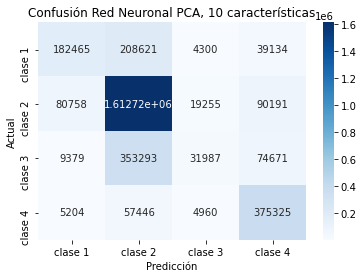

Confusión Red Neuronal PCA, 10 características:
[[ 182465  208621    4300   39134]
 [  80758 1612715   19255   90191]
 [   9379  353293   31987   74671]
 [   5204   57446    4960  375325]]
98429/98429 [==============================] - 46s 463us/step


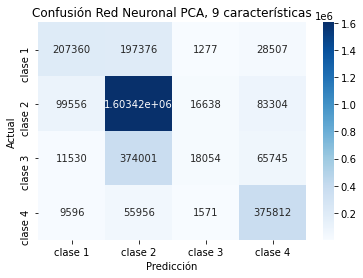

Confusión Red Neuronal PCA, 9 características:
[[ 207360  197376    1277   28507]
 [  99556 1603421   16638   83304]
 [  11530  374001   18054   65745]
 [   9596   55956    1571  375812]]
98429/98429 [==============================] - 47s 481us/step


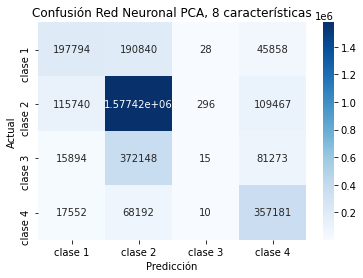

Confusión Red Neuronal PCA, 8 características:
[[ 197794  190840      28   45858]
 [ 115740 1577416     296  109467]
 [  15894  372148      15   81273]
 [  17552   68192      10  357181]]
98429/98429 [==============================] - 46s 465us/step


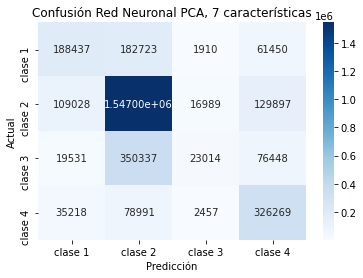

Confusión Red Neuronal PCA, 7 características:
[[ 188437  182723    1910   61450]
 [ 109028 1547005   16989  129897]
 [  19531  350337   23014   76448]
 [  35218   78991    2457  326269]]
98429/98429 [==============================] - 47s 474us/step


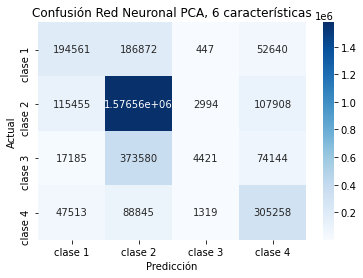

Confusión Red Neuronal PCA, 6 características:
[[ 194561  186872     447   52640]
 [ 115455 1576562    2994  107908]
 [  17185  373580    4421   74144]
 [  47513   88845    1319  305258]]
98429/98429 [==============================] - 45s 453us/step


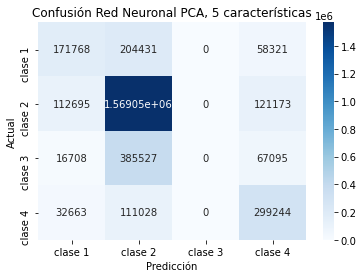

Confusión Red Neuronal PCA, 5 características:
[[ 171768  204431       0   58321]
 [ 112695 1569051       0  121173]
 [  16708  385527       0   67095]
 [  32663  111028       0  299244]]
98429/98429 [==============================] - 46s 468us/step


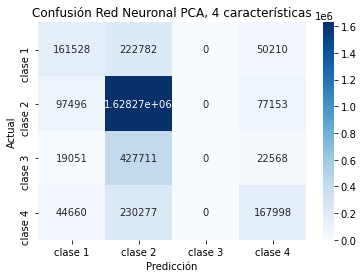

Confusión Red Neuronal PCA, 4 características:
[[ 161528  222782       0   50210]
 [  97496 1628270       0   77153]
 [  19051  427711       0   22568]
 [  44660  230277       0  167998]]
98429/98429 [==============================] - 47s 480us/step


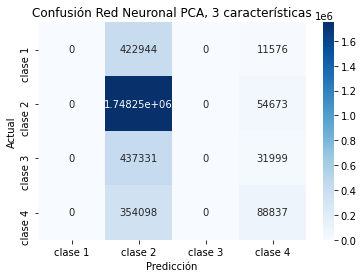

Confusión Red Neuronal PCA, 3 características:
[[      0  422944       0   11576]
 [      0 1748246       0   54673]
 [      0  437331       0   31999]
 [      0  354098       0   88837]]
98429/98429 [==============================] - 47s 472us/step


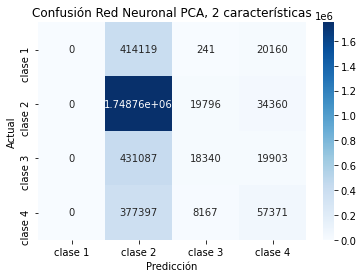

Confusión Red Neuronal PCA, 2 características:
[[      0  414119     241   20160]
 [      0 1748763   19796   34360]
 [      0  431087   18340   19903]
 [      0  377397    8167   57371]]
98429/98429 [==============================] - 46s 470us/step


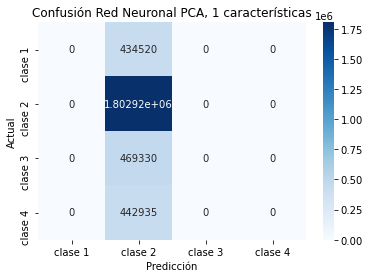

Confusión Red Neuronal PCA, 1 características:
[[      0  434520       0       0]
 [      0 1802919       0       0]
 [      0  469330       0       0]
 [      0  442935       0       0]]


In [18]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['PCA'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal PCA, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal PCA, {i} características:")
    print(conf_matrix)
    i=i-1

# Chi-cuadradada

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Chi-cuadradada'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Chi-cuadradada_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv'.")




98429/98429 [==============================] - 46s 471us/step


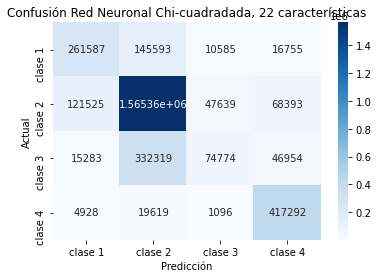

Confusión Red Neuronal Chi-cuadradada, 22 características:
[[ 261587  145593   10585   16755]
 [ 121525 1565362   47639   68393]
 [  15283  332319   74774   46954]
 [   4928   19619    1096  417292]]
98429/98429 [==============================] - 47s 478us/step


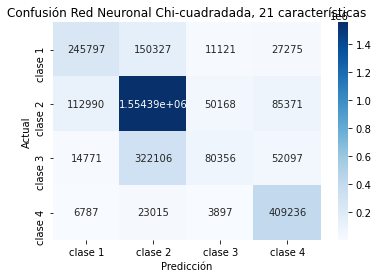

Confusión Red Neuronal Chi-cuadradada, 21 características:
[[ 245797  150327   11121   27275]
 [ 112990 1554390   50168   85371]
 [  14771  322106   80356   52097]
 [   6787   23015    3897  409236]]
98429/98429 [==============================] - 48s 483us/step


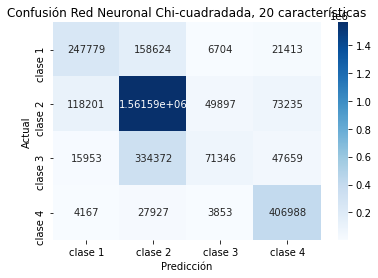

Confusión Red Neuronal Chi-cuadradada, 20 características:
[[ 247779  158624    6704   21413]
 [ 118201 1561586   49897   73235]
 [  15953  334372   71346   47659]
 [   4167   27927    3853  406988]]
98429/98429 [==============================] - 46s 470us/step


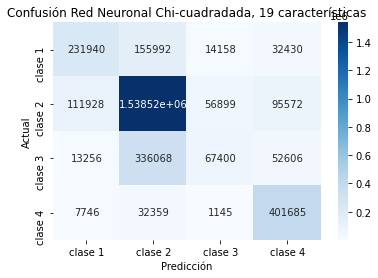

Confusión Red Neuronal Chi-cuadradada, 19 características:
[[ 231940  155992   14158   32430]
 [ 111928 1538520   56899   95572]
 [  13256  336068   67400   52606]
 [   7746   32359    1145  401685]]
98429/98429 [==============================] - 46s 471us/step


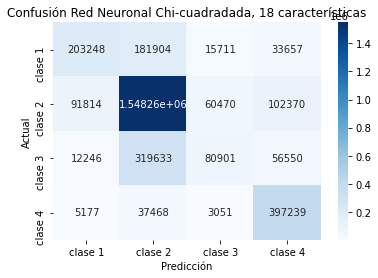

Confusión Red Neuronal Chi-cuadradada, 18 características:
[[ 203248  181904   15711   33657]
 [  91814 1548265   60470  102370]
 [  12246  319633   80901   56550]
 [   5177   37468    3051  397239]]
98429/98429 [==============================] - 46s 468us/step


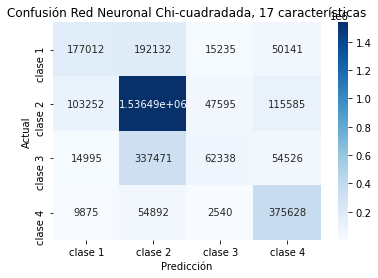

Confusión Red Neuronal Chi-cuadradada, 17 características:
[[ 177012  192132   15235   50141]
 [ 103252 1536487   47595  115585]
 [  14995  337471   62338   54526]
 [   9875   54892    2540  375628]]
98429/98429 [==============================] - 47s 477us/step


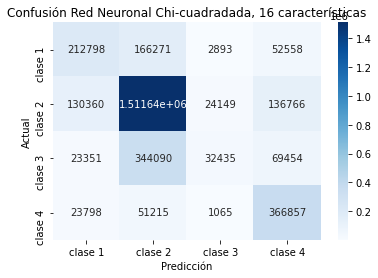

Confusión Red Neuronal Chi-cuadradada, 16 características:
[[ 212798  166271    2893   52558]
 [ 130360 1511644   24149  136766]
 [  23351  344090   32435   69454]
 [  23798   51215    1065  366857]]
98429/98429 [==============================] - 46s 470us/step


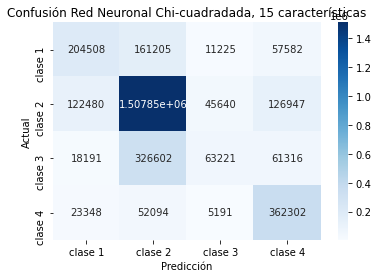

Confusión Red Neuronal Chi-cuadradada, 15 características:
[[ 204508  161205   11225   57582]
 [ 122480 1507852   45640  126947]
 [  18191  326602   63221   61316]
 [  23348   52094    5191  362302]]
98429/98429 [==============================] - 46s 471us/step


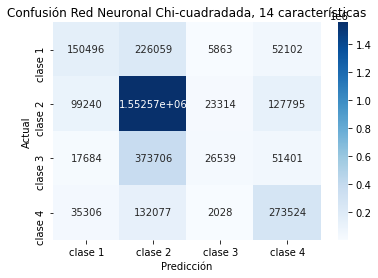

Confusión Red Neuronal Chi-cuadradada, 14 características:
[[ 150496  226059    5863   52102]
 [  99240 1552570   23314  127795]
 [  17684  373706   26539   51401]
 [  35306  132077    2028  273524]]
98429/98429 [==============================] - 46s 465us/step


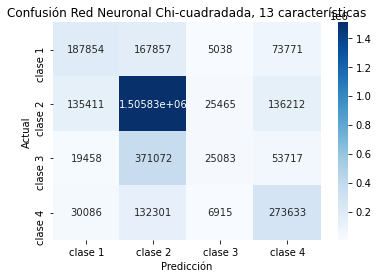

Confusión Red Neuronal Chi-cuadradada, 13 características:
[[ 187854  167857    5038   73771]
 [ 135411 1505831   25465  136212]
 [  19458  371072   25083   53717]
 [  30086  132301    6915  273633]]
98429/98429 [==============================] - 47s 477us/step


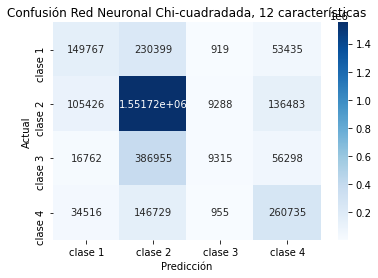

Confusión Red Neuronal Chi-cuadradada, 12 características:
[[ 149767  230399     919   53435]
 [ 105426 1551722    9288  136483]
 [  16762  386955    9315   56298]
 [  34516  146729     955  260735]]
98429/98429 [==============================] - 49s 493us/step


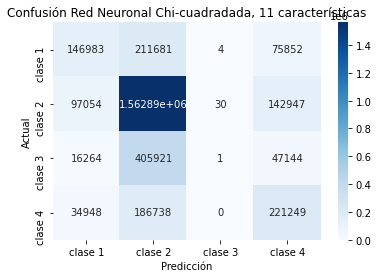

Confusión Red Neuronal Chi-cuadradada, 11 características:
[[ 146983  211681       4   75852]
 [  97054 1562888      30  142947]
 [  16264  405921       1   47144]
 [  34948  186738       0  221249]]
98429/98429 [==============================] - 51s 516us/step


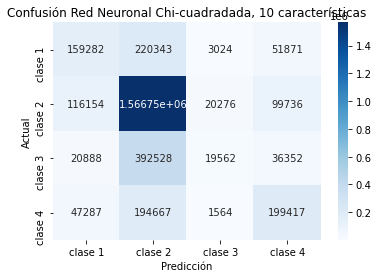

Confusión Red Neuronal Chi-cuadradada, 10 características:
[[ 159282  220343    3024   51871]
 [ 116154 1566753   20276   99736]
 [  20888  392528   19562   36352]
 [  47287  194667    1564  199417]]
98429/98429 [==============================] - 53s 537us/step


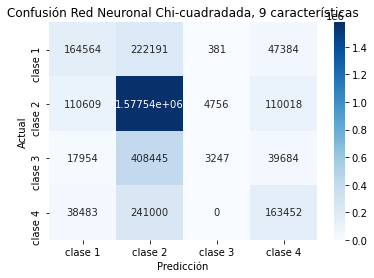

Confusión Red Neuronal Chi-cuadradada, 9 características:
[[ 164564  222191     381   47384]
 [ 110609 1577536    4756  110018]
 [  17954  408445    3247   39684]
 [  38483  241000       0  163452]]
98429/98429 [==============================] - 53s 540us/step


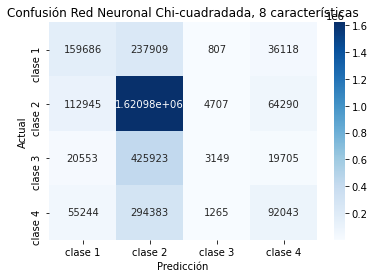

Confusión Red Neuronal Chi-cuadradada, 8 características:
[[ 159686  237909     807   36118]
 [ 112945 1620977    4707   64290]
 [  20553  425923    3149   19705]
 [  55244  294383    1265   92043]]
98429/98429 [==============================] - 53s 534us/step


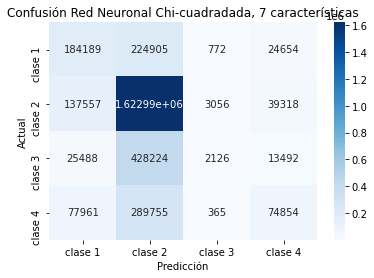

Confusión Red Neuronal Chi-cuadradada, 7 características:
[[ 184189  224905     772   24654]
 [ 137557 1622988    3056   39318]
 [  25488  428224    2126   13492]
 [  77961  289755     365   74854]]
98429/98429 [==============================] - 51s 522us/step


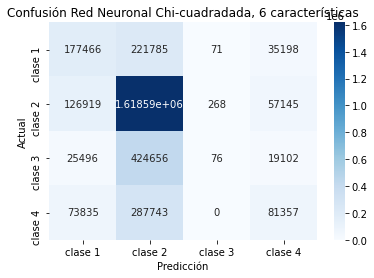

Confusión Red Neuronal Chi-cuadradada, 6 características:
[[ 177466  221785      71   35198]
 [ 126919 1618587     268   57145]
 [  25496  424656      76   19102]
 [  73835  287743       0   81357]]
98429/98429 [==============================] - 51s 522us/step


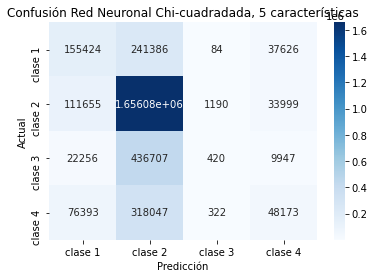

Confusión Red Neuronal Chi-cuadradada, 5 características:
[[ 155424  241386      84   37626]
 [ 111655 1656075    1190   33999]
 [  22256  436707     420    9947]
 [  76393  318047     322   48173]]
98429/98429 [==============================] - 52s 530us/step


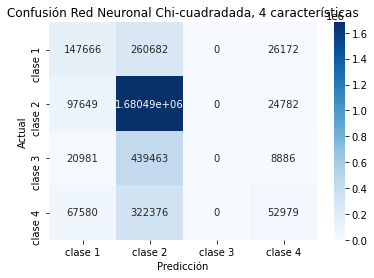

Confusión Red Neuronal Chi-cuadradada, 4 características:
[[ 147666  260682       0   26172]
 [  97649 1680488       0   24782]
 [  20981  439463       0    8886]
 [  67580  322376       0   52979]]
98429/98429 [==============================] - 52s 524us/step


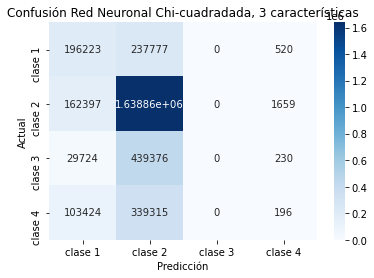

Confusión Red Neuronal Chi-cuadradada, 3 características:
[[ 196223  237777       0     520]
 [ 162397 1638863       0    1659]
 [  29724  439376       0     230]
 [ 103424  339315       0     196]]
98429/98429 [==============================] - 51s 522us/step


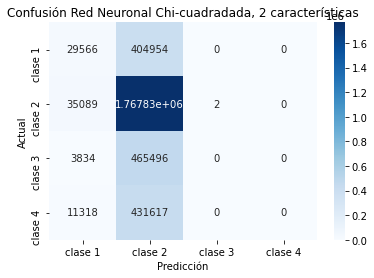

Confusión Red Neuronal Chi-cuadradada, 2 características:
[[  29566  404954       0       0]
 [  35089 1767828       2       0]
 [   3834  465496       0       0]
 [  11318  431617       0       0]]
98429/98429 [==============================] - 52s 525us/step


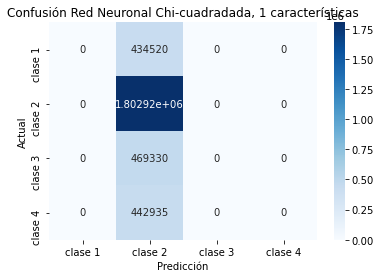

Confusión Red Neuronal Chi-cuadradada, 1 características:
[[      0  434520       0       0]
 [      0 1802919       0       0]
 [      0  469330       0       0]
 [      0  442935       0       0]]


In [19]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Chi-cuadradada'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal Chi-cuadradada, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal Chi-cuadradada, {i} características:")
    print(conf_matrix)
    i=i-1

# Pearson

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Pearson'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Pearson_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv'.")




98429/98429 [==============================] - 53s 539us/step


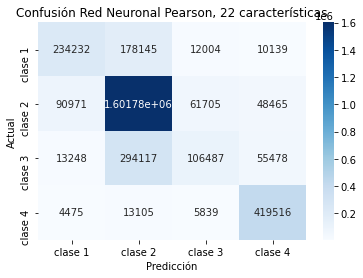

Confusión Red Neuronal Pearson, 22 características:
[[ 234232  178145   12004   10139]
 [  90971 1601778   61705   48465]
 [  13248  294117  106487   55478]
 [   4475   13105    5839  419516]]
98429/98429 [==============================] - 52s 530us/step


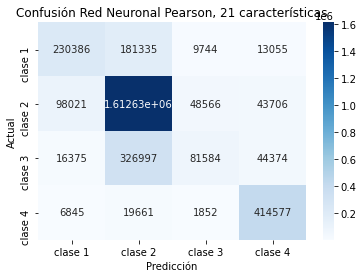

Confusión Red Neuronal Pearson, 21 características:
[[ 230386  181335    9744   13055]
 [  98021 1612626   48566   43706]
 [  16375  326997   81584   44374]
 [   6845   19661    1852  414577]]
98429/98429 [==============================] - 52s 523us/step


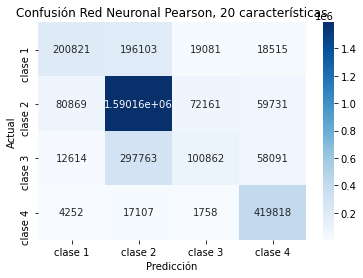

Confusión Red Neuronal Pearson, 20 características:
[[ 200821  196103   19081   18515]
 [  80869 1590158   72161   59731]
 [  12614  297763  100862   58091]
 [   4252   17107    1758  419818]]
98429/98429 [==============================] - 52s 527us/step


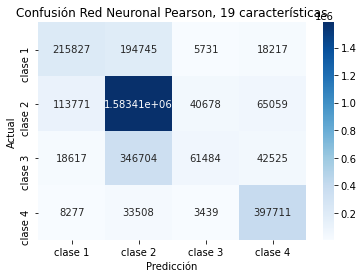

Confusión Red Neuronal Pearson, 19 características:
[[ 215827  194745    5731   18217]
 [ 113771 1583411   40678   65059]
 [  18617  346704   61484   42525]
 [   8277   33508    3439  397711]]
98429/98429 [==============================] - 51s 521us/step


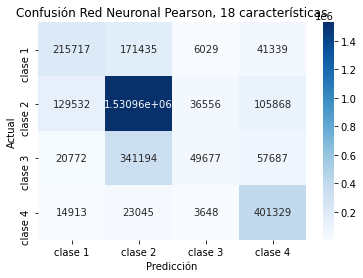

Confusión Red Neuronal Pearson, 18 características:
[[ 215717  171435    6029   41339]
 [ 129532 1530963   36556  105868]
 [  20772  341194   49677   57687]
 [  14913   23045    3648  401329]]
98429/98429 [==============================] - 52s 529us/step


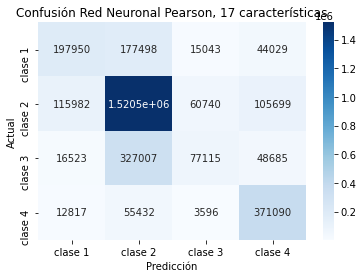

Confusión Red Neuronal Pearson, 17 características:
[[ 197950  177498   15043   44029]
 [ 115982 1520498   60740  105699]
 [  16523  327007   77115   48685]
 [  12817   55432    3596  371090]]
98429/98429 [==============================] - 52s 524us/step


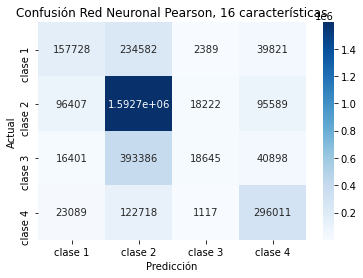

Confusión Red Neuronal Pearson, 16 características:
[[ 157728  234582    2389   39821]
 [  96407 1592701   18222   95589]
 [  16401  393386   18645   40898]
 [  23089  122718    1117  296011]]
98429/98429 [==============================] - 52s 525us/step


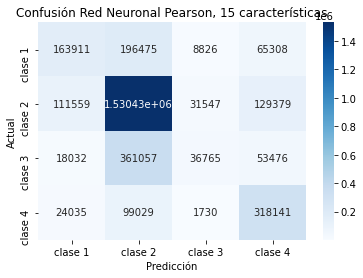

Confusión Red Neuronal Pearson, 15 características:
[[ 163911  196475    8826   65308]
 [ 111559 1530434   31547  129379]
 [  18032  361057   36765   53476]
 [  24035   99029    1730  318141]]
98429/98429 [==============================] - 52s 524us/step


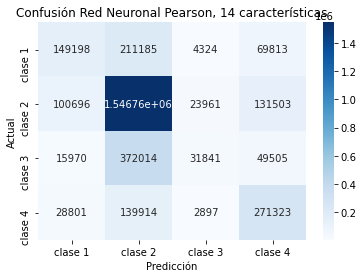

Confusión Red Neuronal Pearson, 14 características:
[[ 149198  211185    4324   69813]
 [ 100696 1546759   23961  131503]
 [  15970  372014   31841   49505]
 [  28801  139914    2897  271323]]
98429/98429 [==============================] - 52s 527us/step


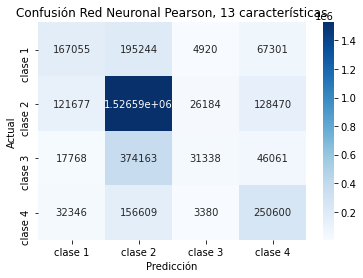

Confusión Red Neuronal Pearson, 13 características:
[[ 167055  195244    4920   67301]
 [ 121677 1526588   26184  128470]
 [  17768  374163   31338   46061]
 [  32346  156609    3380  250600]]
98429/98429 [==============================] - 52s 526us/step


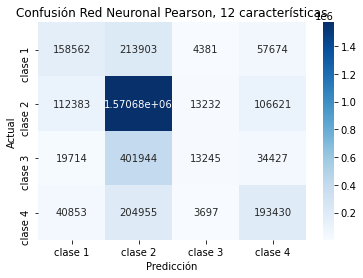

Confusión Red Neuronal Pearson, 12 características:
[[ 158562  213903    4381   57674]
 [ 112383 1570683   13232  106621]
 [  19714  401944   13245   34427]
 [  40853  204955    3697  193430]]
98429/98429 [==============================] - 52s 527us/step


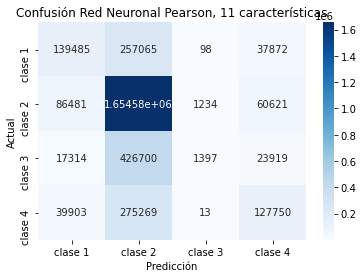

Confusión Red Neuronal Pearson, 11 características:
[[ 139485  257065      98   37872]
 [  86481 1654583    1234   60621]
 [  17314  426700    1397   23919]
 [  39903  275269      13  127750]]
98429/98429 [==============================] - 52s 526us/step


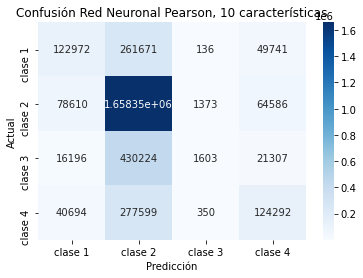

Confusión Red Neuronal Pearson, 10 características:
[[ 122972  261671     136   49741]
 [  78610 1658350    1373   64586]
 [  16196  430224    1603   21307]
 [  40694  277599     350  124292]]
98429/98429 [==============================] - 52s 533us/step


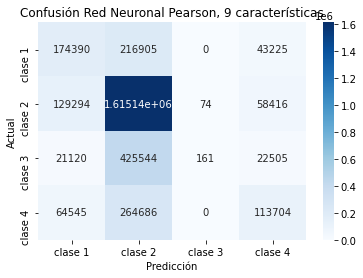

Confusión Red Neuronal Pearson, 9 características:
[[ 174390  216905       0   43225]
 [ 129294 1615135      74   58416]
 [  21120  425544     161   22505]
 [  64545  264686       0  113704]]
98429/98429 [==============================] - 52s 528us/step


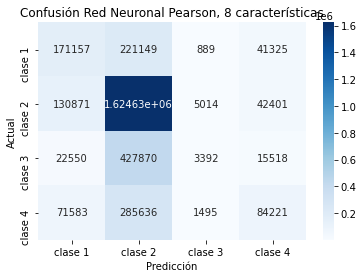

Confusión Red Neuronal Pearson, 8 características:
[[ 171157  221149     889   41325]
 [ 130871 1624633    5014   42401]
 [  22550  427870    3392   15518]
 [  71583  285636    1495   84221]]
98429/98429 [==============================] - 53s 533us/step


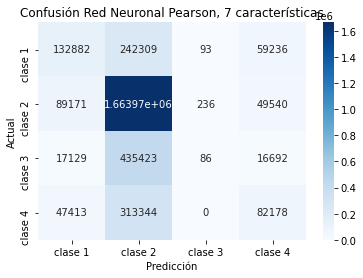

Confusión Red Neuronal Pearson, 7 características:
[[ 132882  242309      93   59236]
 [  89171 1663972     236   49540]
 [  17129  435423      86   16692]
 [  47413  313344       0   82178]]
98429/98429 [==============================] - 52s 526us/step


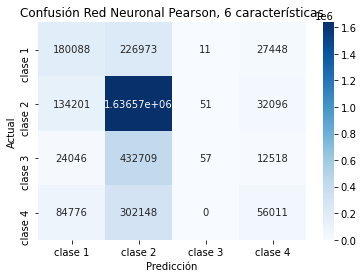

Confusión Red Neuronal Pearson, 6 características:
[[ 180088  226973      11   27448]
 [ 134201 1636571      51   32096]
 [  24046  432709      57   12518]
 [  84776  302148       0   56011]]
98429/98429 [==============================] - 53s 536us/step


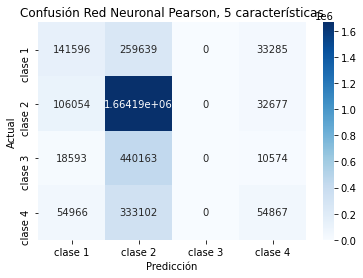

Confusión Red Neuronal Pearson, 5 características:
[[ 141596  259639       0   33285]
 [ 106054 1664188       0   32677]
 [  18593  440163       0   10574]
 [  54966  333102       0   54867]]
98429/98429 [==============================] - 52s 530us/step


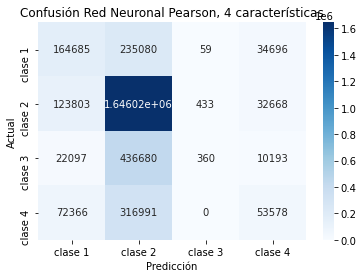

Confusión Red Neuronal Pearson, 4 características:
[[ 164685  235080      59   34696]
 [ 123803 1646015     433   32668]
 [  22097  436680     360   10193]
 [  72366  316991       0   53578]]
98429/98429 [==============================] - 52s 529us/step


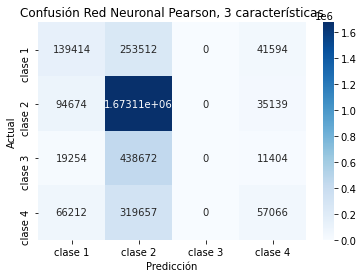

Confusión Red Neuronal Pearson, 3 características:
[[ 139414  253512       0   41594]
 [  94674 1673106       0   35139]
 [  19254  438672       0   11404]
 [  66212  319657       0   57066]]
98429/98429 [==============================] - 49s 499us/step


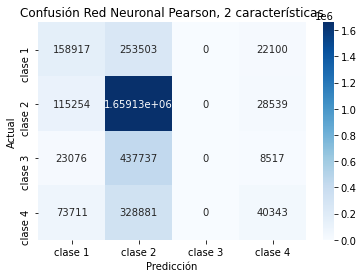

Confusión Red Neuronal Pearson, 2 características:
[[ 158917  253503       0   22100]
 [ 115254 1659126       0   28539]
 [  23076  437737       0    8517]
 [  73711  328881       0   40343]]
98429/98429 [==============================] - 45s 456us/step


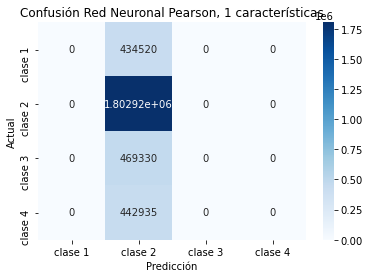

Confusión Red Neuronal Pearson, 1 características:
[[      0  434520       0       0]
 [      0 1802919       0       0]
 [      0  469330       0       0]
 [      0  442935       0       0]]


In [20]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Pearson'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal Pearson, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal Pearson, {i} características:")
    print(conf_matrix)
    i=i-1

# CART

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['CART'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_CART_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv'.")




98429/98429 [==============================] - 44s 444us/step


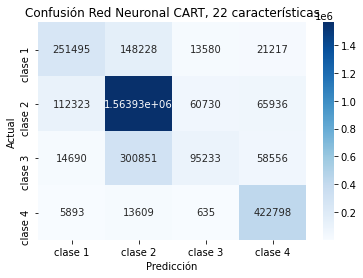

Confusión Red Neuronal CART, 22 características:
[[ 251495  148228   13580   21217]
 [ 112323 1563930   60730   65936]
 [  14690  300851   95233   58556]
 [   5893   13609     635  422798]]
98429/98429 [==============================] - 46s 465us/step


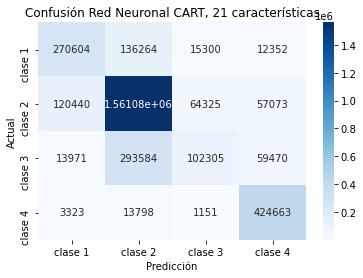

Confusión Red Neuronal CART, 21 características:
[[ 270604  136264   15300   12352]
 [ 120440 1561081   64325   57073]
 [  13971  293584  102305   59470]
 [   3323   13798    1151  424663]]
98429/98429 [==============================] - 47s 474us/step


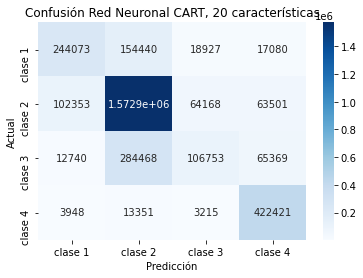

Confusión Red Neuronal CART, 20 características:
[[ 244073  154440   18927   17080]
 [ 102353 1572897   64168   63501]
 [  12740  284468  106753   65369]
 [   3948   13351    3215  422421]]
98429/98429 [==============================] - 46s 465us/step


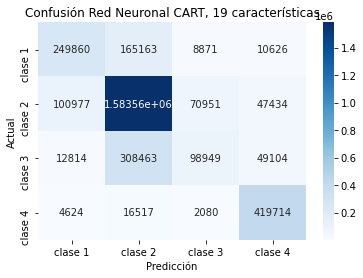

Confusión Red Neuronal CART, 19 características:
[[ 249860  165163    8871   10626]
 [ 100977 1583557   70951   47434]
 [  12814  308463   98949   49104]
 [   4624   16517    2080  419714]]
98429/98429 [==============================] - 46s 467us/step


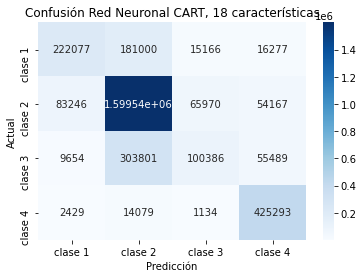

Confusión Red Neuronal CART, 18 características:
[[ 222077  181000   15166   16277]
 [  83246 1599536   65970   54167]
 [   9654  303801  100386   55489]
 [   2429   14079    1134  425293]]
98429/98429 [==============================] - 46s 465us/step


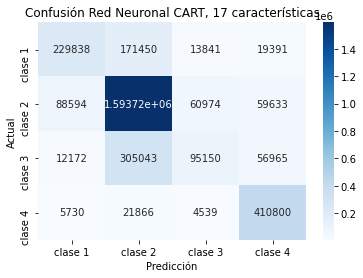

Confusión Red Neuronal CART, 17 características:
[[ 229838  171450   13841   19391]
 [  88594 1593718   60974   59633]
 [  12172  305043   95150   56965]
 [   5730   21866    4539  410800]]
98429/98429 [==============================] - 46s 463us/step


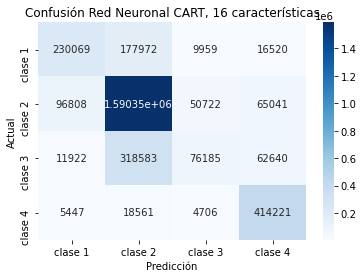

Confusión Red Neuronal CART, 16 características:
[[ 230069  177972    9959   16520]
 [  96808 1590348   50722   65041]
 [  11922  318583   76185   62640]
 [   5447   18561    4706  414221]]
98429/98429 [==============================] - 46s 466us/step


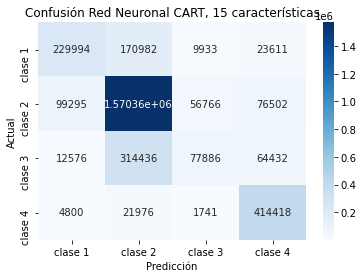

Confusión Red Neuronal CART, 15 características:
[[ 229994  170982    9933   23611]
 [  99295 1570356   56766   76502]
 [  12576  314436   77886   64432]
 [   4800   21976    1741  414418]]
98429/98429 [==============================] - 43s 433us/step


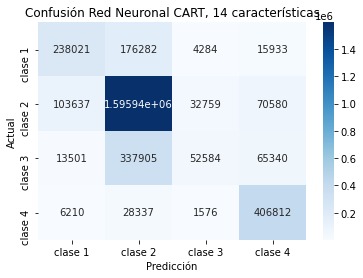

Confusión Red Neuronal CART, 14 características:
[[ 238021  176282    4284   15933]
 [ 103637 1595943   32759   70580]
 [  13501  337905   52584   65340]
 [   6210   28337    1576  406812]]
98429/98429 [==============================] - 43s 440us/step


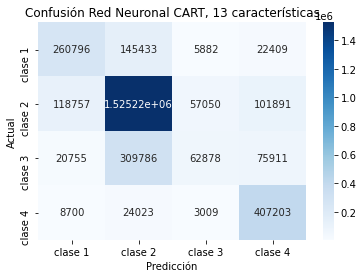

Confusión Red Neuronal CART, 13 características:
[[ 260796  145433    5882   22409]
 [ 118757 1525221   57050  101891]
 [  20755  309786   62878   75911]
 [   8700   24023    3009  407203]]
98429/98429 [==============================] - 44s 448us/step


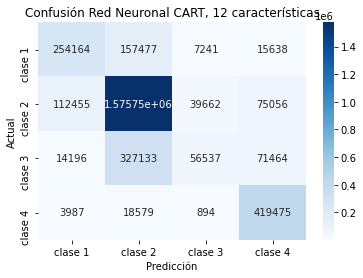

Confusión Red Neuronal CART, 12 características:
[[ 254164  157477    7241   15638]
 [ 112455 1575746   39662   75056]
 [  14196  327133   56537   71464]
 [   3987   18579     894  419475]]
98429/98429 [==============================] - 45s 459us/step


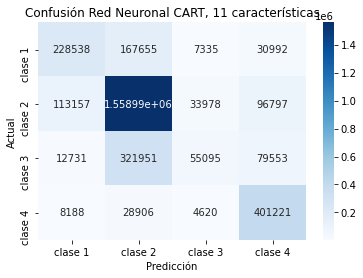

Confusión Red Neuronal CART, 11 características:
[[ 228538  167655    7335   30992]
 [ 113157 1558987   33978   96797]
 [  12731  321951   55095   79553]
 [   8188   28906    4620  401221]]
98429/98429 [==============================] - 45s 452us/step


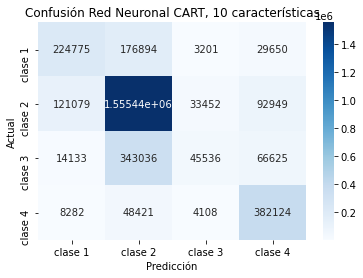

Confusión Red Neuronal CART, 10 características:
[[ 224775  176894    3201   29650]
 [ 121079 1555439   33452   92949]
 [  14133  343036   45536   66625]
 [   8282   48421    4108  382124]]
98429/98429 [==============================] - 46s 465us/step


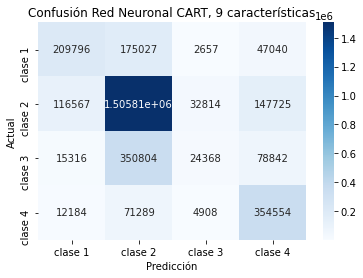

Confusión Red Neuronal CART, 9 características:
[[ 209796  175027    2657   47040]
 [ 116567 1505813   32814  147725]
 [  15316  350804   24368   78842]
 [  12184   71289    4908  354554]]
98429/98429 [==============================] - 45s 461us/step


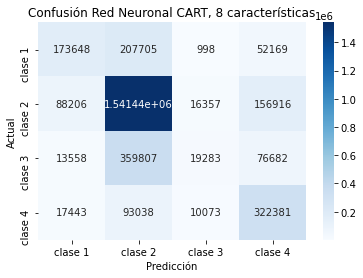

Confusión Red Neuronal CART, 8 características:
[[ 173648  207705     998   52169]
 [  88206 1541440   16357  156916]
 [  13558  359807   19283   76682]
 [  17443   93038   10073  322381]]
98429/98429 [==============================] - 45s 458us/step


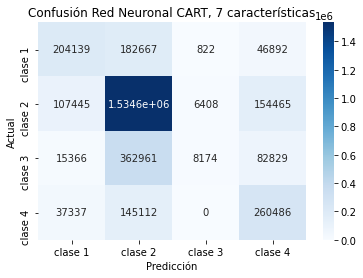

Confusión Red Neuronal CART, 7 características:
[[ 204139  182667     822   46892]
 [ 107445 1534601    6408  154465]
 [  15366  362961    8174   82829]
 [  37337  145112       0  260486]]
98429/98429 [==============================] - 45s 454us/step


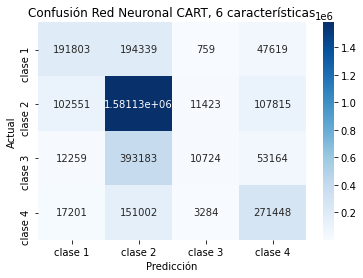

Confusión Red Neuronal CART, 6 características:
[[ 191803  194339     759   47619]
 [ 102551 1581130   11423  107815]
 [  12259  393183   10724   53164]
 [  17201  151002    3284  271448]]
98429/98429 [==============================] - 45s 453us/step


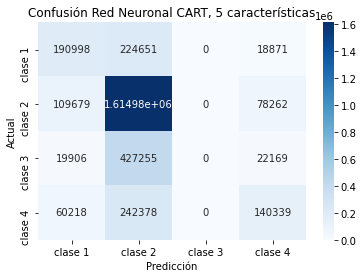

Confusión Red Neuronal CART, 5 características:
[[ 190998  224651       0   18871]
 [ 109679 1614978       0   78262]
 [  19906  427255       0   22169]
 [  60218  242378       0  140339]]
98429/98429 [==============================] - 44s 450us/step


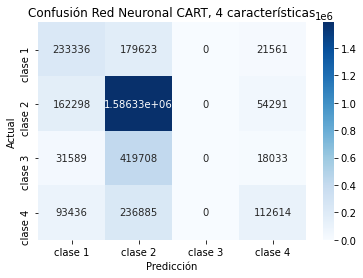

Confusión Red Neuronal CART, 4 características:
[[ 233336  179623       0   21561]
 [ 162298 1586330       0   54291]
 [  31589  419708       0   18033]
 [  93436  236885       0  112614]]
98429/98429 [==============================] - 44s 443us/step


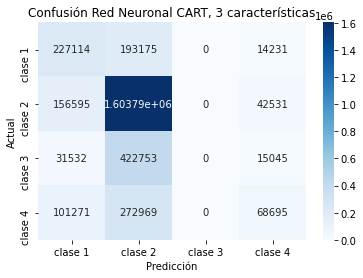

Confusión Red Neuronal CART, 3 características:
[[ 227114  193175       0   14231]
 [ 156595 1603793       0   42531]
 [  31532  422753       0   15045]
 [ 101271  272969       0   68695]]
98429/98429 [==============================] - 45s 458us/step


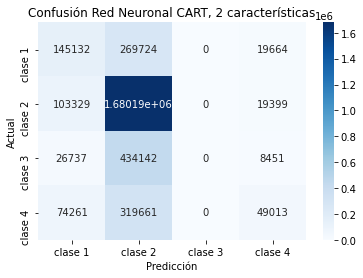

Confusión Red Neuronal CART, 2 características:
[[ 145132  269724       0   19664]
 [ 103329 1680191       0   19399]
 [  26737  434142       0    8451]
 [  74261  319661       0   49013]]
98429/98429 [==============================] - 45s 456us/step


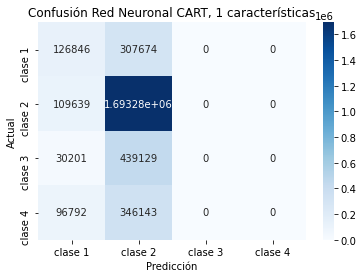

Confusión Red Neuronal CART, 1 características:
[[ 126846  307674       0       0]
 [ 109639 1693280       0       0]
 [  30201  439129       0       0]
 [  96792  346143       0       0]]


In [21]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['CART'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal CART, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal CART, {i} características:")
    print(conf_matrix)
    i=i-1

# ID3

In [ ]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['ID3'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_ID3_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv'.")




['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Chill_Avg', 'Wind_Speed_Max', 'T_amb_Avg', 'Irradiance_Avg']
98429/98429 [==============================] - 47s 474us/step


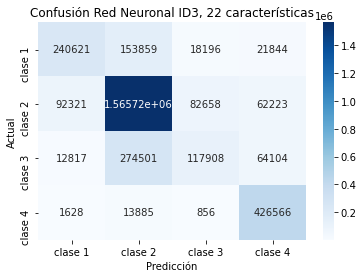

Confusión Red Neuronal ID3, 22 características:
[[ 240621  153859   18196   21844]
 [  92321 1565717   82658   62223]
 [  12817  274501  117908   64104]
 [   1628   13885     856  426566]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Chill_Avg', 'Wind_Speed_Max', 'T_amb_Avg']
98429/98429 [==============================] - 47s 474us/step


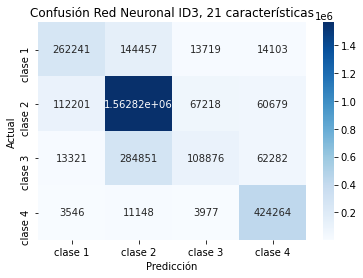

Confusión Red Neuronal ID3, 21 características:
[[ 262241  144457   13719   14103]
 [ 112201 1562821   67218   60679]
 [  13321  284851  108876   62282]
 [   3546   11148    3977  424264]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Chill_Avg', 'Wind_Speed_Max']
98429/98429 [==============================] - 47s 475us/step


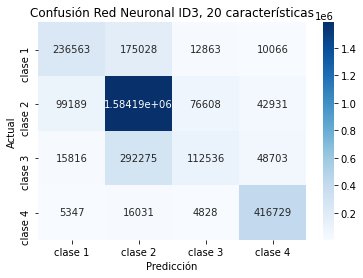

Confusión Red Neuronal ID3, 20 características:
[[ 236563  175028   12863   10066]
 [  99189 1584191   76608   42931]
 [  15816  292275  112536   48703]
 [   5347   16031    4828  416729]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Chill_Avg']
98429/98429 [==============================] - 47s 473us/step


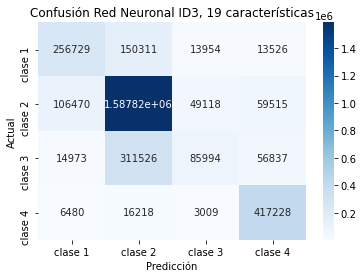

Confusión Red Neuronal ID3, 19 características:
[[ 256729  150311   13954   13526]
 [ 106470 1587816   49118   59515]
 [  14973  311526   85994   56837]
 [   6480   16218    3009  417228]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Speed_Avg']
98429/98429 [==============================] - 47s 475us/step


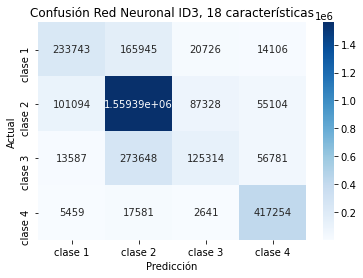

Confusión Red Neuronal ID3, 18 características:
[[ 233743  165945   20726   14106]
 [ 101094 1559393   87328   55104]
 [  13587  273648  125314   56781]
 [   5459   17581    2641  417254]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std', 'Irradiation_Tot']
98429/98429 [==============================] - 46s 463us/step


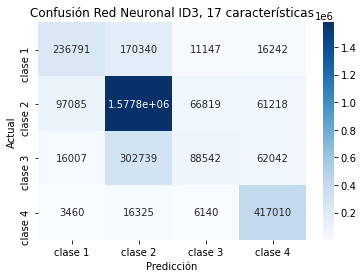

Confusión Red Neuronal ID3, 17 características:
[[ 236791  170340   11147   16242]
 [  97085 1577797   66819   61218]
 [  16007  302739   88542   62042]
 [   3460   16325    6140  417010]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std']
98429/98429 [==============================] - 45s 454us/step


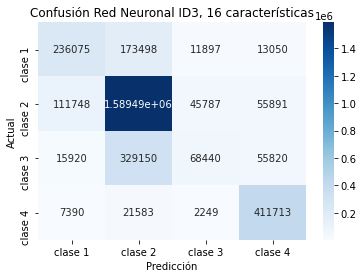

Confusión Red Neuronal ID3, 16 características:
[[ 236075  173498   11897   13050]
 [ 111748 1589493   45787   55891]
 [  15920  329150   68440   55820]
 [   7390   21583    2249  411713]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot']
98429/98429 [==============================] - 46s 462us/step


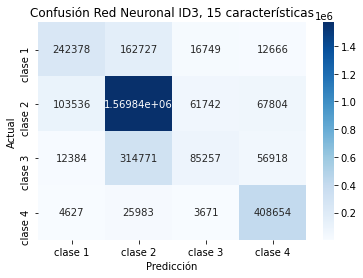

Confusión Red Neuronal ID3, 15 características:
[[ 242378  162727   16749   12666]
 [ 103536 1569837   61742   67804]
 [  12384  314771   85257   56918]
 [   4627   25983    3671  408654]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg']
98429/98429 [==============================] - 46s 471us/step


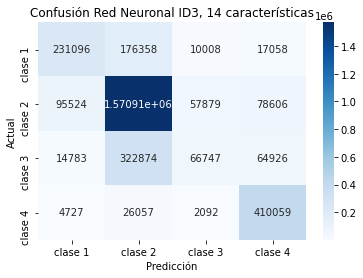

Confusión Red Neuronal ID3, 14 características:
[[ 231096  176358   10008   17058]
 [  95524 1570910   57879   78606]
 [  14783  322874   66747   64926]
 [   4727   26057    2092  410059]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM']
98429/98429 [==============================] - 47s 479us/step


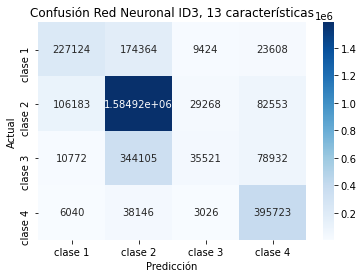

Confusión Red Neuronal ID3, 13 características:
[[ 227124  174364    9424   23608]
 [ 106183 1584915   29268   82553]
 [  10772  344105   35521   78932]
 [   6040   38146    3026  395723]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std']
98429/98429 [==============================] - 48s 485us/step


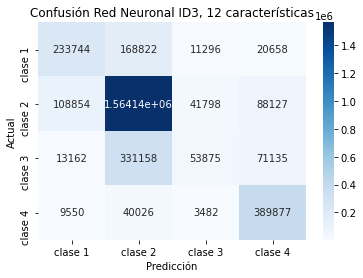

Confusión Red Neuronal ID3, 12 características:
[[ 233744  168822   11296   20658]
 [ 108854 1564140   41798   88127]
 [  13162  331158   53875   71135]
 [   9550   40026    3482  389877]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min']
98429/98429 [==============================] - 47s 478us/step


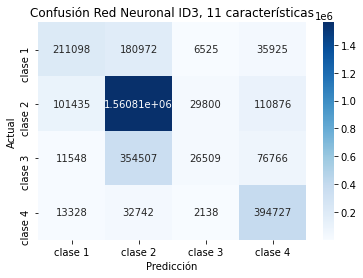

Confusión Red Neuronal ID3, 11 características:
[[ 211098  180972    6525   35925]
 [ 101435 1560808   29800  110876]
 [  11548  354507   26509   76766]
 [  13328   32742    2138  394727]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg']
98429/98429 [==============================] - 49s 495us/step


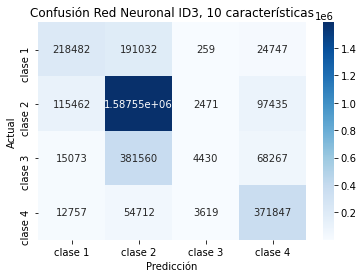

Confusión Red Neuronal ID3, 10 características:
[[ 218482  191032     259   24747]
 [ 115462 1587551    2471   97435]
 [  15073  381560    4430   68267]
 [  12757   54712    3619  371847]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg']
98429/98429 [==============================] - 47s 473us/step


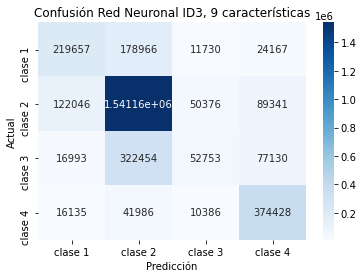

Confusión Red Neuronal ID3, 9 características:
[[ 219657  178966   11730   24167]
 [ 122046 1541156   50376   89341]
 [  16993  322454   52753   77130]
 [  16135   41986   10386  374428]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg']
98429/98429 [==============================] - 45s 460us/step


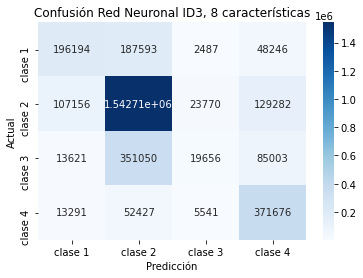

Confusión Red Neuronal ID3, 8 características:
[[ 196194  187593    2487   48246]
 [ 107156 1542711   23770  129282]
 [  13621  351050   19656   85003]
 [  13291   52427    5541  371676]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg']
98429/98429 [==============================] - 47s 472us/step


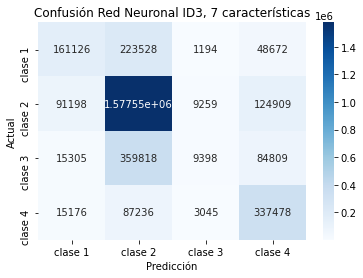

Confusión Red Neuronal ID3, 7 características:
[[ 161126  223528    1194   48672]
 [  91198 1577553    9259  124909]
 [  15305  359818    9398   84809]
 [  15176   87236    3045  337478]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg']
98429/98429 [==============================] - 47s 482us/step


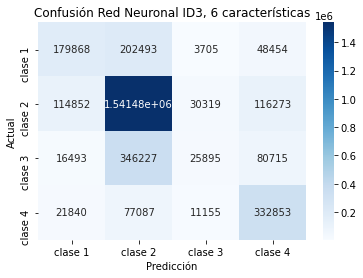

Confusión Red Neuronal ID3, 6 características:
[[ 179868  202493    3705   48454]
 [ 114852 1541475   30319  116273]
 [  16493  346227   25895   80715]
 [  21840   77087   11155  332853]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min']
98429/98429 [==============================] - 49s 499us/step


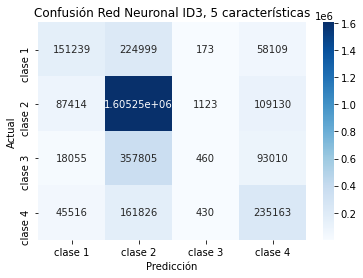

Confusión Red Neuronal ID3, 5 características:
[[ 151239  224999     173   58109]
 [  87414 1605252    1123  109130]
 [  18055  357805     460   93010]
 [  45516  161826     430  235163]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q']
98429/98429 [==============================] - 46s 471us/step


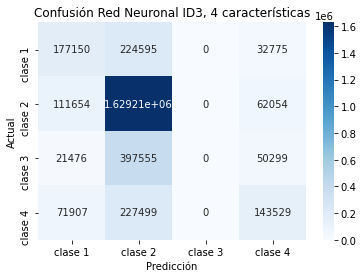

Confusión Red Neuronal ID3, 4 características:
[[ 177150  224595       0   32775]
 [ 111654 1629211       0   62054]
 [  21476  397555       0   50299]
 [  71907  227499       0  143529]]
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg']
98429/98429 [==============================] - 47s 480us/step


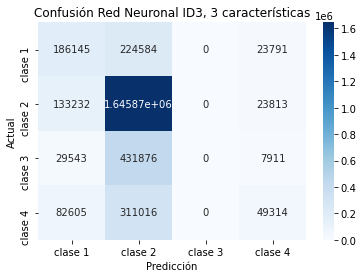

Confusión Red Neuronal ID3, 3 características:
[[ 186145  224584       0   23791]
 [ 133232 1645874       0   23813]
 [  29543  431876       0    7911]
 [  82605  311016       0   49314]]
['IMECA_Total', 'T_air', 'T_amb_Max']
98429/98429 [==============================] - 47s 473us/step


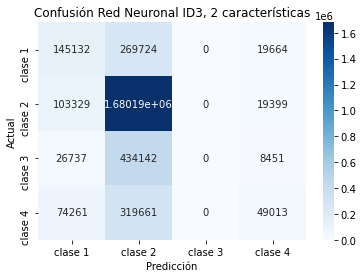

Confusión Red Neuronal ID3, 2 características:
[[ 145132  269724       0   19664]
 [ 103329 1680191       0   19399]
 [  26737  434142       0    8451]
 [  74261  319661       0   49013]]
['IMECA_Total', 'T_air']
98429/98429 [==============================] - 47s 474us/step


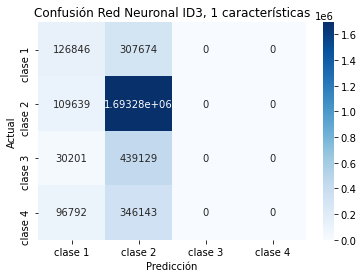

Confusión Red Neuronal ID3, 1 características:
[[ 126846  307674       0       0]
 [ 109639 1693280       0       0]
 [  30201  439129       0       0]
 [  96792  346143       0       0]]


In [25]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['ID3'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal ID3, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal ID3, {i} características:")
    print(conf_matrix)
    i=i-1

# LASSO

In [5]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4


import pandas as pd

# Cargar las características seleccionadas de LASSO
df_lasso = pd.read_csv('Seleccion_caracteristicas_LASSO.csv')
df_lasso = df_lasso.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

# Crear la lista de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_lasso.columns:
    caracteristicas = ['IMECA_Total'] + df_lasso[col].dropna().tolist()
    caracteristicas_seleccionadas.append(caracteristicas)

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Lasso_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Precision': rendimientos[mejor_modelo]
    })

# Guardar los resultados en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv'.")


ruta Modelo_neuronal_Lasso_con_23_caracteristicas.pkl
98429/98429 [==============================] - 47s 480us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.9509160486301602
 
98429/98429 [==============================] - 47s 477us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.9159673541264519
 
98429/98429 [==============================] - 49s 495us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.8980414733538781
 
98429/98429 [==============================] - 47s 479us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.9105805592242654
 
98429/98429 [==============================] - 47s 482us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.954056464266766
 
98429/98429 [===================

98429/98429 [==============================] - 49s 493us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.8749703681127028
 
98429/98429 [==============================] - 48s 482us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.8744736812399111
 
98429/98429 [==============================] - 49s 493us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.8552112612460068
 
98429/98429 [==============================] - 49s 498us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.8914490839513698
 
98429/98429 [==============================] - 46s 468us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.8005463555600709
 
98429/98429 [==============================] - 46s 467us/step
Acabé 7 veces con el mo

98429/98429 [==============================] - 45s 461us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.5494643683610462
 
98429/98429 [==============================] - 46s 470us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.6182351812342669
 
98429/98429 [==============================] - 45s 457us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.661060878006931
 
98429/98429 [==============================] - 46s 465us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.7009199995484665
 
98429/98429 [==============================] - 45s 457us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.7198595730750562
 
98429/98429 [==============================] - 46s 469us/step
Acabé 8 veces con el mod

98429/98429 [==============================] - 46s 468us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.18523711154006794
 
98429/98429 [==============================] - 45s 458us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.22838791244765033
 
98429/98429 [==============================] - 46s 466us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.27570185241626877
 
98429/98429 [==============================] - 46s 464us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.2282840597378848
 
98429/98429 [==============================] - 46s 467us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.15866887918091818
 
98429/98429 [==============================] - 45s 459us/step
Acabé 9 veces con e

98429/98429 [==============================] - 53s 533us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.002585029406120537
 
98429/98429 [==============================] - 53s 538us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
98429/98429 [==============================] - 54s 547us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
98429/98429 [==============================] - 47s 480us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
98429/98429 [==============================] - 45s 457us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
98429/98429 [==============================] - 45s 459us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo model

# Mejores modelos de predicción  para Lasso, Clase 4


In [26]:
Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


# Cargar las características seleccionadas de LASSO
df_lasso = pd.read_csv('Seleccion_caracteristicas_LASSO.csv')
df_lasso = df_lasso.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

# Crear la lista de características seleccionadas
caracteristicas_seleccionadas = df_lasso.dropna().values.flatten().tolist()
caracteristicas_seleccionadas = ['IMECA_Total'] + caracteristicas_seleccionadas

# Supongamos que 'mejores_modelos' es un DataFrame con las rutas y nombres de los mejores modelos
# Esto debería estar definido anteriormente en tu código
print('esto es lo que tiene características seleccionadas originalmente',caracteristicas_seleccionadas)
i = 22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    
    caracteristicas_seleccionadas.pop()
    print('esto es lo que tiene características seleccionadas después del pop',caracteristicas_seleccionadas)

    
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal ID3, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal ID3, {i} características:")
    print(conf_matrix)
    
    i -= 1

esto es lo que tiene características seleccionadas originalmente ['IMECA_Total', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot']
esto es lo que tiene características seleccionadas después del pop ['IMECA_Total', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'BattV_Min', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot', 'Irradiation_Tot']


ValueError: in user code:

    File "C:\Users\Juan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Juan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Juan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Juan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\Juan\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Juan\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 22), found shape=(None, 21)


# Extra de teoría de gráficas

In [5]:
# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
#df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)
columnas_seleccionadas = [
    'Heat_Inedx_Avg', 'T_Wet_Bulb_Avg', 'Irradiance_Avg', 'RH_Avg', 'Wind_Direction_SMM',
    'Wind_Speed_Max', 'Wind_Chill_Avg', 'Sun_Hrs_Tot', 'Irradiation_Tot', 'Wind_Direction_Std', 
    'T_amb_Avg', 'Pot_Irradiance_Avg'
]

df_red_neuronal1 = df_red_neuronal1[columnas_seleccionadas + ['IMECA_Total']]

# Asegúrate de que la columna 'IMECA_Total' esté en el formato adecuado
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

In [6]:


# Ahora puedes llamar a tu función de entrenamiento como de costumbre
Tiempo, accuracy = experimentosMLP(df_red_neuronal1, nombre_archivo='Extra_Teoria_Graficas')
print(Tiempo, accuracy)

Epoch 1/50
28348/28348 [==============================] - 21s 718us/step - loss: 0.9803 - categorical_accuracy: 0.5994 - val_loss: 0.9525 - val_categorical_accuracy: 0.6064
Epoch 2/50
28348/28348 [==============================] - 20s 694us/step - loss: 0.9383 - categorical_accuracy: 0.6104 - val_loss: 0.9229 - val_categorical_accuracy: 0.6172
Epoch 3/50
28348/28348 [==============================] - 20s 692us/step - loss: 0.9164 - categorical_accuracy: 0.6181 - val_loss: 0.9104 - val_categorical_accuracy: 0.6216
Epoch 4/50
28348/28348 [==============================] - 20s 690us/step - loss: 0.9075 - categorical_accuracy: 0.6206 - val_loss: 0.9051 - val_categorical_accuracy: 0.6204
Epoch 5/50
28348/28348 [==============================] - 19s 676us/step - loss: 0.9019 - categorical_accuracy: 0.6216 - val_loss: 0.8982 - val_categorical_accuracy: 0.6229
Epoch 6/50
28348/28348 [==============================] - 19s 676us/step - loss: 0.8967 - categorical_accuracy: 0.6236 - val_loss: 0.89

28348/28348 [==============================] - 18s 649us/step - loss: 0.8685 - categorical_accuracy: 0.6417 - val_loss: 0.8682 - val_categorical_accuracy: 0.6430
Epoch 28/50
28348/28348 [==============================] - 19s 654us/step - loss: 0.8683 - categorical_accuracy: 0.6419 - val_loss: 0.8673 - val_categorical_accuracy: 0.6418
Epoch 29/50
28348/28348 [==============================] - 18s 650us/step - loss: 0.8681 - categorical_accuracy: 0.6418 - val_loss: 0.8678 - val_categorical_accuracy: 0.6424
Epoch 30/50
28348/28348 [==============================] - 18s 649us/step - loss: 0.8679 - categorical_accuracy: 0.6418 - val_loss: 0.8664 - val_categorical_accuracy: 0.6429
Epoch 31/50
9843/9843 [==============================] - 5s 546us/step - loss: 0.8670 - categorical_accuracy: 0.6411
####	Resultado del Modelo K-Fold	#### 3
9843/9843 [==============================] - 5s 556us/step - loss: 0.8670 - categorical_accuracy: 0.6411
[0.8670331835746765, 0.6411447525024414]
Epoch 1/50
28

Epoch 4/50
28348/28348 [==============================] - 18s 651us/step - loss: 0.9152 - categorical_accuracy: 0.6146 - val_loss: 0.9123 - val_categorical_accuracy: 0.6161
Epoch 5/50
28348/28348 [==============================] - 19s 653us/step - loss: 0.9046 - categorical_accuracy: 0.6202 - val_loss: 0.9053 - val_categorical_accuracy: 0.6175
Epoch 6/50
28348/28348 [==============================] - 18s 646us/step - loss: 0.8947 - categorical_accuracy: 0.6249 - val_loss: 0.8937 - val_categorical_accuracy: 0.6263
Epoch 7/50
28348/28348 [==============================] - 18s 650us/step - loss: 0.8865 - categorical_accuracy: 0.6286 - val_loss: 0.8851 - val_categorical_accuracy: 0.6291
Epoch 8/50
28348/28348 [==============================] - 18s 652us/step - loss: 0.8818 - categorical_accuracy: 0.6305 - val_loss: 0.8845 - val_categorical_accuracy: 0.6327
Epoch 9/50
28348/28348 [==============================] - 19s 654us/step - loss: 0.8790 - categorical_accuracy: 0.6326 - val_loss: 0.88

28348/28348 [==============================] - 20s 690us/step - loss: 0.8553 - categorical_accuracy: 0.6485 - val_loss: 0.8556 - val_categorical_accuracy: 0.6484
Epoch 47/50
28348/28348 [==============================] - 19s 662us/step - loss: 0.8552 - categorical_accuracy: 0.6486 - val_loss: 0.8513 - val_categorical_accuracy: 0.6502
Epoch 48/50
28348/28348 [==============================] - 19s 662us/step - loss: 0.8551 - categorical_accuracy: 0.6487 - val_loss: 0.8515 - val_categorical_accuracy: 0.6509
Epoch 49/50
28348/28348 [==============================] - 19s 687us/step - loss: 0.8549 - categorical_accuracy: 0.6488 - val_loss: 0.8514 - val_categorical_accuracy: 0.6486
Epoch 50/50
9843/9843 [==============================] - 6s 578us/step - loss: 0.8510 - categorical_accuracy: 0.6499
####	Resultado del Modelo K-Fold	#### 6
9843/9843 [==============================] - 6s 586us/step - loss: 0.8510 - categorical_accuracy: 0.6499
[0.8510018587112427, 0.6498587131500244]
Epoch 1/50
28

28348/28348 [==============================] - 20s 713us/step - loss: 0.8529 - categorical_accuracy: 0.6375 - val_loss: 0.8500 - val_categorical_accuracy: 0.6389
Epoch 37/50
28348/28348 [==============================] - 19s 666us/step - loss: 0.8525 - categorical_accuracy: 0.6377 - val_loss: 0.8490 - val_categorical_accuracy: 0.6396
Epoch 38/50
28348/28348 [==============================] - 19s 665us/step - loss: 0.8520 - categorical_accuracy: 0.6382 - val_loss: 0.8502 - val_categorical_accuracy: 0.6390
Epoch 39/50
28348/28348 [==============================] - 19s 667us/step - loss: 0.8516 - categorical_accuracy: 0.6385 - val_loss: 0.8487 - val_categorical_accuracy: 0.6390
Epoch 40/50
28348/28348 [==============================] - 22s 769us/step - loss: 0.8511 - categorical_accuracy: 0.6387 - val_loss: 0.8490 - val_categorical_accuracy: 0.6408
Epoch 41/50
28348/28348 [==============================] - 20s 717us/step - loss: 0.8506 - categorical_accuracy: 0.6391 - val_loss: 0.8502 - v

28348/28348 [==============================] - 19s 666us/step - loss: 0.8676 - categorical_accuracy: 0.6358 - val_loss: 0.8673 - val_categorical_accuracy: 0.6354
Epoch 38/50
28348/28348 [==============================] - 19s 663us/step - loss: 0.8673 - categorical_accuracy: 0.6362 - val_loss: 0.8677 - val_categorical_accuracy: 0.6372
Epoch 39/50
28348/28348 [==============================] - 19s 656us/step - loss: 0.8671 - categorical_accuracy: 0.6364 - val_loss: 0.8686 - val_categorical_accuracy: 0.6379
Epoch 40/50
28348/28348 [==============================] - 19s 655us/step - loss: 0.8668 - categorical_accuracy: 0.6364 - val_loss: 0.8662 - val_categorical_accuracy: 0.6384
Epoch 41/50
28348/28348 [==============================] - 19s 653us/step - loss: 0.8666 - categorical_accuracy: 0.6367 - val_loss: 0.8669 - val_categorical_accuracy: 0.6379
Epoch 42/50
28348/28348 [==============================] - 19s 659us/step - loss: 0.8664 - categorical_accuracy: 0.6366 - val_loss: 0.8655 - v

In [7]:
df_rendimiento_Smote = pd.DataFrame({'Num_Características': 12,'Tiempo_Total': Tiempo, 'Accuracy_Promedio': accuracy}, index=[12])
    #'Num_Características': num_características,'Tiempo_Total': tiempo_total_lista, 'Accuracy_Promedio': acc_promedio_lista})

guardar_rendimiento = 'AaccuracyTime_Extra_Teoria_Graficas.csv'
df_rendimiento_Smote.to_csv(guardar_rendimiento, index=True)

In [9]:
# Separar características y etiquetas
X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']
#Segundo_Modelo_neuronal_
# Cargar los modelos entrenados
ruta_modelos = 'Modelo_neuronal_Extra_Teoria_Graficas.pkl'
modelos_kfold = cargar_modelos(ruta_modelos)

# Evaluar cada uno de los modelos k-fold
mejor_recall = -1
mejor_modelo = None
mejor_kfold = None

for nombre_modelo, modelo in modelos_kfold.items():
    recall_clase_4, _ = evaluar_modelo(modelo, X_test, y_test)
    
    if recall_clase_4 > mejor_recall:
        mejor_recall = recall_clase_4
        mejor_modelo = modelo
        mejor_kfold = nombre_modelo

# Guardar la información del mejor modelo en un archivo CSV
if mejor_modelo:
    mejores_modelos_info = {
        'Mejor_KFold': [mejor_kfold],
        'Mejor_Recall_Clase_4': [mejor_recall]
    }

    df_mejor_modelo = pd.DataFrame(mejores_modelos_info)
    df_mejor_modelo.to_csv('Aa_Mejores_Modelos_extra_graficas_CLASE4.csv', index=False)

    print(f"El mejor modelo es {mejor_kfold} con un recall de la clase 4 de {mejor_recall:.4f}.")
else:
    print("No se encontró un modelo válido.")

98429/98429 [==============================] - 46s 464us/step
El mejor modelo es modelo_prueba_kfold_2 con un recall de la clase 4 de 0.6716.


# Modelo de gráficas

In [3]:
import pandas as pd


# Datos de importancia_varianza_graficas
#importancia_varianza_graficas = {
#    'Iteración 1': [('Wind_Direction_Avg', 37/4), ('Wind_Speed_Max', 8), ('Sun_Hrs_Tot', 29/4), 
#('T_amb_Min', 29/4), ('P_atm_q', 29/4), ('Irradiance_Avg', 29/4), ('Precipitation_Tot', 29/4), 
#('Dew_Point_Avg', 29/4), ('Pot_Irradiance_Avg', 29/4), ('Irradiation_Tot', 29/4), ('Wind_Speed_Avg', 29/4), 
#('Wind_Direction_Std', 29/4), ('Wind_Direction_SMM', 29/4), ('T_amb_Avg', 5/2)],

#    'Iteración 2': [('Irradiation_Tot', 23/2), ('Wind_Speed_Max', 45/4), ('Sun_Hrs_Tot', 10), ('Precipitation_Tot', 10), ('Dew_Point_Avg', 10), ('Pot_Irradiance_Avg', 10), ('Wind_Direction_Std', 10), ('Wind_Direction_SMM', 10), ('BattV_Min', 7/2)],
#    'Iteración 3': [('Wind_Speed_Max', 27/2), ('Sun_Hrs_Tot', 51/4), ('Precipitation_Tot', 51/4), ('Pot_Irradiance_Avg', 51/4), ('Irradiation_Tot', 23/2), ('Wind_Direction_Avg', 4)],
#    'Iteración 4': [('Wind_Speed_Avg', 29/2), ('Sun_Hrs_Tot', 49/4), ('Precipitation_Tot', 49/4), ('Pot_Irradiance_Avg', 49/4), ('Irradiation_Tot', 43/4), ('Wind_Direction_Avg', 13/4)],
#    'Iteración 5': [('Sun_Hrs_Tot', 25/2), ('Precipitation_Tot', 25/2), ('Wind_Direction_Std', 25/2), ('Wind_Speed_Max', 15/2), ('Wind_Direction_SMM', 6)],
#    'Iteración 6': [('Precipitation_Tot', 27/2), ('Wind_Direction_Std', 25/2), ('Wind_Direction_SMM', 7)],
#    'Iteración 7': [('Irradiance_Avg', 81/5), ('Wind_Direction_SMM', 37/5)],
#    'Iteración 8': [('Irradiation_Tot', 11), ('Wind_Direction_SMM', 42/5)],
#    'Iteración 9': [('Wind_Direction_Std', 26/5)],
#    'Iteración 10': [('Wind_Direction_Std', 6)]
#}


# Datos de importancia_varianza_graficas
importancia_varianza_graficas = {
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 
                    'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'], 
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 5': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 6': ['Precipitation_Tot', 'Wind_Direction_Std'],
    'Iteración 7': ['Wind_Direction_Std'],
    'Iteración 8': ['Wind_Direction_Std'],
    'Iteración 9': ['Wind_Direction_Std'],
    'Iteración 10': ['Wind_Direction_Std']
}


# Datos de importancia_ponderada_promedio_graficas
#importancia_ponderada_promedio_graficas = {
#    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 2': ['Irradiance_Avg', 'Wind_Speed_Std', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM', 'T_amb_Max'],
#    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Speed_Std', 'Irradiation_Tot', 'Wind_Direction_Avg'],
#    'Iteración 4': ['Wind_Speed_Avg', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg'],
#    'Iteración 5': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Speed_Std', 'Wind_Direction_SMM'],
#    'Iteración 6': ['Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 7': ['Irradiance_Avg', 'Wind_Speed_Avg'],
#    'Iteración 8': ['Irradiation_Tot', 'Wind_Direction_SMM'],
#    'Iteración 9': ['Wind_Direction_Std'],
#    'Iteración 10': ['Precipitation_Tot']
#}

# Datos de importancia_ponderada_promedio_graficas
importancia_ponderada_promedio_graficas = {
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot'],
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg'],
    'Iteración 5': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Avg', 'Wind_Direction_Std'],
    'Iteración 6': ['Precipitation_Tot', 'Wind_Speed_Avg'],
    'Iteración 7': ['Wind_Speed_Avg'],
    'Iteración 8':  ['Wind_Speed_Max'],
    'Iteración 9': ['Wind_Direction_Std'],
    'Iteración 10': ['Precipitation_Tot']
}


#Importancia_CART_graficas={
#    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM'],
#    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max'],
#    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'],
#    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot'], 
#    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'], 
#    'Iteración 7': ['T_air', 'Irradiance_Avg'], 
#    'Iteración 8': ['T_air', 'Irradiation_Tot'], 
#    'Iteración 9': ['Sun_Hrs_Tot'], 
#    'Iteración 10': ['T_air']
#}

Importancia_CART_graficas={
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max'],
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'],
    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot'], 
    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'], 
    'Iteración 7': ['T_air', 'Irradiance_Avg'], 
    'Iteración 8': ['T_air', 'Irradiation_Tot'], 
    'Iteración 9': ['Sun_Hrs_Tot'], 
    'Iteración 10': ['T_air']
}


#Importancia_ID3_graficas={
#    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Avg'], 
#    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'], 
#    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std'], 
#    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'],
#    'Iteración 7': ['T_air', 'Irradiance_Avg'],
#    'Iteración 8': ['T_air', 'Irradiation_Tot'],
#    'Iteración 9': ['Sun_Hrs_Tot'],
#    'Iteración 10':['T_air']
#}


Importancia_ID3_graficas={
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Avg'], 
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'], 
    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std'], 
    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'],
    'Iteración 7': ['T_air', 'Irradiance_Avg'],
    'Iteración 8': ['T_air', 'Irradiation_Tot'],
    'Iteración 9': ['Sun_Hrs_Tot'],
    'Iteración 10':['T_air']
}


# Asegurarse de que todas las listas tengan la misma longitud
max_len_varianza = max(len(v) for v in importancia_varianza_graficas.values())
max_len_centralidad = max(len(v) for v in importancia_ponderada_promedio_graficas.values())
max_len_CART = max(len(v) for v in Importancia_CART_graficas.values())
max_len_ID3 = max(len(v) for v in Importancia_ID3_graficas.values())


# Crear DataFrames y rellenar con None
df_varianza =    pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_varianza - len(imp)) for i, imp in enumerate(importancia_varianza_graficas.values())})
df_centralidad = pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_centralidad - len(imp)) for i, imp in enumerate(importancia_ponderada_promedio_graficas.values())})
df_CART =        pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_CART - len(imp)) for i, imp in enumerate(Importancia_CART_graficas.values())})
df_ID3 =         pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_ID3 - len(imp)) for i, imp in enumerate(Importancia_ID3_graficas.values())})


# Guardar DataFrames en archivos CSV
df_varianza.to_csv('Seleccion_caracteristicas_Graficas_varianza.csv', index=False)
df_centralidad.to_csv('Seleccion_caracteristicas_Graficas_centralidad.csv', index=False)
df_CART.to_csv('Seleccion_caracteristicas_Graficas_CART.csv', index=False)
df_ID3.to_csv('Seleccion_caracteristicas_Graficas_ID3.csv', index=False)


# Mostrar el contenido de los DataFrames
print("Contenido de 'Seleccion_caracteristicas_Graficas_varianza.csv':")
print(df_varianza)

print("\nContenido de 'Seleccion_caracteristicas_Graficas_centralidad.csv':")
print(df_centralidad)

print("\nContenido de 'Seleccion_caracteristicas_Graficas_CART.csv':")
print(df_CART)

print("\nContenido de 'Seleccion_caracteristicas_Graficas_ID3.csv':")
print(df_ID3)

Contenido de 'Seleccion_caracteristicas_Graficas_varianza.csv':
           Iteración 1         Iteración 2         Iteración 3  \
0          Sun_Hrs_Tot         Sun_Hrs_Tot         Sun_Hrs_Tot   
1            T_amb_Min              RH_Avg   Precipitation_Tot   
2              P_atm_q   Precipitation_Tot  Pot_Irradiance_Avg   
3       Irradiance_Avg       Dew_Point_Avg  Wind_Direction_Std   
4               RH_Avg  Pot_Irradiance_Avg  Wind_Direction_SMM   
5    Precipitation_Tot     Irradiation_Tot         IMECA_Total   
6        Dew_Point_Avg  Wind_Direction_Std                None   
7   Pot_Irradiance_Avg  Wind_Direction_SMM                None   
8      Irradiation_Tot         IMECA_Total                None   
9       Wind_Speed_Avg                None                None   
10  Wind_Direction_Std                None                None   
11      Wind_Speed_Max                None                None   
12  Wind_Direction_SMM                None                None   
13         I

## De aquí copilar Varianza

In [5]:
import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_varianza.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
#df_red_neuronal1=df_normalizado1
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_varianza.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)



# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_varianza_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_varianza_MayorIgual_TODO.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)


 
 
 
 
Tiene 14
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Epoch 1/50
28348/28348 [==============================] - 20s 673us/step - loss: 0.9415 - categorical_accuracy: 0.6083 - val_loss: 0.8978 - val_categorical_accuracy: 0.6186
Epoch 2/50
28348/28348 [==============================] - 19s 670us/step - loss: 0.8748 - categorical_accuracy: 0.6353 - val_loss: 0.8556 - val_categorical_accuracy: 0.6483
Epoch 3/50
28348/28348 [==============================] - 19s 666us/step - loss: 0.8390 - categorical_accuracy: 0.6542 - val_loss: 0.8267 - val_categorical_accuracy: 0.6580
Epoch 4/50
28348/28348 [==============================] - 19s 670us/step - loss: 0.8205 - categorical_accuracy: 0.6639 - val_loss: 0.8123 - val_categorical_accuracy: 0.6661
Epoch 5/50
28

Epoch 25/50
28348/28348 [==============================] - 19s 669us/step - loss: 0.7844 - categorical_accuracy: 0.6798 - val_loss: 0.7889 - val_categorical_accuracy: 0.6786
Epoch 26/50
28348/28348 [==============================] - 19s 663us/step - loss: 0.7831 - categorical_accuracy: 0.6801 - val_loss: 0.7824 - val_categorical_accuracy: 0.6808
Epoch 27/50
28348/28348 [==============================] - 18s 650us/step - loss: 0.7817 - categorical_accuracy: 0.6802 - val_loss: 0.7823 - val_categorical_accuracy: 0.6804
Epoch 28/50
28348/28348 [==============================] - 19s 655us/step - loss: 0.7805 - categorical_accuracy: 0.6803 - val_loss: 0.7832 - val_categorical_accuracy: 0.6803
Epoch 29/50
28348/28348 [==============================] - 19s 660us/step - loss: 0.7795 - categorical_accuracy: 0.6805 - val_loss: 0.7829 - val_categorical_accuracy: 0.6800
Epoch 30/50
28348/28348 [==============================] - 18s 651us/step - loss: 0.7785 - categorical_accuracy: 0.6807 - val_loss

28348/28348 [==============================] - 19s 663us/step - loss: 0.7752 - categorical_accuracy: 0.6836 - val_loss: 0.7755 - val_categorical_accuracy: 0.6843
Epoch 16/50
28348/28348 [==============================] - 18s 650us/step - loss: 0.7744 - categorical_accuracy: 0.6837 - val_loss: 0.7736 - val_categorical_accuracy: 0.6847
Epoch 17/50
9843/9843 [==============================] - 5s 540us/step - loss: 0.7726 - categorical_accuracy: 0.6847
####	Resultado del Modelo K-Fold	#### 4
9843/9843 [==============================] - 5s 532us/step - loss: 0.7726 - categorical_accuracy: 0.6847
[0.772609293460846, 0.6846725344657898]
Epoch 1/50
28348/28348 [==============================] - 19s 660us/step - loss: 0.9438 - categorical_accuracy: 0.6102 - val_loss: 0.8983 - val_categorical_accuracy: 0.6257
Epoch 2/50
28348/28348 [==============================] - 19s 654us/step - loss: 0.8596 - categorical_accuracy: 0.6447 - val_loss: 0.8512 - val_categorical_accuracy: 0.6461
Epoch 3/50
28348

Epoch 6/50
28348/28348 [==============================] - 19s 687us/step - loss: 0.8041 - categorical_accuracy: 0.6696 - val_loss: 0.8007 - val_categorical_accuracy: 0.6715
Epoch 7/50
28348/28348 [==============================] - 19s 676us/step - loss: 0.8003 - categorical_accuracy: 0.6711 - val_loss: 0.7988 - val_categorical_accuracy: 0.6737
Epoch 8/50
28348/28348 [==============================] - 19s 685us/step - loss: 0.7973 - categorical_accuracy: 0.6723 - val_loss: 0.7943 - val_categorical_accuracy: 0.6721
Epoch 9/50
28348/28348 [==============================] - 19s 683us/step - loss: 0.7948 - categorical_accuracy: 0.6733 - val_loss: 0.7933 - val_categorical_accuracy: 0.6734
Epoch 10/50
28348/28348 [==============================] - 19s 673us/step - loss: 0.7930 - categorical_accuracy: 0.6740 - val_loss: 0.7924 - val_categorical_accuracy: 0.6755
Epoch 11/50
28348/28348 [==============================] - 19s 663us/step - loss: 0.7917 - categorical_accuracy: 0.6746 - val_loss: 0.

9843/9843 [==============================] - 6s 559us/step - loss: 0.7619 - categorical_accuracy: 0.6947
####	Resultado del Modelo K-Fold	#### 8
9843/9843 [==============================] - 5s 550us/step - loss: 0.7619 - categorical_accuracy: 0.6947
[0.7619336843490601, 0.6946756839752197]
Epoch 1/50
28348/28348 [==============================] - 19s 663us/step - loss: 0.9417 - categorical_accuracy: 0.6114 - val_loss: 0.8974 - val_categorical_accuracy: 0.6256
Epoch 2/50
28348/28348 [==============================] - 19s 656us/step - loss: 0.8746 - categorical_accuracy: 0.6367 - val_loss: 0.8544 - val_categorical_accuracy: 0.6467
Epoch 3/50
28348/28348 [==============================] - 19s 659us/step - loss: 0.8436 - categorical_accuracy: 0.6524 - val_loss: 0.8306 - val_categorical_accuracy: 0.6576
Epoch 4/50
28348/28348 [==============================] - 19s 665us/step - loss: 0.8265 - categorical_accuracy: 0.6626 - val_loss: 0.8208 - val_categorical_accuracy: 0.6677
Epoch 5/50
28348/

Epoch 9/50
28348/28348 [==============================] - 19s 660us/step - loss: 0.8021 - categorical_accuracy: 0.6727 - val_loss: 0.8002 - val_categorical_accuracy: 0.6755
Epoch 10/50
28348/28348 [==============================] - 18s 652us/step - loss: 0.7990 - categorical_accuracy: 0.6744 - val_loss: 0.7987 - val_categorical_accuracy: 0.6761
Epoch 11/50
28348/28348 [==============================] - 18s 644us/step - loss: 0.7967 - categorical_accuracy: 0.6755 - val_loss: 0.7951 - val_categorical_accuracy: 0.6770
Epoch 12/50
28348/28348 [==============================] - 19s 665us/step - loss: 0.7950 - categorical_accuracy: 0.6763 - val_loss: 0.7941 - val_categorical_accuracy: 0.6769
Epoch 13/50
28348/28348 [==============================] - 19s 669us/step - loss: 0.7935 - categorical_accuracy: 0.6770 - val_loss: 0.7931 - val_categorical_accuracy: 0.6785
Epoch 14/50
28348/28348 [==============================] - 19s 683us/step - loss: 0.7923 - categorical_accuracy: 0.6778 - val_loss:

Epoch 3/50
28348/28348 [==============================] - 19s 672us/step - loss: 0.9762 - categorical_accuracy: 0.5937 - val_loss: 0.9734 - val_categorical_accuracy: 0.5936
Epoch 4/50
28348/28348 [==============================] - 19s 668us/step - loss: 0.9710 - categorical_accuracy: 0.5946 - val_loss: 0.9709 - val_categorical_accuracy: 0.5956
Epoch 5/50
28348/28348 [==============================] - 19s 668us/step - loss: 0.9681 - categorical_accuracy: 0.5971 - val_loss: 0.9702 - val_categorical_accuracy: 0.5971
Epoch 6/50
28348/28348 [==============================] - 19s 665us/step - loss: 0.9663 - categorical_accuracy: 0.5991 - val_loss: 0.9662 - val_categorical_accuracy: 0.6007
Epoch 7/50
28348/28348 [==============================] - 19s 657us/step - loss: 0.9647 - categorical_accuracy: 0.6006 - val_loss: 0.9639 - val_categorical_accuracy: 0.6013
Epoch 8/50
28348/28348 [==============================] - 19s 666us/step - loss: 0.9632 - categorical_accuracy: 0.6015 - val_loss: 0.96

Epoch 22/50
28348/28348 [==============================] - 19s 683us/step - loss: 0.9409 - categorical_accuracy: 0.6108 - val_loss: 0.9444 - val_categorical_accuracy: 0.6089
Epoch 23/50
28348/28348 [==============================] - 19s 678us/step - loss: 0.9404 - categorical_accuracy: 0.6108 - val_loss: 0.9396 - val_categorical_accuracy: 0.6117
Epoch 24/50
28348/28348 [==============================] - 19s 679us/step - loss: 0.9398 - categorical_accuracy: 0.6108 - val_loss: 0.9405 - val_categorical_accuracy: 0.6096
Epoch 25/50
9843/9843 [==============================] - 5s 556us/step - loss: 0.9388 - categorical_accuracy: 0.6114
####	Resultado del Modelo K-Fold	#### 3
9843/9843 [==============================] - 5s 545us/step - loss: 0.9388 - categorical_accuracy: 0.6114
[0.9387669563293457, 0.6114467978477478]
Epoch 1/50
28348/28348 [==============================] - 20s 684us/step - loss: 1.0079 - categorical_accuracy: 0.5832 - val_loss: 0.9782 - val_categorical_accuracy: 0.5901
Ep

28348/28348 [==============================] - 20s 699us/step - loss: 0.9177 - categorical_accuracy: 0.6214 - val_loss: 0.9167 - val_categorical_accuracy: 0.6215
Epoch 46/50
28348/28348 [==============================] - 20s 693us/step - loss: 0.9176 - categorical_accuracy: 0.6215 - val_loss: 0.9167 - val_categorical_accuracy: 0.6226
Epoch 47/50
28348/28348 [==============================] - 19s 682us/step - loss: 0.9174 - categorical_accuracy: 0.6216 - val_loss: 0.9174 - val_categorical_accuracy: 0.6252
Epoch 48/50
28348/28348 [==============================] - 19s 665us/step - loss: 0.9173 - categorical_accuracy: 0.6216 - val_loss: 0.9169 - val_categorical_accuracy: 0.6221
Epoch 49/50
28348/28348 [==============================] - 19s 659us/step - loss: 0.9172 - categorical_accuracy: 0.6218 - val_loss: 0.9164 - val_categorical_accuracy: 0.6228
Epoch 50/50
9843/9843 [==============================] - 5s 545us/step - loss: 0.9194 - categorical_accuracy: 0.6236
####	Resultado del Modelo

28348/28348 [==============================] - 18s 641us/step - loss: 1.0303 - categorical_accuracy: 0.5848 - val_loss: 1.0307 - val_categorical_accuracy: 0.5851
Epoch 13/50
9843/9843 [==============================] - 5s 545us/step - loss: 1.0303 - categorical_accuracy: 0.5831
####	Resultado del Modelo K-Fold	#### 2
9843/9843 [==============================] - 5s 553us/step - loss: 1.0303 - categorical_accuracy: 0.5831
[1.0302926301956177, 0.5830885767936707]
Epoch 1/50
28348/28348 [==============================] - 20s 677us/step - loss: 1.0935 - categorical_accuracy: 0.5728 - val_loss: 1.0723 - val_categorical_accuracy: 0.5758
Epoch 2/50
28348/28348 [==============================] - 19s 656us/step - loss: 1.0666 - categorical_accuracy: 0.5751 - val_loss: 1.0628 - val_categorical_accuracy: 0.5744
Epoch 3/50
28348/28348 [==============================] - 19s 655us/step - loss: 1.0571 - categorical_accuracy: 0.5735 - val_loss: 1.0522 - val_categorical_accuracy: 0.5726
Epoch 4/50
28348

Epoch 1/50
28348/28348 [==============================] - 19s 645us/step - loss: 1.1154 - categorical_accuracy: 0.5710 - val_loss: 1.1092 - val_categorical_accuracy: 0.5722
Epoch 2/50
28348/28348 [==============================] - 18s 637us/step - loss: 1.0969 - categorical_accuracy: 0.5726 - val_loss: 1.0828 - val_categorical_accuracy: 0.5730
Epoch 3/50
28348/28348 [==============================] - 18s 640us/step - loss: 1.0766 - categorical_accuracy: 0.5730 - val_loss: 1.0746 - val_categorical_accuracy: 0.5729
Epoch 4/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0711 - categorical_accuracy: 0.5728 - val_loss: 1.0703 - val_categorical_accuracy: 0.5718
Epoch 5/50
28348/28348 [==============================] - 18s 645us/step - loss: 1.0685 - categorical_accuracy: 0.5724 - val_loss: 1.0681 - val_categorical_accuracy: 0.5713
Epoch 6/50
9843/9843 [==============================] - 5s 536us/step - loss: 1.0684 - categorical_accuracy: 0.5721
####	Resultado del 

Epoch 33/50
28348/28348 [==============================] - 19s 658us/step - loss: 1.0475 - categorical_accuracy: 0.5858 - val_loss: 1.0472 - val_categorical_accuracy: 0.5840
Epoch 34/50
28348/28348 [==============================] - 20s 693us/step - loss: 1.0475 - categorical_accuracy: 0.5859 - val_loss: 1.0466 - val_categorical_accuracy: 0.5881
Epoch 35/50
28348/28348 [==============================] - 20s 717us/step - loss: 1.0474 - categorical_accuracy: 0.5860 - val_loss: 1.0475 - val_categorical_accuracy: 0.5883
Epoch 36/50
28348/28348 [==============================] - 25s 884us/step - loss: 1.0474 - categorical_accuracy: 0.5860 - val_loss: 1.0465 - val_categorical_accuracy: 0.5871
Epoch 37/50
28348/28348 [==============================] - 19s 685us/step - loss: 1.0473 - categorical_accuracy: 0.5861 - val_loss: 1.0463 - val_categorical_accuracy: 0.5875
Epoch 38/50
28348/28348 [==============================] - 19s 684us/step - loss: 1.0473 - categorical_accuracy: 0.5862 - val_loss

Epoch 18/50
28348/28348 [==============================] - 18s 652us/step - loss: 1.0388 - categorical_accuracy: 0.5843 - val_loss: 1.0371 - val_categorical_accuracy: 0.5867
Epoch 19/50
28348/28348 [==============================] - 19s 688us/step - loss: 1.0383 - categorical_accuracy: 0.5843 - val_loss: 1.0363 - val_categorical_accuracy: 0.5862
Epoch 20/50
28348/28348 [==============================] - 22s 760us/step - loss: 1.0379 - categorical_accuracy: 0.5845 - val_loss: 1.0368 - val_categorical_accuracy: 0.5852
Epoch 21/50
28348/28348 [==============================] - 20s 715us/step - loss: 1.0375 - categorical_accuracy: 0.5846 - val_loss: 1.0355 - val_categorical_accuracy: 0.5863
Epoch 22/50
28348/28348 [==============================] - 20s 688us/step - loss: 1.0371 - categorical_accuracy: 0.5846 - val_loss: 1.0349 - val_categorical_accuracy: 0.5864
Epoch 23/50
28348/28348 [==============================] - 22s 770us/step - loss: 1.0368 - categorical_accuracy: 0.5847 - val_loss

28348/28348 [==============================] - 21s 747us/step - loss: 1.0421 - categorical_accuracy: 0.5827 - val_loss: 1.0427 - val_categorical_accuracy: 0.5839
Epoch 15/50
28348/28348 [==============================] - 21s 730us/step - loss: 1.0417 - categorical_accuracy: 0.5829 - val_loss: 1.0422 - val_categorical_accuracy: 0.5808
Epoch 16/50
28348/28348 [==============================] - 22s 773us/step - loss: 1.0413 - categorical_accuracy: 0.5827 - val_loss: 1.0410 - val_categorical_accuracy: 0.5843
Epoch 17/50
28348/28348 [==============================] - 22s 771us/step - loss: 1.0410 - categorical_accuracy: 0.5827 - val_loss: 1.0443 - val_categorical_accuracy: 0.5801
Epoch 18/50
9843/9843 [==============================] - 7s 693us/step - loss: 1.0405 - categorical_accuracy: 0.5803
####	Resultado del Modelo K-Fold	#### 10
9843/9843 [==============================] - 6s 644us/step - loss: 1.0405 - categorical_accuracy: 0.5803
[1.0404753684997559, 0.5803378224372864]
Tiempo total

Epoch 2/50
28348/28348 [==============================] - 18s 646us/step - loss: 1.1226 - categorical_accuracy: 0.5724 - val_loss: 1.1217 - val_categorical_accuracy: 0.5724
Epoch 3/50
28348/28348 [==============================] - 18s 648us/step - loss: 1.1208 - categorical_accuracy: 0.5724 - val_loss: 1.1199 - val_categorical_accuracy: 0.5724
Epoch 4/50
28348/28348 [==============================] - 19s 669us/step - loss: 1.1193 - categorical_accuracy: 0.5724 - val_loss: 1.1191 - val_categorical_accuracy: 0.5724
Epoch 5/50
9843/9843 [==============================] - 6s 605us/step - loss: 1.1187 - categorical_accuracy: 0.5724
####	Resultado del Modelo K-Fold	#### 9
9843/9843 [==============================] - 6s 589us/step - loss: 1.1187 - categorical_accuracy: 0.5724
[1.1187032461166382, 0.5724100470542908]
Epoch 1/50
28348/28348 [==============================] - 21s 708us/step - loss: 1.1256 - categorical_accuracy: 0.5724 - val_loss: 1.1214 - val_categorical_accuracy: 0.5724
Epoch 

In [5]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_varianza.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}





#PRIMER FILTRADO
#for col in df_varianza.columns:
    
    # Crear la lista de características
#    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
#    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
#        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
#    tamaño = len(caracteristicas)
    
#    if tamaño not in tamaños_procesados:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
#        tamaños_procesados[tamaño] = True
#        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
#        print('Para la cantidad de características ', tamaño)
#        print(caracteristicas)
    

    
#Segundo filtrado
for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)


# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_varianza.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_normalizado1['IMECA_Total'].replace(5, 4)
#Modelo_neuronal_

# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Modelo_neuronal_Graficas_varianza_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [14, 9, 6, 5, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv'.")


Para la cantidad de características  14
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Para la cantidad de características  9
['IMECA_Total', 'Sun_Hrs_Tot', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  5
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  3
['IMECA_Total', 'Precipitation_Tot', 'Wind_Direction_Std']
Para la cantidad de características  2
['IMECA_Total', 'Wind_Direction_Std']
ruta Modelo_neuronal_Graficas_varianza_con_14_ca

98429/98429 [==============================] - 46s 469us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
98429/98429 [==============================] - 47s 482us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.19384785578019348
 
98429/98429 [==============================] - 48s 484us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.18649463239527245
 
98429/98429 [==============================] - 47s 477us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.1503742084052965
 
El mejor modelo para Modelo_neuronal_Graficas_varianza_con_5_caracteristicas.pkl es: modelo_prueba_kfold_6
Con una precisión de: 0.21105579825482293
 
ruta Modelo_neuronal_Graficas_varianza_con_3_caracteristicas.pkl
98429/98429 [==============================] - 46s 469us/step


## De aquí copilar centralidad


In [6]:
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

In [7]:
df_centralidad = pd.read_csv('Seleccion_caracteristicas_Graficas_centralidad.csv')

#df_centralidad = df_centralidad.iloc[:, 1:]
# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_centralidad.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_centralidad[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)

# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_centralidad_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_centralidad_MayorIgual_1.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)

 
 
 
 
Tiene 14
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Epoch 1/50
28348/28348 [==============================] - 21s 709us/step - loss: 0.9336 - categorical_accuracy: 0.6123 - val_loss: 0.8897 - val_categorical_accuracy: 0.6262
Epoch 2/50
28348/28348 [==============================] - 19s 659us/step - loss: 0.8675 - categorical_accuracy: 0.6427 - val_loss: 0.8511 - val_categorical_accuracy: 0.6533
Epoch 3/50
28348/28348 [==============================] - 19s 654us/step - loss: 0.8418 - categorical_accuracy: 0.6579 - val_loss: 0.8325 - val_categorical_accuracy: 0.6633
Epoch 4/50
28348/28348 [==============================] - 19s 666us/step - loss: 0.8272 - categorical_accuracy: 0.6650 - val_loss: 0.8223 - val_categorical_accuracy: 0.6674
Epoch 5/50

Epoch 9/50
28348/28348 [==============================] - 19s 655us/step - loss: 0.7906 - categorical_accuracy: 0.6723 - val_loss: 0.7900 - val_categorical_accuracy: 0.6725
Epoch 10/50
28348/28348 [==============================] - 19s 675us/step - loss: 0.7883 - categorical_accuracy: 0.6734 - val_loss: 0.7875 - val_categorical_accuracy: 0.6741
Epoch 11/50
28348/28348 [==============================] - 19s 677us/step - loss: 0.7858 - categorical_accuracy: 0.6755 - val_loss: 0.7870 - val_categorical_accuracy: 0.6748
Epoch 12/50
28348/28348 [==============================] - 19s 663us/step - loss: 0.7833 - categorical_accuracy: 0.6773 - val_loss: 0.7824 - val_categorical_accuracy: 0.6790
Epoch 13/50
28348/28348 [==============================] - 19s 661us/step - loss: 0.7810 - categorical_accuracy: 0.6792 - val_loss: 0.7786 - val_categorical_accuracy: 0.6811
Epoch 14/50
28348/28348 [==============================] - 19s 679us/step - loss: 0.7788 - categorical_accuracy: 0.6810 - val_loss:

28348/28348 [==============================] - 18s 642us/step - loss: 0.7597 - categorical_accuracy: 0.6894 - val_loss: 0.7590 - val_categorical_accuracy: 0.6916
Epoch 28/50
28348/28348 [==============================] - 18s 647us/step - loss: 0.7594 - categorical_accuracy: 0.6894 - val_loss: 0.7585 - val_categorical_accuracy: 0.6899
Epoch 29/50
28348/28348 [==============================] - 18s 648us/step - loss: 0.7591 - categorical_accuracy: 0.6896 - val_loss: 0.7576 - val_categorical_accuracy: 0.6906
Epoch 30/50
28348/28348 [==============================] - 18s 643us/step - loss: 0.7588 - categorical_accuracy: 0.6898 - val_loss: 0.7599 - val_categorical_accuracy: 0.6892
Epoch 31/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.7584 - categorical_accuracy: 0.6898 - val_loss: 0.7573 - val_categorical_accuracy: 0.6897
Epoch 32/50
28348/28348 [==============================] - 18s 642us/step - loss: 0.7582 - categorical_accuracy: 0.6900 - val_loss: 0.7603 - v

28348/28348 [==============================] - 18s 651us/step - loss: 0.7639 - categorical_accuracy: 0.6943 - val_loss: 0.7608 - val_categorical_accuracy: 0.6950
Epoch 34/50
28348/28348 [==============================] - 18s 652us/step - loss: 0.7634 - categorical_accuracy: 0.6946 - val_loss: 0.7613 - val_categorical_accuracy: 0.6947
Epoch 35/50
28348/28348 [==============================] - 18s 647us/step - loss: 0.7630 - categorical_accuracy: 0.6946 - val_loss: 0.7591 - val_categorical_accuracy: 0.6953
Epoch 36/50
28348/28348 [==============================] - 19s 673us/step - loss: 0.7626 - categorical_accuracy: 0.6946 - val_loss: 0.7596 - val_categorical_accuracy: 0.6954
Epoch 37/50
28348/28348 [==============================] - 19s 664us/step - loss: 0.7622 - categorical_accuracy: 0.6945 - val_loss: 0.7588 - val_categorical_accuracy: 0.6958
Epoch 38/50
28348/28348 [==============================] - 19s 657us/step - loss: 0.7618 - categorical_accuracy: 0.6945 - val_loss: 0.7575 - v

28348/28348 [==============================] - 19s 672us/step - loss: 0.7610 - categorical_accuracy: 0.6892 - val_loss: 0.7578 - val_categorical_accuracy: 0.6923
Epoch 35/50
28348/28348 [==============================] - 19s 670us/step - loss: 0.7609 - categorical_accuracy: 0.6892 - val_loss: 0.7576 - val_categorical_accuracy: 0.6904
Epoch 36/50
28348/28348 [==============================] - 19s 665us/step - loss: 0.7609 - categorical_accuracy: 0.6894 - val_loss: 0.7573 - val_categorical_accuracy: 0.6911
Epoch 37/50
28348/28348 [==============================] - 19s 667us/step - loss: 0.7608 - categorical_accuracy: 0.6893 - val_loss: 0.7564 - val_categorical_accuracy: 0.6906
Epoch 38/50
28348/28348 [==============================] - 19s 653us/step - loss: 0.7606 - categorical_accuracy: 0.6892 - val_loss: 0.7569 - val_categorical_accuracy: 0.6910
Epoch 39/50
28348/28348 [==============================] - 19s 662us/step - loss: 0.7605 - categorical_accuracy: 0.6895 - val_loss: 0.7573 - v

28348/28348 [==============================] - 20s 693us/step - loss: 0.7602 - categorical_accuracy: 0.6919 - val_loss: 0.7588 - val_categorical_accuracy: 0.6929
Epoch 37/50
28348/28348 [==============================] - 20s 690us/step - loss: 0.7599 - categorical_accuracy: 0.6920 - val_loss: 0.7588 - val_categorical_accuracy: 0.6945
Epoch 38/50
28348/28348 [==============================] - 19s 670us/step - loss: 0.7596 - categorical_accuracy: 0.6921 - val_loss: 0.7586 - val_categorical_accuracy: 0.6944
Epoch 39/50
28348/28348 [==============================] - 19s 671us/step - loss: 0.7595 - categorical_accuracy: 0.6922 - val_loss: 0.7589 - val_categorical_accuracy: 0.6935
Epoch 40/50
28348/28348 [==============================] - 19s 672us/step - loss: 0.7593 - categorical_accuracy: 0.6922 - val_loss: 0.7575 - val_categorical_accuracy: 0.6933
Epoch 41/50
28348/28348 [==============================] - 19s 653us/step - loss: 0.7591 - categorical_accuracy: 0.6921 - val_loss: 0.7578 - v

Epoch 8/50
28348/28348 [==============================] - 18s 652us/step - loss: 0.9220 - categorical_accuracy: 0.6122 - val_loss: 0.9199 - val_categorical_accuracy: 0.6135
Epoch 9/50
28348/28348 [==============================] - 18s 647us/step - loss: 0.9173 - categorical_accuracy: 0.6152 - val_loss: 0.9144 - val_categorical_accuracy: 0.6160
Epoch 10/50
28348/28348 [==============================] - 18s 647us/step - loss: 0.9139 - categorical_accuracy: 0.6172 - val_loss: 0.9110 - val_categorical_accuracy: 0.6183
Epoch 11/50
28348/28348 [==============================] - 18s 646us/step - loss: 0.9117 - categorical_accuracy: 0.6183 - val_loss: 0.9094 - val_categorical_accuracy: 0.6189
Epoch 12/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.9099 - categorical_accuracy: 0.6191 - val_loss: 0.9081 - val_categorical_accuracy: 0.6202
Epoch 13/50
28348/28348 [==============================] - 18s 633us/step - loss: 0.9082 - categorical_accuracy: 0.6202 - val_loss: 

28348/28348 [==============================] - 18s 651us/step - loss: 0.9013 - categorical_accuracy: 0.6177 - val_loss: 0.8998 - val_categorical_accuracy: 0.6192
Epoch 36/50
28348/28348 [==============================] - 18s 648us/step - loss: 0.9011 - categorical_accuracy: 0.6181 - val_loss: 0.8995 - val_categorical_accuracy: 0.6187
Epoch 37/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.9008 - categorical_accuracy: 0.6184 - val_loss: 0.8988 - val_categorical_accuracy: 0.6197
Epoch 38/50
28348/28348 [==============================] - 18s 644us/step - loss: 0.9006 - categorical_accuracy: 0.6187 - val_loss: 0.8983 - val_categorical_accuracy: 0.6202
Epoch 39/50
28348/28348 [==============================] - 18s 649us/step - loss: 0.9003 - categorical_accuracy: 0.6192 - val_loss: 0.8990 - val_categorical_accuracy: 0.6223
Epoch 40/50
28348/28348 [==============================] - 18s 652us/step - loss: 0.9000 - categorical_accuracy: 0.6194 - val_loss: 0.8983 - v

28348/28348 [==============================] - 18s 641us/step - loss: 0.9062 - categorical_accuracy: 0.6219 - val_loss: 0.9035 - val_categorical_accuracy: 0.6224
Epoch 46/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.9060 - categorical_accuracy: 0.6223 - val_loss: 0.9043 - val_categorical_accuracy: 0.6216
Epoch 47/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.9060 - categorical_accuracy: 0.6224 - val_loss: 0.9042 - val_categorical_accuracy: 0.6219
Epoch 48/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.9059 - categorical_accuracy: 0.6227 - val_loss: 0.9035 - val_categorical_accuracy: 0.6216
Epoch 49/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.9058 - categorical_accuracy: 0.6228 - val_loss: 0.9037 - val_categorical_accuracy: 0.6243
Epoch 50/50
9843/9843 [==============================] - 5s 552us/step - loss: 0.9050 - categorical_accuracy: 0.6227
####	Resultado del Modelo

Epoch 16/50
28348/28348 [==============================] - 18s 645us/step - loss: 0.9967 - categorical_accuracy: 0.5890 - val_loss: 0.9955 - val_categorical_accuracy: 0.5887
Epoch 17/50
28348/28348 [==============================] - 18s 645us/step - loss: 0.9953 - categorical_accuracy: 0.5876 - val_loss: 0.9927 - val_categorical_accuracy: 0.5867
Epoch 18/50
9843/9843 [==============================] - 5s 549us/step - loss: 0.9912 - categorical_accuracy: 0.5861
####	Resultado del Modelo K-Fold	#### 2
9843/9843 [==============================] - 5s 528us/step - loss: 0.9912 - categorical_accuracy: 0.5861
[0.9912078976631165, 0.5861238241195679]
Epoch 1/50
28348/28348 [==============================] - 19s 657us/step - loss: 1.0396 - categorical_accuracy: 0.5825 - val_loss: 1.0243 - val_categorical_accuracy: 0.5816
Epoch 2/50
28348/28348 [==============================] - 18s 650us/step - loss: 1.0183 - categorical_accuracy: 0.5847 - val_loss: 1.0182 - val_categorical_accuracy: 0.5836
Epo

Epoch 20/50
28348/28348 [==============================] - 18s 648us/step - loss: 1.0424 - categorical_accuracy: 0.5798 - val_loss: 1.0416 - val_categorical_accuracy: 0.5799
Epoch 21/50
28348/28348 [==============================] - 18s 648us/step - loss: 1.0405 - categorical_accuracy: 0.5807 - val_loss: 1.0397 - val_categorical_accuracy: 0.5824
Epoch 22/50
28348/28348 [==============================] - 18s 640us/step - loss: 1.0391 - categorical_accuracy: 0.5815 - val_loss: 1.0399 - val_categorical_accuracy: 0.5802
Epoch 23/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0381 - categorical_accuracy: 0.5818 - val_loss: 1.0381 - val_categorical_accuracy: 0.5829
Epoch 24/50
28348/28348 [==============================] - 18s 646us/step - loss: 1.0374 - categorical_accuracy: 0.5822 - val_loss: 1.0383 - val_categorical_accuracy: 0.5820
Epoch 25/50
28348/28348 [==============================] - 19s 673us/step - loss: 1.0370 - categorical_accuracy: 0.5822 - val_loss

Epoch 17/50
28348/28348 [==============================] - 18s 642us/step - loss: 1.0448 - categorical_accuracy: 0.5768 - val_loss: 1.0441 - val_categorical_accuracy: 0.5774
Epoch 18/50
28348/28348 [==============================] - 18s 638us/step - loss: 1.0445 - categorical_accuracy: 0.5768 - val_loss: 1.0444 - val_categorical_accuracy: 0.5773
Epoch 19/50
28348/28348 [==============================] - 19s 653us/step - loss: 1.0443 - categorical_accuracy: 0.5769 - val_loss: 1.0437 - val_categorical_accuracy: 0.5773
Epoch 20/50
28348/28348 [==============================] - 18s 642us/step - loss: 1.0442 - categorical_accuracy: 0.5769 - val_loss: 1.0431 - val_categorical_accuracy: 0.5771
Epoch 21/50
28348/28348 [==============================] - 18s 640us/step - loss: 1.0440 - categorical_accuracy: 0.5771 - val_loss: 1.0433 - val_categorical_accuracy: 0.5757
Epoch 22/50
28348/28348 [==============================] - 18s 643us/step - loss: 1.0438 - categorical_accuracy: 0.5771 - val_loss

Epoch 5/50
28348/28348 [==============================] - 19s 654us/step - loss: 1.0535 - categorical_accuracy: 0.5789 - val_loss: 1.0525 - val_categorical_accuracy: 0.5799
Epoch 6/50
28348/28348 [==============================] - 19s 653us/step - loss: 1.0521 - categorical_accuracy: 0.5799 - val_loss: 1.0508 - val_categorical_accuracy: 0.5813
Epoch 7/50
28348/28348 [==============================] - 18s 647us/step - loss: 1.0507 - categorical_accuracy: 0.5811 - val_loss: 1.0495 - val_categorical_accuracy: 0.5808
Epoch 8/50
28348/28348 [==============================] - 18s 648us/step - loss: 1.0495 - categorical_accuracy: 0.5824 - val_loss: 1.0487 - val_categorical_accuracy: 0.5823
Epoch 9/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0486 - categorical_accuracy: 0.5830 - val_loss: 1.0475 - val_categorical_accuracy: 0.5827
Epoch 10/50
28348/28348 [==============================] - 18s 642us/step - loss: 1.0481 - categorical_accuracy: 0.5833 - val_loss: 1.0

28348/28348 [==============================] - 19s 659us/step - loss: 1.1268 - categorical_accuracy: 0.5724 - val_loss: 1.1265 - val_categorical_accuracy: 0.5724
Epoch 4/50
28348/28348 [==============================] - 18s 651us/step - loss: 1.1264 - categorical_accuracy: 0.5724 - val_loss: 1.1261 - val_categorical_accuracy: 0.5724
Epoch 5/50
9843/9843 [==============================] - 5s 542us/step - loss: 1.1265 - categorical_accuracy: 0.5724
####	Resultado del Modelo K-Fold	#### 1
9843/9843 [==============================] - 5s 555us/step - loss: 1.1265 - categorical_accuracy: 0.5724
[1.1265380382537842, 0.5724082589149475]
Epoch 1/50
28348/28348 [==============================] - 20s 663us/step - loss: 1.1318 - categorical_accuracy: 0.5713 - val_loss: 1.1272 - val_categorical_accuracy: 0.5724
Epoch 2/50
28348/28348 [==============================] - 18s 648us/step - loss: 1.1270 - categorical_accuracy: 0.5724 - val_loss: 1.1259 - val_categorical_accuracy: 0.5724
Epoch 3/50
28348/

28348/28348 [==============================] - 23s 736us/step - loss: 1.1319 - categorical_accuracy: 0.5712 - val_loss: 1.1273 - val_categorical_accuracy: 0.5724
Epoch 2/50
28348/28348 [==============================] - 18s 648us/step - loss: 1.1273 - categorical_accuracy: 0.5727 - val_loss: 1.1267 - val_categorical_accuracy: 0.5724
Epoch 3/50
28348/28348 [==============================] - 18s 647us/step - loss: 1.1269 - categorical_accuracy: 0.5729 - val_loss: 1.1264 - val_categorical_accuracy: 0.5724
Epoch 4/50
28348/28348 [==============================] - 18s 641us/step - loss: 1.1266 - categorical_accuracy: 0.5729 - val_loss: 1.1262 - val_categorical_accuracy: 0.5731
Epoch 5/50
28348/28348 [==============================] - 18s 639us/step - loss: 1.1263 - categorical_accuracy: 0.5730 - val_loss: 1.1267 - val_categorical_accuracy: 0.5724
Epoch 6/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.1261 - categorical_accuracy: 0.5729 - val_loss: 1.1259 - val_ca

In [6]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_centralidad.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}






#PRIMER FILTRADO
#for col in df_varianza.columns:
    
    # Crear la lista de características
#    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
#    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
#        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
#    tamaño = len(caracteristicas)
    
    # Si el tamaño es 7, reemplazar 'Wind_Speed_Std' por 'Wind_Speed_Avg' si existe
#    if tamaño == 7:
#        if 'Wind_Speed_Std' in caracteristicas:
#            index = caracteristicas.index('Wind_Speed_Std')
#            caracteristicas[index] = 'Wind_Speed_Avg'
    
#    if tamaño not in tamaños_procesados:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
#        tamaños_procesados[tamaño] = True
        
#        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
#        print('Para la cantidad de características ', tamaño)
#        print(caracteristicas)

        
        
        
        
for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)
            
            


# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_centralidad.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_normalizado1['IMECA_Total'].replace(5, 4)


# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Modelo_neuronal_Graficas_centralidad_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [14, 9, 6, 5, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv'.")


Para la cantidad de características  14
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  9
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot']
Para la cantidad de características  5
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Avg', 'Wind_Direction_Std']
Para la cantidad de características  3
['IMECA_Total', 'Precipitation_Tot', 'Wind_Speed_Avg']
Para la cantidad de características  2
['IMECA_Total', 'Wind_Speed_Avg']
ruta Modelo_neuronal_Graficas_centralidad_con_14_caracteris

# Importancia de CART

In [7]:
df_centralidad = pd.read_csv('Seleccion_caracteristicas_Graficas_CART.csv')

# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_red_neuronal1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

#df_centralidad = df_centralidad.iloc[:, 1:]
# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_centralidad.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_centralidad[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)

# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_CART_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_CART_MayorIgual_1.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)


 
 
 
 
Tiene 15
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Epoch 1/50
28348/28348 [==============================] - 19s 646us/step - loss: 0.9418 - categorical_accuracy: 0.6103 - val_loss: 0.8794 - val_categorical_accuracy: 0.6300
Epoch 2/50
28348/28348 [==============================] - 18s 648us/step - loss: 0.8439 - categorical_accuracy: 0.6523 - val_loss: 0.8212 - val_categorical_accuracy: 0.6639
Epoch 3/50
28348/28348 [==============================] - 18s 652us/step - loss: 0.8073 - categorical_accuracy: 0.6699 - val_loss: 0.7977 - val_categorical_accuracy: 0.6755
Epoch 4/50
28348/28348 [==============================] - 18s 647us/step - loss: 0.7930 - categorical_accuracy: 0.6765 - val_loss: 0.7877 - val_categorical_

28348/28348 [==============================] - 18s 631us/step - loss: 0.7654 - categorical_accuracy: 0.6891 - val_loss: 0.7665 - val_categorical_accuracy: 0.6884
Epoch 41/50
28348/28348 [==============================] - 18s 628us/step - loss: 0.7651 - categorical_accuracy: 0.6889 - val_loss: 0.7671 - val_categorical_accuracy: 0.6870
Epoch 42/50
28348/28348 [==============================] - 19s 662us/step - loss: 0.7648 - categorical_accuracy: 0.6889 - val_loss: 0.7640 - val_categorical_accuracy: 0.6883
Epoch 43/50
9843/9843 [==============================] - 5s 539us/step - loss: 0.7641 - categorical_accuracy: 0.6896
####	Resultado del Modelo K-Fold	#### 3
9843/9843 [==============================] - 5s 543us/step - loss: 0.7641 - categorical_accuracy: 0.6896
[0.7641061544418335, 0.6895682215690613]
Epoch 1/50
28348/28348 [==============================] - 19s 641us/step - loss: 0.9345 - categorical_accuracy: 0.6193 - val_loss: 0.8870 - val_categorical_accuracy: 0.6340
Epoch 2/50
283

28348/28348 [==============================] - 18s 635us/step - loss: 0.7482 - categorical_accuracy: 0.7001 - val_loss: 0.7507 - val_categorical_accuracy: 0.6987
Epoch 38/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.7477 - categorical_accuracy: 0.7001 - val_loss: 0.7527 - val_categorical_accuracy: 0.6976
Epoch 39/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.7474 - categorical_accuracy: 0.7004 - val_loss: 0.7512 - val_categorical_accuracy: 0.6990
Epoch 40/50
28348/28348 [==============================] - 18s 635us/step - loss: 0.7472 - categorical_accuracy: 0.7004 - val_loss: 0.7508 - val_categorical_accuracy: 0.6984
Epoch 41/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.7471 - categorical_accuracy: 0.7006 - val_loss: 0.7520 - val_categorical_accuracy: 0.6987
Epoch 42/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.7469 - categorical_accuracy: 0.7004 - val_loss: 0.7506 - v

28348/28348 [==============================] - 18s 638us/step - loss: 0.7723 - categorical_accuracy: 0.6889 - val_loss: 0.7732 - val_categorical_accuracy: 0.6896
Epoch 34/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.7717 - categorical_accuracy: 0.6890 - val_loss: 0.7742 - val_categorical_accuracy: 0.6889
Epoch 35/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.7711 - categorical_accuracy: 0.6892 - val_loss: 0.7724 - val_categorical_accuracy: 0.6895
Epoch 36/50
28348/28348 [==============================] - 18s 645us/step - loss: 0.7704 - categorical_accuracy: 0.6894 - val_loss: 0.7711 - val_categorical_accuracy: 0.6898
Epoch 37/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.7698 - categorical_accuracy: 0.6900 - val_loss: 0.7714 - val_categorical_accuracy: 0.6894
Epoch 38/50
28348/28348 [==============================] - 18s 633us/step - loss: 0.7690 - categorical_accuracy: 0.6902 - val_loss: 0.7705 - v

Epoch 13/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.7718 - categorical_accuracy: 0.6909 - val_loss: 0.7706 - val_categorical_accuracy: 0.6930
Epoch 14/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.7707 - categorical_accuracy: 0.6913 - val_loss: 0.7718 - val_categorical_accuracy: 0.6905
Epoch 15/50
28348/28348 [==============================] - 18s 629us/step - loss: 0.7697 - categorical_accuracy: 0.6913 - val_loss: 0.7718 - val_categorical_accuracy: 0.6897
Epoch 16/50
28348/28348 [==============================] - 18s 631us/step - loss: 0.7687 - categorical_accuracy: 0.6912 - val_loss: 0.7674 - val_categorical_accuracy: 0.6904
Epoch 17/50
9843/9843 [==============================] - 5s 538us/step - loss: 0.7661 - categorical_accuracy: 0.6925
####	Resultado del Modelo K-Fold	#### 9
9843/9843 [==============================] - 5s 535us/step - loss: 0.7661 - categorical_accuracy: 0.6925
[0.7661318182945251, 0.692491352558136]
Ep

Epoch 5/50
28348/28348 [==============================] - 18s 643us/step - loss: 0.9217 - categorical_accuracy: 0.6141 - val_loss: 0.9190 - val_categorical_accuracy: 0.6153
Epoch 6/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.9172 - categorical_accuracy: 0.6173 - val_loss: 0.9183 - val_categorical_accuracy: 0.6211
Epoch 7/50
28348/28348 [==============================] - 18s 648us/step - loss: 0.9143 - categorical_accuracy: 0.6193 - val_loss: 0.9130 - val_categorical_accuracy: 0.6205
Epoch 8/50
28348/28348 [==============================] - 18s 643us/step - loss: 0.9123 - categorical_accuracy: 0.6198 - val_loss: 0.9115 - val_categorical_accuracy: 0.6195
Epoch 9/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.9109 - categorical_accuracy: 0.6197 - val_loss: 0.9102 - val_categorical_accuracy: 0.6195
Epoch 10/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.9096 - categorical_accuracy: 0.6195 - val_loss: 0.9

Epoch 18/50
28348/28348 [==============================] - 18s 635us/step - loss: 0.8651 - categorical_accuracy: 0.6356 - val_loss: 0.8629 - val_categorical_accuracy: 0.6374
Epoch 19/50
28348/28348 [==============================] - 18s 634us/step - loss: 0.8632 - categorical_accuracy: 0.6366 - val_loss: 0.8621 - val_categorical_accuracy: 0.6378
Epoch 20/50
28348/28348 [==============================] - 18s 633us/step - loss: 0.8615 - categorical_accuracy: 0.6371 - val_loss: 0.8599 - val_categorical_accuracy: 0.6378
Epoch 21/50
28348/28348 [==============================] - 18s 635us/step - loss: 0.8599 - categorical_accuracy: 0.6383 - val_loss: 0.8588 - val_categorical_accuracy: 0.6383
Epoch 22/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.8582 - categorical_accuracy: 0.6393 - val_loss: 0.8565 - val_categorical_accuracy: 0.6399
Epoch 23/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.8568 - categorical_accuracy: 0.6402 - val_loss

Epoch 4/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.9062 - categorical_accuracy: 0.6229 - val_loss: 0.8996 - val_categorical_accuracy: 0.6250
Epoch 5/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.8992 - categorical_accuracy: 0.6250 - val_loss: 0.8936 - val_categorical_accuracy: 0.6264
Epoch 6/50
28348/28348 [==============================] - 18s 634us/step - loss: 0.8941 - categorical_accuracy: 0.6269 - val_loss: 0.8888 - val_categorical_accuracy: 0.6283
Epoch 7/50
28348/28348 [==============================] - 18s 627us/step - loss: 0.8862 - categorical_accuracy: 0.6324 - val_loss: 0.8788 - val_categorical_accuracy: 0.6376
Epoch 8/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.8780 - categorical_accuracy: 0.6372 - val_loss: 0.8745 - val_categorical_accuracy: 0.6410
Epoch 9/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.8717 - categorical_accuracy: 0.6397 - val_loss: 0.86

28348/28348 [==============================] - 18s 630us/step - loss: 0.8766 - categorical_accuracy: 0.6329 - val_loss: 0.8787 - val_categorical_accuracy: 0.6324
Epoch 47/50
28348/28348 [==============================] - 18s 628us/step - loss: 0.8765 - categorical_accuracy: 0.6331 - val_loss: 0.8778 - val_categorical_accuracy: 0.6341
Epoch 48/50
9843/9843 [==============================] - 5s 524us/step - loss: 0.8778 - categorical_accuracy: 0.6329
####	Resultado del Modelo K-Fold	#### 7
9843/9843 [==============================] - 5s 525us/step - loss: 0.8778 - categorical_accuracy: 0.6329
[0.8777742981910706, 0.63294917345047]
Epoch 1/50
28348/28348 [==============================] - 19s 639us/step - loss: 0.9781 - categorical_accuracy: 0.5924 - val_loss: 0.9492 - val_categorical_accuracy: 0.5993
Epoch 2/50
28348/28348 [==============================] - 18s 642us/step - loss: 0.9411 - categorical_accuracy: 0.6012 - val_loss: 0.9339 - val_categorical_accuracy: 0.6003
Epoch 3/50
28348/

Epoch 19/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.8919 - categorical_accuracy: 0.6264 - val_loss: 0.8911 - val_categorical_accuracy: 0.6266
Epoch 20/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.8912 - categorical_accuracy: 0.6273 - val_loss: 0.8908 - val_categorical_accuracy: 0.6271
Epoch 21/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.8905 - categorical_accuracy: 0.6283 - val_loss: 0.8900 - val_categorical_accuracy: 0.6299
Epoch 22/50
28348/28348 [==============================] - 18s 631us/step - loss: 0.8898 - categorical_accuracy: 0.6291 - val_loss: 0.8888 - val_categorical_accuracy: 0.6298
Epoch 23/50
28348/28348 [==============================] - 18s 629us/step - loss: 0.8891 - categorical_accuracy: 0.6298 - val_loss: 0.8882 - val_categorical_accuracy: 0.6302
Epoch 24/50
28348/28348 [==============================] - 18s 630us/step - loss: 0.8885 - categorical_accuracy: 0.6303 - val_loss

Epoch 4/50
28348/28348 [==============================] - 18s 629us/step - loss: 0.9919 - categorical_accuracy: 0.5923 - val_loss: 0.9907 - val_categorical_accuracy: 0.5932
Epoch 5/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.9884 - categorical_accuracy: 0.5948 - val_loss: 0.9881 - val_categorical_accuracy: 0.5952
Epoch 6/50
28348/28348 [==============================] - 18s 631us/step - loss: 0.9849 - categorical_accuracy: 0.5962 - val_loss: 0.9846 - val_categorical_accuracy: 0.5956
Epoch 7/50
28348/28348 [==============================] - 18s 634us/step - loss: 0.9814 - categorical_accuracy: 0.5967 - val_loss: 0.9804 - val_categorical_accuracy: 0.5974
Epoch 8/50
28348/28348 [==============================] - 18s 627us/step - loss: 0.9788 - categorical_accuracy: 0.5968 - val_loss: 0.9811 - val_categorical_accuracy: 0.5944
Epoch 9/50
28348/28348 [==============================] - 18s 629us/step - loss: 0.9770 - categorical_accuracy: 0.5969 - val_loss: 0.97

9843/9843 [==============================] - 5s 534us/step - loss: 0.9753 - categorical_accuracy: 0.5937
####	Resultado del Modelo K-Fold	#### 5
9843/9843 [==============================] - 5s 539us/step - loss: 0.9753 - categorical_accuracy: 0.5937
[0.9752753973007202, 0.5937390923500061]
Epoch 1/50
28348/28348 [==============================] - 19s 641us/step - loss: 1.0368 - categorical_accuracy: 0.5812 - val_loss: 1.0178 - val_categorical_accuracy: 0.5877
Epoch 2/50
28348/28348 [==============================] - 18s 632us/step - loss: 1.0125 - categorical_accuracy: 0.5899 - val_loss: 1.0066 - val_categorical_accuracy: 0.5928
Epoch 3/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0053 - categorical_accuracy: 0.5917 - val_loss: 1.0003 - val_categorical_accuracy: 0.5921
Epoch 4/50
28348/28348 [==============================] - 18s 630us/step - loss: 0.9971 - categorical_accuracy: 0.5917 - val_loss: 0.9923 - val_categorical_accuracy: 0.5939
Epoch 5/50
28348/

Epoch 24/50
28348/28348 [==============================] - 18s 631us/step - loss: 0.9776 - categorical_accuracy: 0.5960 - val_loss: 0.9788 - val_categorical_accuracy: 0.5960
Epoch 25/50
28348/28348 [==============================] - 18s 626us/step - loss: 0.9773 - categorical_accuracy: 0.5960 - val_loss: 0.9776 - val_categorical_accuracy: 0.5965
Epoch 26/50
28348/28348 [==============================] - 21s 748us/step - loss: 0.9771 - categorical_accuracy: 0.5959 - val_loss: 0.9774 - val_categorical_accuracy: 0.5967
Epoch 27/50
9843/9843 [==============================] - 5s 548us/step - loss: 0.9767 - categorical_accuracy: 0.5965
####	Resultado del Modelo K-Fold	#### 7
9843/9843 [==============================] - 5s 543us/step - loss: 0.9767 - categorical_accuracy: 0.5965
[0.9766958951950073, 0.5965139269828796]
Epoch 1/50
28348/28348 [==============================] - 19s 652us/step - loss: 1.0325 - categorical_accuracy: 0.5821 - val_loss: 1.0110 - val_categorical_accuracy: 0.5841
Ep

Epoch 9/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.9835 - categorical_accuracy: 0.5923 - val_loss: 0.9821 - val_categorical_accuracy: 0.5935
Epoch 10/50
28348/28348 [==============================] - 18s 628us/step - loss: 0.9827 - categorical_accuracy: 0.5929 - val_loss: 0.9819 - val_categorical_accuracy: 0.5945
Epoch 11/50
28348/28348 [==============================] - 18s 629us/step - loss: 0.9823 - categorical_accuracy: 0.5933 - val_loss: 0.9823 - val_categorical_accuracy: 0.5932
Epoch 12/50
28348/28348 [==============================] - 18s 630us/step - loss: 0.9819 - categorical_accuracy: 0.5938 - val_loss: 0.9813 - val_categorical_accuracy: 0.5943
Epoch 13/50
28348/28348 [==============================] - 18s 628us/step - loss: 0.9816 - categorical_accuracy: 0.5940 - val_loss: 0.9807 - val_categorical_accuracy: 0.5937
Epoch 14/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.9813 - categorical_accuracy: 0.5941 - val_loss:

Epoch 9/50
28348/28348 [==============================] - 22s 782us/step - loss: 0.9874 - categorical_accuracy: 0.5952 - val_loss: 0.9876 - val_categorical_accuracy: 0.5950
Epoch 10/50
28348/28348 [==============================] - 21s 754us/step - loss: 0.9860 - categorical_accuracy: 0.5959 - val_loss: 0.9875 - val_categorical_accuracy: 0.5942
Epoch 11/50
28348/28348 [==============================] - 22s 773us/step - loss: 0.9850 - categorical_accuracy: 0.5964 - val_loss: 0.9855 - val_categorical_accuracy: 0.5956
Epoch 12/50
28348/28348 [==============================] - 22s 759us/step - loss: 0.9840 - categorical_accuracy: 0.5967 - val_loss: 0.9868 - val_categorical_accuracy: 0.5959
Epoch 13/50
28348/28348 [==============================] - 22s 765us/step - loss: 0.9832 - categorical_accuracy: 0.5968 - val_loss: 0.9847 - val_categorical_accuracy: 0.5963
Epoch 14/50
28348/28348 [==============================] - 21s 728us/step - loss: 0.9823 - categorical_accuracy: 0.5969 - val_loss:

28348/28348 [==============================] - 19s 669us/step - loss: 0.9801 - categorical_accuracy: 0.5954 - val_loss: 0.9796 - val_categorical_accuracy: 0.5950
Epoch 13/50
28348/28348 [==============================] - 19s 661us/step - loss: 0.9793 - categorical_accuracy: 0.5956 - val_loss: 0.9790 - val_categorical_accuracy: 0.5965
Epoch 14/50
28348/28348 [==============================] - 20s 703us/step - loss: 0.9788 - categorical_accuracy: 0.5956 - val_loss: 0.9778 - val_categorical_accuracy: 0.5974
Epoch 15/50
28348/28348 [==============================] - 20s 695us/step - loss: 0.9784 - categorical_accuracy: 0.5956 - val_loss: 0.9784 - val_categorical_accuracy: 0.5953
Epoch 16/50
28348/28348 [==============================] - 21s 724us/step - loss: 0.9780 - categorical_accuracy: 0.5958 - val_loss: 0.9780 - val_categorical_accuracy: 0.5958
Epoch 17/50
28348/28348 [==============================] - 20s 690us/step - loss: 0.9778 - categorical_accuracy: 0.5958 - val_loss: 0.9780 - v

Epoch 12/50
28348/28348 [==============================] - 18s 646us/step - loss: 0.9871 - categorical_accuracy: 0.5898 - val_loss: 0.9872 - val_categorical_accuracy: 0.5895
Epoch 13/50
28348/28348 [==============================] - 18s 644us/step - loss: 0.9867 - categorical_accuracy: 0.5897 - val_loss: 0.9890 - val_categorical_accuracy: 0.5918
Epoch 14/50
28348/28348 [==============================] - 18s 644us/step - loss: 0.9862 - categorical_accuracy: 0.5898 - val_loss: 0.9862 - val_categorical_accuracy: 0.5892
Epoch 15/50
28348/28348 [==============================] - 18s 646us/step - loss: 0.9857 - categorical_accuracy: 0.5899 - val_loss: 0.9860 - val_categorical_accuracy: 0.5901
Epoch 16/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.9850 - categorical_accuracy: 0.5898 - val_loss: 0.9851 - val_categorical_accuracy: 0.5894
Epoch 17/50
28348/28348 [==============================] - 18s 642us/step - loss: 0.9843 - categorical_accuracy: 0.5893 - val_loss

28348/28348 [==============================] - 18s 641us/step - loss: 1.0494 - categorical_accuracy: 0.5888 - val_loss: 1.0492 - val_categorical_accuracy: 0.5890
Epoch 8/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0489 - categorical_accuracy: 0.5888 - val_loss: 1.0489 - val_categorical_accuracy: 0.5886
Epoch 9/50
28348/28348 [==============================] - 18s 647us/step - loss: 1.0485 - categorical_accuracy: 0.5889 - val_loss: 1.0484 - val_categorical_accuracy: 0.5888
Epoch 10/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0482 - categorical_accuracy: 0.5890 - val_loss: 1.0484 - val_categorical_accuracy: 0.5891
Epoch 11/50
28348/28348 [==============================] - 18s 647us/step - loss: 1.0479 - categorical_accuracy: 0.5892 - val_loss: 1.0478 - val_categorical_accuracy: 0.5895
Epoch 12/50
28348/28348 [==============================] - 19s 656us/step - loss: 1.0475 - categorical_accuracy: 0.5892 - val_loss: 1.0475 - val

9843/9843 [==============================] - 5s 536us/step - loss: 1.0514 - categorical_accuracy: 0.5869
####	Resultado del Modelo K-Fold	#### 10
9843/9843 [==============================] - 5s 534us/step - loss: 1.0514 - categorical_accuracy: 0.5869
[1.051426887512207, 0.5869289040565491]
Tiempo total: 1670.2015824317932
Promedio de categorical_accuracy: 0.5863036572933197
 
 
 
 
Tiene 3
Esta es la lista de características ['IMECA_Total', 'T_air', 'Irradiance_Avg']
Epoch 1/50
28348/28348 [==============================] - 19s 636us/step - loss: 1.0674 - categorical_accuracy: 0.5825 - val_loss: 1.0574 - val_categorical_accuracy: 0.5838
Epoch 2/50
28348/28348 [==============================] - 18s 636us/step - loss: 1.0543 - categorical_accuracy: 0.5847 - val_loss: 1.0537 - val_categorical_accuracy: 0.5876
Epoch 3/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.0525 - categorical_accuracy: 0.5876 - val_loss: 1.0526 - val_categorical_accuracy: 0.5867
Epoch 4/5

Epoch 18/50
28348/28348 [==============================] - 18s 629us/step - loss: 1.0481 - categorical_accuracy: 0.5894 - val_loss: 1.0485 - val_categorical_accuracy: 0.5888
Epoch 19/50
28348/28348 [==============================] - 18s 632us/step - loss: 1.0480 - categorical_accuracy: 0.5895 - val_loss: 1.0488 - val_categorical_accuracy: 0.5893
Epoch 20/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.0480 - categorical_accuracy: 0.5895 - val_loss: 1.0490 - val_categorical_accuracy: 0.5895
Epoch 21/50
28348/28348 [==============================] - 18s 632us/step - loss: 1.0480 - categorical_accuracy: 0.5896 - val_loss: 1.0486 - val_categorical_accuracy: 0.5898
Epoch 22/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0479 - categorical_accuracy: 0.5896 - val_loss: 1.0487 - val_categorical_accuracy: 0.5883
Epoch 23/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0479 - categorical_accuracy: 0.5897 - val_loss

Epoch 2/50
28348/28348 [==============================] - 18s 630us/step - loss: 1.0530 - categorical_accuracy: 0.5839 - val_loss: 1.0521 - val_categorical_accuracy: 0.5863
Epoch 3/50
28348/28348 [==============================] - 18s 633us/step - loss: 1.0509 - categorical_accuracy: 0.5855 - val_loss: 1.0509 - val_categorical_accuracy: 0.5859
Epoch 4/50
28348/28348 [==============================] - 18s 629us/step - loss: 1.0499 - categorical_accuracy: 0.5852 - val_loss: 1.0498 - val_categorical_accuracy: 0.5858
Epoch 5/50
28348/28348 [==============================] - 18s 625us/step - loss: 1.0492 - categorical_accuracy: 0.5853 - val_loss: 1.0493 - val_categorical_accuracy: 0.5856
Epoch 6/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0487 - categorical_accuracy: 0.5861 - val_loss: 1.0491 - val_categorical_accuracy: 0.5844
Epoch 7/50
28348/28348 [==============================] - 18s 645us/step - loss: 1.0485 - categorical_accuracy: 0.5864 - val_loss: 1.04

Epoch 6/50
28348/28348 [==============================] - 18s 637us/step - loss: 1.0493 - categorical_accuracy: 0.5886 - val_loss: 1.0491 - val_categorical_accuracy: 0.5884
Epoch 7/50
28348/28348 [==============================] - 18s 630us/step - loss: 1.0492 - categorical_accuracy: 0.5888 - val_loss: 1.0479 - val_categorical_accuracy: 0.5890
Epoch 8/50
28348/28348 [==============================] - 18s 641us/step - loss: 1.0491 - categorical_accuracy: 0.5889 - val_loss: 1.0480 - val_categorical_accuracy: 0.5887
Epoch 9/50
28348/28348 [==============================] - 18s 636us/step - loss: 1.0490 - categorical_accuracy: 0.5889 - val_loss: 1.0479 - val_categorical_accuracy: 0.5886
Epoch 10/50
28348/28348 [==============================] - 18s 639us/step - loss: 1.0489 - categorical_accuracy: 0.5890 - val_loss: 1.0477 - val_categorical_accuracy: 0.5894
Epoch 11/50
28348/28348 [==============================] - 18s 637us/step - loss: 1.0489 - categorical_accuracy: 0.5891 - val_loss: 1.

28348/28348 [==============================] - 18s 646us/step - loss: 1.0406 - categorical_accuracy: 0.5926 - val_loss: 1.0408 - val_categorical_accuracy: 0.5928
Epoch 26/50
28348/28348 [==============================] - 18s 649us/step - loss: 1.0405 - categorical_accuracy: 0.5927 - val_loss: 1.0408 - val_categorical_accuracy: 0.5923
Epoch 27/50
28348/28348 [==============================] - 18s 633us/step - loss: 1.0405 - categorical_accuracy: 0.5927 - val_loss: 1.0408 - val_categorical_accuracy: 0.5929
Epoch 28/50
28348/28348 [==============================] - 18s 634us/step - loss: 1.0405 - categorical_accuracy: 0.5927 - val_loss: 1.0407 - val_categorical_accuracy: 0.5923
Epoch 29/50
28348/28348 [==============================] - 18s 632us/step - loss: 1.0404 - categorical_accuracy: 0.5928 - val_loss: 1.0408 - val_categorical_accuracy: 0.5923
Epoch 30/50
28348/28348 [==============================] - 18s 632us/step - loss: 1.0404 - categorical_accuracy: 0.5927 - val_loss: 1.0407 - v

Epoch 15/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.0425 - categorical_accuracy: 0.5914 - val_loss: 1.0415 - val_categorical_accuracy: 0.5914
Epoch 16/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.0424 - categorical_accuracy: 0.5914 - val_loss: 1.0415 - val_categorical_accuracy: 0.5913
Epoch 17/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0423 - categorical_accuracy: 0.5914 - val_loss: 1.0414 - val_categorical_accuracy: 0.5919
Epoch 18/50
28348/28348 [==============================] - 18s 630us/step - loss: 1.0423 - categorical_accuracy: 0.5916 - val_loss: 1.0415 - val_categorical_accuracy: 0.5913
Epoch 19/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0422 - categorical_accuracy: 0.5916 - val_loss: 1.0412 - val_categorical_accuracy: 0.5913
Epoch 20/50
28348/28348 [==============================] - 18s 638us/step - loss: 1.0421 - categorical_accuracy: 0.5916 - val_loss

Epoch 4/50
28348/28348 [==============================] - 18s 640us/step - loss: 1.1039 - categorical_accuracy: 0.5724 - val_loss: 1.1040 - val_categorical_accuracy: 0.5724
Epoch 5/50
9843/9843 [==============================] - 5s 529us/step - loss: 1.1041 - categorical_accuracy: 0.5724
####	Resultado del Modelo K-Fold	#### 7
9843/9843 [==============================] - 5s 542us/step - loss: 1.1041 - categorical_accuracy: 0.5724
[1.1041018962860107, 0.5724100470542908]
Epoch 1/50
28348/28348 [==============================] - 18s 633us/step - loss: 1.1141 - categorical_accuracy: 0.5724 - val_loss: 1.1034 - val_categorical_accuracy: 0.5724
Epoch 2/50
28348/28348 [==============================] - 18s 621us/step - loss: 1.1032 - categorical_accuracy: 0.5724 - val_loss: 1.1011 - val_categorical_accuracy: 0.5724
Epoch 3/50
28348/28348 [==============================] - 18s 621us/step - loss: 1.1016 - categorical_accuracy: 0.5724 - val_loss: 1.1007 - val_categorical_accuracy: 0.5724
Epoch 

Epoch 3/50
28348/28348 [==============================] - 18s 628us/step - loss: 1.0704 - categorical_accuracy: 0.5809 - val_loss: 1.0705 - val_categorical_accuracy: 0.5779
Epoch 4/50
28348/28348 [==============================] - 18s 630us/step - loss: 1.0702 - categorical_accuracy: 0.5782 - val_loss: 1.0704 - val_categorical_accuracy: 0.5779
Epoch 5/50
9843/9843 [==============================] - 5s 530us/step - loss: 1.0708 - categorical_accuracy: 0.5775
####	Resultado del Modelo K-Fold	#### 4
9843/9843 [==============================] - 5s 537us/step - loss: 1.0708 - categorical_accuracy: 0.5775
[1.0707820653915405, 0.5775166749954224]
Epoch 1/50
28348/28348 [==============================] - 19s 640us/step - loss: 1.0791 - categorical_accuracy: 0.5790 - val_loss: 1.0723 - val_categorical_accuracy: 0.5812
Epoch 2/50
28348/28348 [==============================] - 18s 638us/step - loss: 1.0708 - categorical_accuracy: 0.5831 - val_loss: 1.0716 - val_categorical_accuracy: 0.5803
Epoch 

In [8]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_CART.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}

for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)
    



# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_CART.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Modelo_neuronal_Graficas_CART_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [15, 10, 7, 6, 4, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv'.")


Para la cantidad de características  15
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Para la cantidad de características  10
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  7
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max']
Se eliminó el tamaño 7 se agregó
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg',

# ID3

In [7]:
df_centralidad = pd.read_csv('Seleccion_caracteristicas_Graficas_ID3.csv')

# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_red_neuronal1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

#df_centralidad = df_centralidad.iloc[:, 1:]
# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_centralidad.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_centralidad[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)

# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_ID3_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_ID3_MayorIgual_1.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)

 
 
 
 
Tiene 15
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Epoch 1/50
28348/28348 [==============================] - 20s 681us/step - loss: 0.9368 - categorical_accuracy: 0.6129 - val_loss: 0.8822 - val_categorical_accuracy: 0.6356
Epoch 2/50
28348/28348 [==============================] - 18s 645us/step - loss: 0.8496 - categorical_accuracy: 0.6527 - val_loss: 0.8258 - val_categorical_accuracy: 0.6673
Epoch 3/50
28348/28348 [==============================] - 18s 643us/step - loss: 0.8150 - categorical_accuracy: 0.6712 - val_loss: 0.8064 - val_categorical_accuracy: 0.6756
Epoch 4/50
28348/28348 [==============================] - 18s 645us/step - loss: 0.8031 - categorical_accuracy: 0.6780 - val_loss: 0.7990 - val_categorical_

Epoch 26/50
28348/28348 [==============================] - 18s 645us/step - loss: 0.7573 - categorical_accuracy: 0.6965 - val_loss: 0.7618 - val_categorical_accuracy: 0.6959
Epoch 27/50
28348/28348 [==============================] - 19s 653us/step - loss: 0.7572 - categorical_accuracy: 0.6967 - val_loss: 0.7598 - val_categorical_accuracy: 0.6953
Epoch 28/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.7571 - categorical_accuracy: 0.6965 - val_loss: 0.7588 - val_categorical_accuracy: 0.6960
Epoch 29/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.7570 - categorical_accuracy: 0.6965 - val_loss: 0.7594 - val_categorical_accuracy: 0.6956
Epoch 30/50
9843/9843 [==============================] - 5s 535us/step - loss: 0.7596 - categorical_accuracy: 0.6958
####	Resultado del Modelo K-Fold	#### 2
9843/9843 [==============================] - 5s 539us/step - loss: 0.7596 - categorical_accuracy: 0.6958
[0.759580671787262, 0.6957910656929016]
Ep

28348/28348 [==============================] - 18s 642us/step - loss: 0.7550 - categorical_accuracy: 0.6958 - val_loss: 0.7549 - val_categorical_accuracy: 0.6972
Epoch 37/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.7548 - categorical_accuracy: 0.6958 - val_loss: 0.7532 - val_categorical_accuracy: 0.6973
Epoch 38/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.7544 - categorical_accuracy: 0.6959 - val_loss: 0.7544 - val_categorical_accuracy: 0.6952
Epoch 39/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.7543 - categorical_accuracy: 0.6959 - val_loss: 0.7524 - val_categorical_accuracy: 0.6954
Epoch 40/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.7542 - categorical_accuracy: 0.6957 - val_loss: 0.7521 - val_categorical_accuracy: 0.6982
Epoch 41/50
9843/9843 [==============================] - 5s 549us/step - loss: 0.7536 - categorical_accuracy: 0.6964
####	Resultado del Modelo

Epoch 20/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.7722 - categorical_accuracy: 0.6867 - val_loss: 0.7681 - val_categorical_accuracy: 0.6882
Epoch 21/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.7718 - categorical_accuracy: 0.6869 - val_loss: 0.7676 - val_categorical_accuracy: 0.6893
Epoch 22/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.7715 - categorical_accuracy: 0.6869 - val_loss: 0.7690 - val_categorical_accuracy: 0.6878
Epoch 23/50
28348/28348 [==============================] - 18s 625us/step - loss: 0.7713 - categorical_accuracy: 0.6869 - val_loss: 0.7671 - val_categorical_accuracy: 0.6886
Epoch 24/50
28348/28348 [==============================] - 18s 627us/step - loss: 0.7710 - categorical_accuracy: 0.6870 - val_loss: 0.7686 - val_categorical_accuracy: 0.6869
Epoch 25/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.7708 - categorical_accuracy: 0.6870 - val_loss

28348/28348 [==============================] - 18s 645us/step - loss: 0.7918 - categorical_accuracy: 0.6780 - val_loss: 0.7928 - val_categorical_accuracy: 0.6778
Epoch 11/50
28348/28348 [==============================] - 18s 644us/step - loss: 0.7895 - categorical_accuracy: 0.6793 - val_loss: 0.7854 - val_categorical_accuracy: 0.6803
Epoch 12/50
28348/28348 [==============================] - 18s 633us/step - loss: 0.7878 - categorical_accuracy: 0.6798 - val_loss: 0.7881 - val_categorical_accuracy: 0.6777
Epoch 13/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.7864 - categorical_accuracy: 0.6801 - val_loss: 0.7821 - val_categorical_accuracy: 0.6803
Epoch 14/50
28348/28348 [==============================] - 18s 646us/step - loss: 0.7852 - categorical_accuracy: 0.6803 - val_loss: 0.7825 - val_categorical_accuracy: 0.6829
Epoch 15/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.7841 - categorical_accuracy: 0.6805 - val_loss: 0.7845 - v

9843/9843 [==============================] - 5s 540us/step - loss: 0.7685 - categorical_accuracy: 0.6929
[0.7684876918792725, 0.6928659677505493]
Epoch 1/50
28348/28348 [==============================] - 19s 630us/step - loss: 0.9297 - categorical_accuracy: 0.6204 - val_loss: 0.8820 - val_categorical_accuracy: 0.6391
Epoch 2/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.8585 - categorical_accuracy: 0.6497 - val_loss: 0.8375 - val_categorical_accuracy: 0.6610
Epoch 3/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.8218 - categorical_accuracy: 0.6688 - val_loss: 0.8097 - val_categorical_accuracy: 0.6746
Epoch 4/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.8039 - categorical_accuracy: 0.6771 - val_loss: 0.7976 - val_categorical_accuracy: 0.6803
Epoch 5/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.7950 - categorical_accuracy: 0.6811 - val_loss: 0.7897 - val_categorical_accura

Epoch 32/50
28348/28348 [==============================] - 18s 623us/step - loss: 0.8773 - categorical_accuracy: 0.6366 - val_loss: 0.8796 - val_categorical_accuracy: 0.6362
Epoch 33/50
28348/28348 [==============================] - 18s 630us/step - loss: 0.8760 - categorical_accuracy: 0.6376 - val_loss: 0.8745 - val_categorical_accuracy: 0.6389
Epoch 34/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.8749 - categorical_accuracy: 0.6389 - val_loss: 0.8749 - val_categorical_accuracy: 0.6369
Epoch 35/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.8741 - categorical_accuracy: 0.6395 - val_loss: 0.8745 - val_categorical_accuracy: 0.6405
Epoch 36/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.8735 - categorical_accuracy: 0.6403 - val_loss: 0.8730 - val_categorical_accuracy: 0.6404
Epoch 37/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.8729 - categorical_accuracy: 0.6408 - val_loss

Epoch 13/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.8901 - categorical_accuracy: 0.6256 - val_loss: 0.8903 - val_categorical_accuracy: 0.6267
Epoch 14/50
28348/28348 [==============================] - 18s 633us/step - loss: 0.8892 - categorical_accuracy: 0.6262 - val_loss: 0.8886 - val_categorical_accuracy: 0.6230
Epoch 15/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.8886 - categorical_accuracy: 0.6267 - val_loss: 0.8882 - val_categorical_accuracy: 0.6228
Epoch 16/50
28348/28348 [==============================] - 18s 634us/step - loss: 0.8879 - categorical_accuracy: 0.6268 - val_loss: 0.8881 - val_categorical_accuracy: 0.6236
Epoch 17/50
28348/28348 [==============================] - 18s 635us/step - loss: 0.8873 - categorical_accuracy: 0.6268 - val_loss: 0.8883 - val_categorical_accuracy: 0.6276
Epoch 18/50
28348/28348 [==============================] - 18s 635us/step - loss: 0.8868 - categorical_accuracy: 0.6267 - val_loss

Epoch 5/50
28348/28348 [==============================] - 19s 667us/step - loss: 0.9189 - categorical_accuracy: 0.6180 - val_loss: 0.9183 - val_categorical_accuracy: 0.6183
Epoch 6/50
28348/28348 [==============================] - 19s 657us/step - loss: 0.9146 - categorical_accuracy: 0.6191 - val_loss: 0.9134 - val_categorical_accuracy: 0.6194
Epoch 7/50
28348/28348 [==============================] - 19s 656us/step - loss: 0.9108 - categorical_accuracy: 0.6204 - val_loss: 0.9105 - val_categorical_accuracy: 0.6187
Epoch 8/50
28348/28348 [==============================] - 19s 659us/step - loss: 0.9072 - categorical_accuracy: 0.6217 - val_loss: 0.9068 - val_categorical_accuracy: 0.6229
Epoch 9/50
28348/28348 [==============================] - 19s 684us/step - loss: 0.9040 - categorical_accuracy: 0.6222 - val_loss: 0.9032 - val_categorical_accuracy: 0.6232
Epoch 10/50
28348/28348 [==============================] - 19s 687us/step - loss: 0.9015 - categorical_accuracy: 0.6227 - val_loss: 0.9

28348/28348 [==============================] - 18s 645us/step - loss: 0.8710 - categorical_accuracy: 0.6358 - val_loss: 0.8687 - val_categorical_accuracy: 0.6356
Epoch 49/50
28348/28348 [==============================] - 18s 651us/step - loss: 0.8705 - categorical_accuracy: 0.6366 - val_loss: 0.8675 - val_categorical_accuracy: 0.6390
Epoch 50/50
9843/9843 [==============================] - 5s 526us/step - loss: 0.8677 - categorical_accuracy: 0.6397
####	Resultado del Modelo K-Fold	#### 8
9843/9843 [==============================] - 5s 544us/step - loss: 0.8677 - categorical_accuracy: 0.6397
[0.867729663848877, 0.6397053599357605]
Epoch 1/50
28348/28348 [==============================] - 19s 650us/step - loss: 0.9794 - categorical_accuracy: 0.5963 - val_loss: 0.9463 - val_categorical_accuracy: 0.6087
Epoch 2/50
28348/28348 [==============================] - 18s 642us/step - loss: 0.9388 - categorical_accuracy: 0.6107 - val_loss: 0.9333 - val_categorical_accuracy: 0.6119
Epoch 3/50
28348

Epoch 22/50
28348/28348 [==============================] - 19s 682us/step - loss: 0.8836 - categorical_accuracy: 0.6365 - val_loss: 0.8827 - val_categorical_accuracy: 0.6374
Epoch 23/50
28348/28348 [==============================] - 18s 643us/step - loss: 0.8834 - categorical_accuracy: 0.6367 - val_loss: 0.8821 - val_categorical_accuracy: 0.6375
Epoch 24/50
28348/28348 [==============================] - 18s 638us/step - loss: 0.8834 - categorical_accuracy: 0.6368 - val_loss: 0.8821 - val_categorical_accuracy: 0.6384
Epoch 25/50
28348/28348 [==============================] - 18s 628us/step - loss: 0.8832 - categorical_accuracy: 0.6368 - val_loss: 0.8829 - val_categorical_accuracy: 0.6375
Epoch 26/50
28348/28348 [==============================] - 18s 633us/step - loss: 0.8831 - categorical_accuracy: 0.6371 - val_loss: 0.8820 - val_categorical_accuracy: 0.6384
Epoch 27/50
28348/28348 [==============================] - 18s 634us/step - loss: 0.8830 - categorical_accuracy: 0.6370 - val_loss

Epoch 8/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.9882 - categorical_accuracy: 0.5933 - val_loss: 0.9906 - val_categorical_accuracy: 0.5888
Epoch 9/50
28348/28348 [==============================] - 18s 639us/step - loss: 0.9867 - categorical_accuracy: 0.5936 - val_loss: 0.9882 - val_categorical_accuracy: 0.5954
Epoch 10/50
28348/28348 [==============================] - 18s 642us/step - loss: 0.9858 - categorical_accuracy: 0.5938 - val_loss: 0.9878 - val_categorical_accuracy: 0.5911
Epoch 11/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.9849 - categorical_accuracy: 0.5937 - val_loss: 0.9859 - val_categorical_accuracy: 0.5923
Epoch 12/50
28348/28348 [==============================] - 18s 641us/step - loss: 0.9838 - categorical_accuracy: 0.5937 - val_loss: 0.9849 - val_categorical_accuracy: 0.5919
Epoch 13/50
9843/9843 [==============================] - 5s 533us/step - loss: 0.9827 - categorical_accuracy: 0.5920
####	Resultado 

28348/28348 [==============================] - 19s 657us/step - loss: 0.9778 - categorical_accuracy: 0.5938 - val_loss: 0.9780 - val_categorical_accuracy: 0.5931
Epoch 33/50
28348/28348 [==============================] - 18s 651us/step - loss: 0.9776 - categorical_accuracy: 0.5937 - val_loss: 0.9753 - val_categorical_accuracy: 0.5951
Epoch 34/50
28348/28348 [==============================] - 18s 650us/step - loss: 0.9774 - categorical_accuracy: 0.5936 - val_loss: 0.9750 - val_categorical_accuracy: 0.5961
Epoch 35/50
28348/28348 [==============================] - 20s 690us/step - loss: 0.9774 - categorical_accuracy: 0.5939 - val_loss: 0.9748 - val_categorical_accuracy: 0.5955
Epoch 36/50
28348/28348 [==============================] - 19s 657us/step - loss: 0.9773 - categorical_accuracy: 0.5939 - val_loss: 0.9751 - val_categorical_accuracy: 0.5948
Epoch 37/50
28348/28348 [==============================] - 18s 645us/step - loss: 0.9772 - categorical_accuracy: 0.5940 - val_loss: 0.9748 - v

Epoch 4/50
28348/28348 [==============================] - 18s 649us/step - loss: 0.9998 - categorical_accuracy: 0.5878 - val_loss: 0.9973 - val_categorical_accuracy: 0.5879
Epoch 5/50
28348/28348 [==============================] - 18s 644us/step - loss: 0.9932 - categorical_accuracy: 0.5885 - val_loss: 0.9920 - val_categorical_accuracy: 0.5903
Epoch 6/50
28348/28348 [==============================] - 18s 643us/step - loss: 0.9898 - categorical_accuracy: 0.5892 - val_loss: 0.9905 - val_categorical_accuracy: 0.5888
Epoch 7/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.9883 - categorical_accuracy: 0.5893 - val_loss: 0.9874 - val_categorical_accuracy: 0.5898
Epoch 8/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.9871 - categorical_accuracy: 0.5899 - val_loss: 0.9867 - val_categorical_accuracy: 0.5907
Epoch 9/50
28348/28348 [==============================] - 19s 666us/step - loss: 0.9857 - categorical_accuracy: 0.5907 - val_loss: 0.98

Epoch 9/50
28348/28348 [==============================] - 20s 706us/step - loss: 0.9874 - categorical_accuracy: 0.5952 - val_loss: 0.9876 - val_categorical_accuracy: 0.5950
Epoch 10/50
28348/28348 [==============================] - 19s 657us/step - loss: 0.9860 - categorical_accuracy: 0.5959 - val_loss: 0.9875 - val_categorical_accuracy: 0.5942
Epoch 11/50
28348/28348 [==============================] - 18s 633us/step - loss: 0.9850 - categorical_accuracy: 0.5964 - val_loss: 0.9855 - val_categorical_accuracy: 0.5956
Epoch 12/50
28348/28348 [==============================] - 18s 634us/step - loss: 0.9840 - categorical_accuracy: 0.5967 - val_loss: 0.9868 - val_categorical_accuracy: 0.5959
Epoch 13/50
28348/28348 [==============================] - 18s 630us/step - loss: 0.9832 - categorical_accuracy: 0.5968 - val_loss: 0.9847 - val_categorical_accuracy: 0.5963
Epoch 14/50
28348/28348 [==============================] - 18s 636us/step - loss: 0.9823 - categorical_accuracy: 0.5969 - val_loss:

28348/28348 [==============================] - 18s 635us/step - loss: 0.9801 - categorical_accuracy: 0.5954 - val_loss: 0.9796 - val_categorical_accuracy: 0.5950
Epoch 13/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.9793 - categorical_accuracy: 0.5956 - val_loss: 0.9790 - val_categorical_accuracy: 0.5965
Epoch 14/50
28348/28348 [==============================] - 18s 640us/step - loss: 0.9788 - categorical_accuracy: 0.5956 - val_loss: 0.9778 - val_categorical_accuracy: 0.5974
Epoch 15/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.9784 - categorical_accuracy: 0.5956 - val_loss: 0.9784 - val_categorical_accuracy: 0.5953
Epoch 16/50
28348/28348 [==============================] - 18s 637us/step - loss: 0.9780 - categorical_accuracy: 0.5958 - val_loss: 0.9780 - val_categorical_accuracy: 0.5958
Epoch 17/50
28348/28348 [==============================] - 18s 649us/step - loss: 0.9778 - categorical_accuracy: 0.5958 - val_loss: 0.9780 - v

Epoch 8/50
9843/9843 [==============================] - 5s 539us/step - loss: 1.0118 - categorical_accuracy: 0.5858
####	Resultado del Modelo K-Fold	#### 3
9843/9843 [==============================] - 5s 538us/step - loss: 1.0118 - categorical_accuracy: 0.5858
[1.011793613433838, 0.5857523679733276]
Epoch 1/50
28348/28348 [==============================] - 19s 642us/step - loss: 1.0646 - categorical_accuracy: 0.5753 - val_loss: 1.0401 - val_categorical_accuracy: 0.5786
Epoch 2/50
28348/28348 [==============================] - 18s 639us/step - loss: 1.0352 - categorical_accuracy: 0.5826 - val_loss: 1.0313 - val_categorical_accuracy: 0.5819
Epoch 3/50
28348/28348 [==============================] - 18s 637us/step - loss: 1.0295 - categorical_accuracy: 0.5809 - val_loss: 1.0275 - val_categorical_accuracy: 0.5810
Epoch 4/50
28348/28348 [==============================] - 18s 639us/step - loss: 1.0265 - categorical_accuracy: 0.5803 - val_loss: 1.0239 - val_categorical_accuracy: 0.5807
Epoch 5

9843/9843 [==============================] - 5s 514us/step - loss: 1.0184 - categorical_accuracy: 0.5851
####	Resultado del Modelo K-Fold	#### 8
9843/9843 [==============================] - 5s 522us/step - loss: 1.0184 - categorical_accuracy: 0.5851
[1.0183825492858887, 0.5851255655288696]
Epoch 1/50
28348/28348 [==============================] - 19s 645us/step - loss: 1.0636 - categorical_accuracy: 0.5783 - val_loss: 1.0398 - val_categorical_accuracy: 0.5840
Epoch 2/50
28348/28348 [==============================] - 18s 642us/step - loss: 1.0345 - categorical_accuracy: 0.5834 - val_loss: 1.0316 - val_categorical_accuracy: 0.5830
Epoch 3/50
28348/28348 [==============================] - 18s 643us/step - loss: 1.0296 - categorical_accuracy: 0.5847 - val_loss: 1.0277 - val_categorical_accuracy: 0.5852
Epoch 4/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0275 - categorical_accuracy: 0.5861 - val_loss: 1.0261 - val_categorical_accuracy: 0.5876
Epoch 5/50
28348/

28348/28348 [==============================] - 18s 628us/step - loss: 1.0579 - categorical_accuracy: 0.5849 - val_loss: 1.0536 - val_categorical_accuracy: 0.5836
Epoch 3/50
28348/28348 [==============================] - 18s 639us/step - loss: 1.0531 - categorical_accuracy: 0.5841 - val_loss: 1.0514 - val_categorical_accuracy: 0.5846
Epoch 4/50
28348/28348 [==============================] - 18s 640us/step - loss: 1.0520 - categorical_accuracy: 0.5842 - val_loss: 1.0506 - val_categorical_accuracy: 0.5841
Epoch 5/50
9843/9843 [==============================] - 5s 539us/step - loss: 1.0506 - categorical_accuracy: 0.5843
####	Resultado del Modelo K-Fold	#### 6
9843/9843 [==============================] - 5s 539us/step - loss: 1.0506 - categorical_accuracy: 0.5843
[1.0506037473678589, 0.5843191146850586]
Epoch 1/50
28348/28348 [==============================] - 19s 640us/step - loss: 1.0694 - categorical_accuracy: 0.5840 - val_loss: 1.0601 - val_categorical_accuracy: 0.5857
Epoch 2/50
28348/

Epoch 10/50
28348/28348 [==============================] - 18s 651us/step - loss: 1.0481 - categorical_accuracy: 0.5899 - val_loss: 1.0485 - val_categorical_accuracy: 0.5896
Epoch 11/50
28348/28348 [==============================] - 18s 649us/step - loss: 1.0480 - categorical_accuracy: 0.5901 - val_loss: 1.0488 - val_categorical_accuracy: 0.5891
Epoch 12/50
28348/28348 [==============================] - 18s 649us/step - loss: 1.0479 - categorical_accuracy: 0.5902 - val_loss: 1.0482 - val_categorical_accuracy: 0.5895
Epoch 13/50
28348/28348 [==============================] - 18s 647us/step - loss: 1.0478 - categorical_accuracy: 0.5903 - val_loss: 1.0485 - val_categorical_accuracy: 0.5888
Epoch 14/50
28348/28348 [==============================] - 18s 639us/step - loss: 1.0476 - categorical_accuracy: 0.5904 - val_loss: 1.0479 - val_categorical_accuracy: 0.5907
Epoch 15/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0475 - categorical_accuracy: 0.5904 - val_loss

Epoch 13/50
28348/28348 [==============================] - 18s 646us/step - loss: 1.0478 - categorical_accuracy: 0.5872 - val_loss: 1.0480 - val_categorical_accuracy: 0.5862
Epoch 14/50
28348/28348 [==============================] - 18s 649us/step - loss: 1.0476 - categorical_accuracy: 0.5873 - val_loss: 1.0478 - val_categorical_accuracy: 0.5871
Epoch 15/50
28348/28348 [==============================] - 19s 653us/step - loss: 1.0474 - categorical_accuracy: 0.5876 - val_loss: 1.0479 - val_categorical_accuracy: 0.5866
Epoch 16/50
28348/28348 [==============================] - 18s 649us/step - loss: 1.0471 - categorical_accuracy: 0.5882 - val_loss: 1.0475 - val_categorical_accuracy: 0.5887
Epoch 17/50
28348/28348 [==============================] - 18s 645us/step - loss: 1.0467 - categorical_accuracy: 0.5889 - val_loss: 1.0474 - val_categorical_accuracy: 0.5891
Epoch 18/50
28348/28348 [==============================] - 18s 643us/step - loss: 1.0465 - categorical_accuracy: 0.5891 - val_loss

Epoch 17/50
9843/9843 [==============================] - 5s 535us/step - loss: 1.0472 - categorical_accuracy: 0.5894
####	Resultado del Modelo K-Fold	#### 6
9843/9843 [==============================] - 5s 543us/step - loss: 1.0472 - categorical_accuracy: 0.5894
[1.0472197532653809, 0.5894402861595154]
Epoch 1/50
28348/28348 [==============================] - 19s 638us/step - loss: 1.0669 - categorical_accuracy: 0.5803 - val_loss: 1.0566 - val_categorical_accuracy: 0.5840
Epoch 2/50
28348/28348 [==============================] - 18s 636us/step - loss: 1.0555 - categorical_accuracy: 0.5829 - val_loss: 1.0545 - val_categorical_accuracy: 0.5840
Epoch 3/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.0542 - categorical_accuracy: 0.5832 - val_loss: 1.0536 - val_categorical_accuracy: 0.5849
Epoch 4/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.0537 - categorical_accuracy: 0.5840 - val_loss: 1.0531 - val_categorical_accuracy: 0.5856
Epoch

Epoch 1/50
28348/28348 [==============================] - 19s 643us/step - loss: 1.0624 - categorical_accuracy: 0.5830 - val_loss: 1.0500 - val_categorical_accuracy: 0.5885
Epoch 2/50
28348/28348 [==============================] - 18s 643us/step - loss: 1.0486 - categorical_accuracy: 0.5886 - val_loss: 1.0466 - val_categorical_accuracy: 0.5896
Epoch 3/50
28348/28348 [==============================] - 18s 634us/step - loss: 1.0454 - categorical_accuracy: 0.5891 - val_loss: 1.0450 - val_categorical_accuracy: 0.5884
Epoch 4/50
28348/28348 [==============================] - 18s 632us/step - loss: 1.0447 - categorical_accuracy: 0.5890 - val_loss: 1.0443 - val_categorical_accuracy: 0.5892
Epoch 5/50
28348/28348 [==============================] - 18s 641us/step - loss: 1.0443 - categorical_accuracy: 0.5892 - val_loss: 1.0440 - val_categorical_accuracy: 0.5888
Epoch 6/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0441 - categorical_accuracy: 0.5891 - val_loss: 1.04

Epoch 3/50
28348/28348 [==============================] - 18s 637us/step - loss: 1.0509 - categorical_accuracy: 0.5848 - val_loss: 1.0496 - val_categorical_accuracy: 0.5865
Epoch 4/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0493 - categorical_accuracy: 0.5864 - val_loss: 1.0487 - val_categorical_accuracy: 0.5875
Epoch 5/50
28348/28348 [==============================] - 18s 634us/step - loss: 1.0489 - categorical_accuracy: 0.5867 - val_loss: 1.0484 - val_categorical_accuracy: 0.5879
Epoch 6/50
28348/28348 [==============================] - 18s 625us/step - loss: 1.0488 - categorical_accuracy: 0.5868 - val_loss: 1.0484 - val_categorical_accuracy: 0.5878
Epoch 7/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.0487 - categorical_accuracy: 0.5868 - val_loss: 1.0491 - val_categorical_accuracy: 0.5868
Epoch 8/50
28348/28348 [==============================] - 18s 634us/step - loss: 1.0487 - categorical_accuracy: 0.5866 - val_loss: 1.04

Epoch 1/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.1174 - categorical_accuracy: 0.5716 - val_loss: 1.1071 - val_categorical_accuracy: 0.5724
Epoch 2/50
28348/28348 [==============================] - 18s 631us/step - loss: 1.1047 - categorical_accuracy: 0.5724 - val_loss: 1.1033 - val_categorical_accuracy: 0.5724
Epoch 3/50
28348/28348 [==============================] - 18s 634us/step - loss: 1.1040 - categorical_accuracy: 0.5724 - val_loss: 1.1025 - val_categorical_accuracy: 0.5724
Epoch 4/50
28348/28348 [==============================] - 18s 635us/step - loss: 1.1020 - categorical_accuracy: 0.5724 - val_loss: 1.1018 - val_categorical_accuracy: 0.5724
Epoch 5/50
9843/9843 [==============================] - 5s 540us/step - loss: 1.1006 - categorical_accuracy: 0.5724
####	Resultado del Modelo K-Fold	#### 2
9843/9843 [==============================] - 5s 535us/step - loss: 1.1006 - categorical_accuracy: 0.5724
[1.1005500555038452, 0.5724082589149475]
Epoch 

9843/9843 [==============================] - 5s 527us/step - loss: 1.0710 - categorical_accuracy: 0.5772
[1.070978045463562, 0.577204167842865]
Epoch 1/50
28348/28348 [==============================] - 19s 643us/step - loss: 1.0809 - categorical_accuracy: 0.5788 - val_loss: 1.0706 - val_categorical_accuracy: 0.5831
Epoch 2/50
28348/28348 [==============================] - 18s 646us/step - loss: 1.0714 - categorical_accuracy: 0.5833 - val_loss: 1.0699 - val_categorical_accuracy: 0.5796
Epoch 3/50
28348/28348 [==============================] - 18s 649us/step - loss: 1.0708 - categorical_accuracy: 0.5819 - val_loss: 1.0692 - val_categorical_accuracy: 0.5772
Epoch 4/50
28348/28348 [==============================] - 18s 644us/step - loss: 1.0704 - categorical_accuracy: 0.5787 - val_loss: 1.0688 - val_categorical_accuracy: 0.5773
Epoch 5/50
9843/9843 [==============================] - 5s 537us/step - loss: 1.0689 - categorical_accuracy: 0.5780
####	Resultado del Modelo K-Fold	#### 6
9843/984

In [9]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_ID3.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}

for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)
    



# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_ID3.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Modelo_neuronal_Graficas_ID3_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [15, 10, 7, 6, 4, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv'.")


Para la cantidad de características  15
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  10
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  7
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Avg']
Se eliminó el tamaño 7 se agregó
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg',

# Gráficas del recall 

In [12]:

nombre_archivo = 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv'
df = pd.read_csv(nombre_archivo)

df.rename(columns={'Precision': 'Recall'}, inplace=True)

nombre_archivo_corregido = 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4_corregido.csv'

df.to_csv(nombre_archivo_corregido, index=False)

print(f"Se ha cambiado el nombre de la columna 'Precision' a 'Recall' en el archivo {nombre_archivo}.")

Se ha cambiado el nombre de la columna 'Precision' a 'Recall' en el archivo Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv.


este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.94786368 0.95663924 0.93621186 0.94361701 0.90601781 0.91126012
 0.8942057  0.86169302 0.83858128 0.71916195 0.74435527 0.59629743
 0.50138282 0.45110908 0.44969352 0.29324845 0.3189994  0.19011819
 0.15758971 0.15304277 0.03566438 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.035664375134049, 0.1530427715127501, 0.157589714066398, 0.1901181888990483, 0.318999401718085, 0.293248445031438, 0.4496935216228114, 0.4511090792102679, 0.5013828214072042, 0.5962974251300981, 0.7443552665741023, 0.7191619537855442, 0.8385812816778986, 0.8616930249359387, 0.8942056960953639, 0.9112601171729486, 0.9060178129973924, 0.9436170092677256, 0.9362118595279216, 0.9566392360052828, 0.94

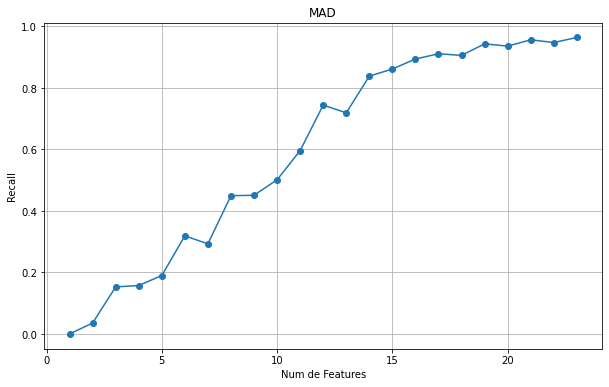

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.95453735 0.9587479  0.95368621 0.9475747  0.96017023 0.92744985
 0.93517333 0.93561809 0.91844627 0.91932902 0.94703512 0.90582365
 0.86270898 0.80046508 0.72782914 0.5880908  0.61283936 0.31683881
 0.25424498 0.15509048 0.11065506 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.1106550622551841, 0.1550904760292142, 0.2542449795116665, 0.3168388138214411, 0.6128393556616659, 0.5880908033910167, 0.7278291397157597, 0.8004650795263414, 0.8627089753575581, 0.9058236535834828, 0.947035118019574, 0.9193290211882104, 0.9184462731552032, 0.9356180929481752, 0.9351733324302663, 0.927449851558355, 0.9601702281373112, 0.947574700576834, 0.9536862067797758, 0.958747897547044, 0.95

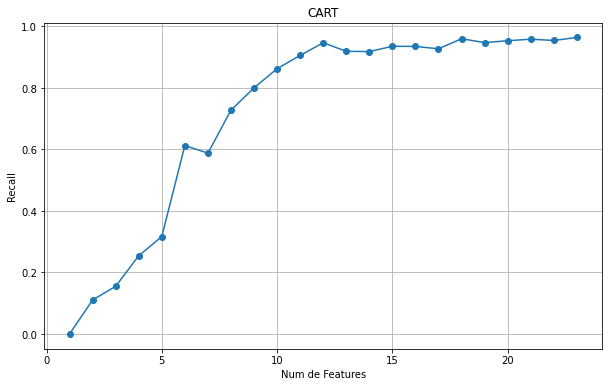

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [9.42106630e-01 9.23918859e-01 9.18843623e-01 9.06871211e-01
 8.96833621e-01 8.48043167e-01 8.28241164e-01 8.17957488e-01
 6.17526274e-01 6.17772359e-01 5.88652963e-01 4.99506700e-01
 4.50217301e-01 3.69020285e-01 2.07802499e-01 1.68995451e-01
 1.83677063e-01 1.08758621e-01 1.19608972e-01 4.42502850e-04
 0.00000000e+00 0.00000000e+00]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0004425028503053, 0.1196089719710567, 0.1087586214681612, 0.1836770632259812, 0.1689954507997787, 0.2078024992380371, 0.3690202851434183, 0.4502173005068464, 0.4995066996286136, 0.5886529626243128, 0.6177723593755291, 0.6175262736067368, 0.8179574881190242, 0.8282411640534164, 0.8480431666045808, 0.896

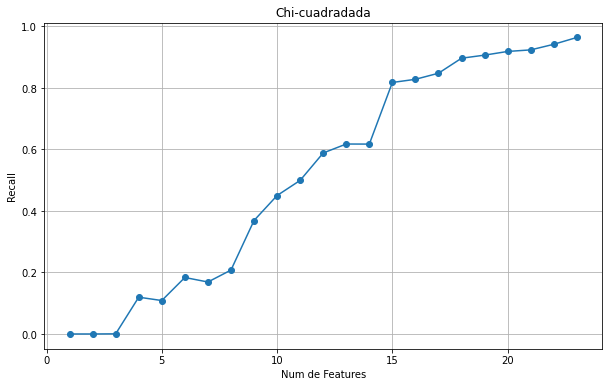

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.95919492 0.94736925 0.9324393  0.92644293 0.93363135 0.94553377
 0.92374728 0.93376906 0.89132943 0.92034497 0.9081197  0.88480703
 0.86902367 0.84641765 0.78884261 0.75164302 0.75025907 0.47527064
 0.3825234  0.33988734 0.07747638 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0774763791526973, 0.3398873423865804, 0.3825233950805423, 0.4752706379039814, 0.7502590673575129, 0.7516430175985189, 0.7888426067030151, 0.8464176459299897, 0.8690236716448237, 0.8848070258615824, 0.9081197015363428, 0.92034497160983, 0.8913294275683791, 0.933769063180828, 0.9237472766884532, 0.9455337690631808, 0.9336313454570084, 0.92644293180715, 0.9324392969623082, 0.9473692528249066, 0.959

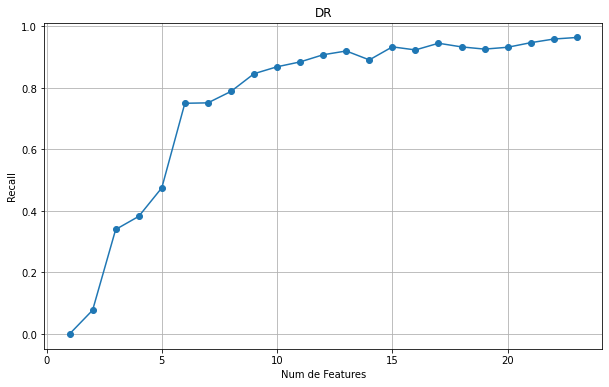

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.96304424 0.95784709 0.94083556 0.94196214 0.94202084 0.94146997
 0.9295111  0.9226049  0.92577692 0.893411   0.88021267 0.89116236
 0.83950693 0.84533397 0.83912086 0.76191315 0.75147143 0.53091989
 0.32404077 0.11133462 0.11065506 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.1106550622551841, 0.1113346202038673, 0.324040773476921, 0.5309198866650863, 0.7514714348606455, 0.7619131475272896, 0.8391208642351586, 0.8453339654802623, 0.8395069253953741, 0.8911623601657128, 0.880212672288259, 0.8934109970988972, 0.9257769198640884, 0.9226048968810322, 0.9295111020804409, 0.9414699673767032, 0.9420208382719812, 0.9419621389142876, 0.9408355627800918, 0.9578470881732084, 0.

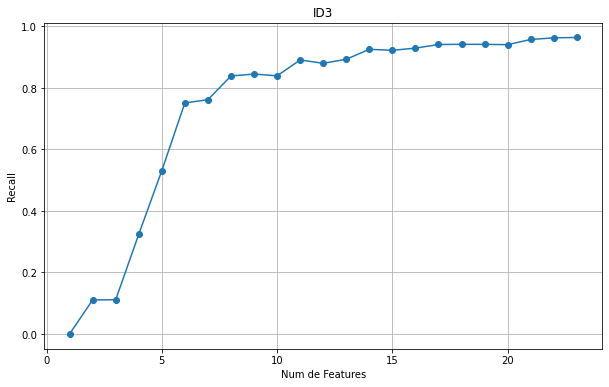

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.95405646 0.95879531 0.95184395 0.9460282  0.94512965 0.93376003
 0.9438789  0.93343944 0.93584612 0.91028932 0.88736496 0.74058948
 0.71985957 0.50506056 0.3818619  0.34915733 0.27570185 0.14073171
 0.11002066 0.08477542 0.02537618 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0253761838644496, 0.084775418515132, 0.1100206576585729, 0.1407317100703263, 0.2757018524162687, 0.3491573255669568, 0.3818618984726878, 0.5050605619334665, 0.7198595730750562, 0.7405894770112996, 0.8873649632564597, 0.9102893201034012, 0.9358461173761388, 0.9334394437107024, 0.943878898709743, 0.9337600325104136, 0.9451296465621366, 0.9460281982683688, 0.9518439500152392, 0.9587953085667196, 0.

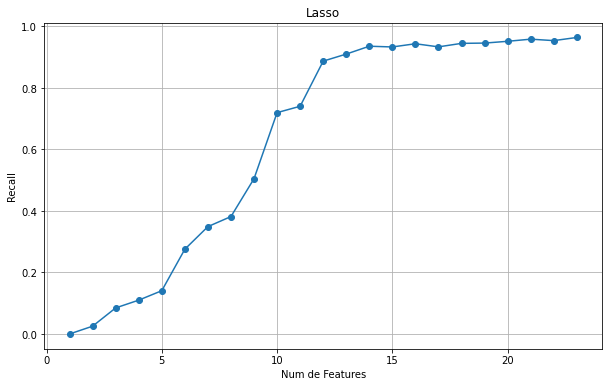

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.94958402 0.9529028  0.94695158 0.9330579  0.93619606 0.9484123
 0.92178536 0.92045108 0.91893167 0.91476853 0.90995519 0.86794676
 0.84735909 0.84845858 0.80639597 0.73660695 0.6891711  0.67559348
 0.37928364 0.20056442 0.12952465 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.1295246480860623, 0.2005644169008996, 0.3792836420693781, 0.675593484371296, 0.6891710973393387, 0.7366069513585515, 0.8063959723209951, 0.848458577443643, 0.8473590933206904, 0.8679467641979072, 0.9099551852980684, 0.9147685326289412, 0.9189316716899772, 0.920451081987199, 0.921785363540926, 0.9484122952577692, 0.9361960558546966, 0.9330578978856944, 0.9469515843182408, 0.9529027961213272, 0.949

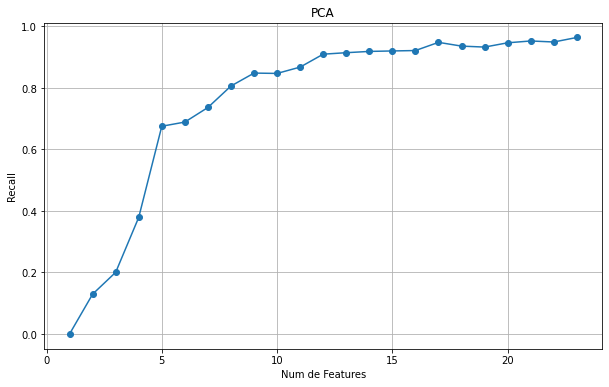

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.94712768 0.93597706 0.9478095  0.89789924 0.90606748 0.83779787
 0.66829445 0.71825663 0.61255715 0.5657715  0.43670064 0.28841704
 0.28061002 0.25670584 0.19014302 0.18553061 0.12645422 0.12387145
 0.12096131 0.12883606 0.09108108 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0910810841319832, 0.1288360594669647, 0.1209613148656123, 0.123871448406651, 0.126454220145168, 0.1855306083285358, 0.1901430232426879, 0.2567058371995891, 0.2806100217864923, 0.2884170363597367, 0.4367006445641008, 0.5657715014618397, 0.6125571472112161, 0.7182566290765011, 0.6682944450088614, 0.8377978710194498, 0.9060674816846715, 0.8978992402948514, 0.9478094980076084, 0.9359770620971476, 0.

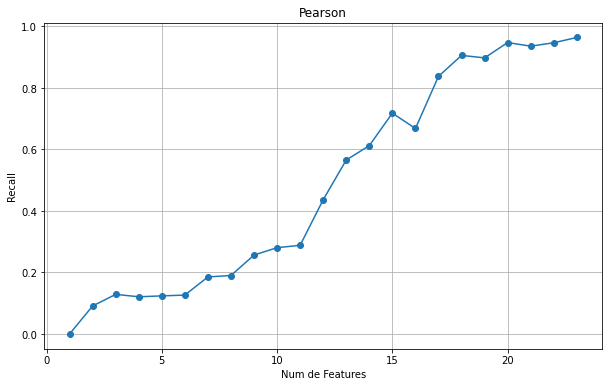

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.96041857 0.95793062 0.95020488 0.87435854 0.88797002 0.89223249
 0.82937903 0.81285064 0.69864653 0.67086819 0.70843578 0.58736158
 0.51154233 0.42237123 0.39666091 0.33869755 0.42475758 0.1749873
 0.15338368 0.10664319 0.03566438 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.035664375134049, 0.1066431869235892, 0.1533836793208935, 0.1749873006197297, 0.4247575829410636, 0.3386975515594839, 0.3966609096142774, 0.4223712282840597, 0.5115423256233985, 0.5873615767550544, 0.7084357750008466, 0.6708681860769639, 0.6986465282716425, 0.8128506439996839, 0.8293790285256302, 0.8922324946098186, 0.8879700181742242, 0.8743585401921276, 0.9502048833350266, 0.9579306218745414, 0.

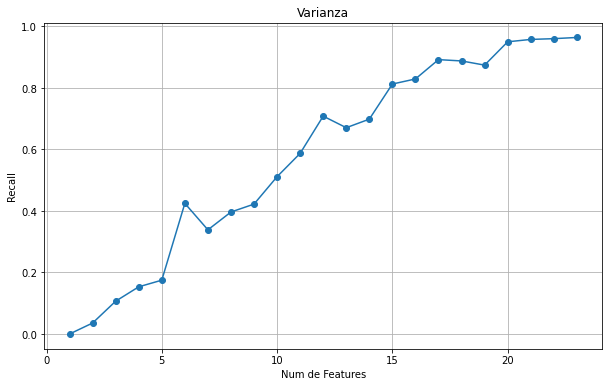

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.96041857 0.95793062 0.95020488 0.87435854 0.88797002 0.89223249
 0.82937903 0.81285064 0.69864653 0.67086819 0.70843578 0.58736158
 0.51154233 0.42237123 0.39666091 0.33869755 0.42475758 0.1749873
 0.15338368 0.10664319 0.03566438 0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.035664375134049, 0.1066431869235892, 0.1533836793208935, 0.1749873006197297, 0.4247575829410636, 0.3386975515594839, 0.3966609096142774, 0.4223712282840597, 0.5115423256233985, 0.5873615767550544, 0.7084357750008466, 0.6708681860769639, 0.6986465282716425, 0.8128506439996839, 0.8293790285256302, 0.8922324946098186, 0.8879700181742242, 0.8743585401921276, 0.9502048833350266, 0.9579306218745414, 0.

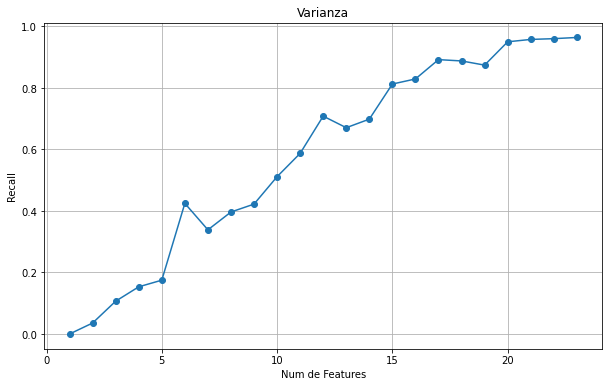

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.84864145 0.58512197 0.05121745 0.19871313 0.         0.        ]
------------------------------------------------------------------------------------------
Entré a Varianza y Centralidad
Valores finales de iteracion_values: (2, 3, 5, 6, 9, 12, 14, 23)
Valores finales de recall_values: (0.0, 0.0, 0.1987131294659487, 0.0512174472552406, 0.5851219704922844, 0.6716, 0.8486414485195345, 0.9643107905223114)


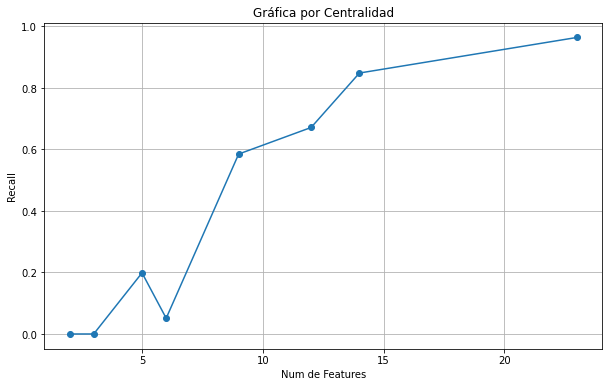

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.82978089 0.58566833 0.18378769 0.2110558  0.         0.        ]
------------------------------------------------------------------------------------------
Entré a Varianza y Centralidad
Valores finales de iteracion_values: (2, 3, 5, 6, 9, 12, 14, 23)
Valores finales de recall_values: (0.0, 0.0, 0.2110557982548229, 0.1837876889385575, 0.5856683260523553, 0.6716, 0.8297808933590708, 0.9643107905223114)


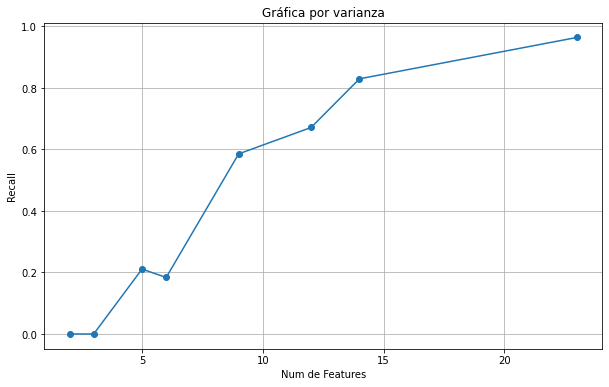

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.87588472 0.70772687 0.21657805 0.1519478  0.09431181 0.10804746
 0.        ]
------------------------------------------------------------------------------------------
Entré a CART e ID3
Valores finales de iteracion_values: (2, 3, 4, 6, 7, 10, 12, 15, 23)
Valores finales de recall_values: (0.0, 0.1080474561730276, 0.094311806472733, 0.1519478027250048, 0.2165780532132254, 0.7077268673733166, 0.6716, 0.8758847234921603, 0.9643107905223114)


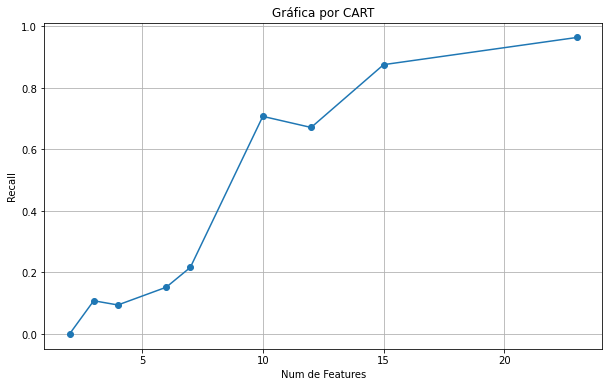

este es el valor de mejor_recall_clase_4: 0.9643107905223114
estos son los valores de recall_values: [0.86746137 0.64095183 0.21657805 0.16133518 0.09431181 0.10804746
 0.        ]
------------------------------------------------------------------------------------------
Entré a CART e ID3
Valores finales de iteracion_values: (2, 3, 4, 6, 7, 10, 12, 15, 23)
Valores finales de recall_values: (0.0, 0.1080474561730276, 0.094311806472733, 0.1613351846207683, 0.2165780532132254, 0.6409518326616772, 0.6716, 0.8674613656631334, 0.9643107905223114)


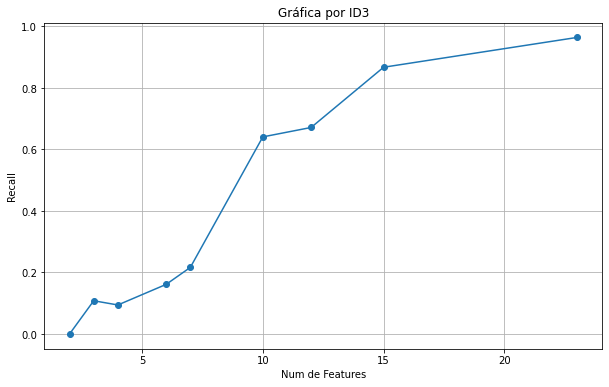

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


    
    
    
def graficar_recall_con_punto_adicional(nombre_archivo_mad, nombre_archivo_completo, titulo_grafica):

    # Cargar los datos
    df_mejores_modelos_mad = pd.read_csv(nombre_archivo_mad)
    df_mejores_modelos_completo = pd.read_csv(nombre_archivo_completo)

    # Extraer el mejor recall de la clase 4
    mejor_recall_clase_4 = df_mejores_modelos_completo['Mejor_Recall_Clase_4'].values[0]
    print('este es el valor de mejor_recall_clase_4:', mejor_recall_clase_4)
    
    # Extraer los valores de recall
    recall_values = df_mejores_modelos_mad['Recall'].values.flatten()
    print('estos son los valores de recall_values:', recall_values)
    print('---' * 30)
    
    # Determinar los valores del eje X (iteraciones o número de características)
    if nombre_archivo_mad in ['Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv', 
                              'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv']:
        print('Entré a Varianza y Centralidad')
        iteracion_values = [14, 9, 6, 5, 3, 2]
        # Agregar el punto adicional en (12, 0.000203190084323885)
        iteracion_values.insert(0, 12)
        recall_values = np.insert(recall_values, 0, 0.6716)
        
    elif nombre_archivo_mad in ['Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv',
                                'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv']:
        print('Entré a CART e ID3')
        iteracion_values = [15, 10, 7, 6, 4, 3, 2]
        # Agregar el punto adicional en (12, 0.000203190084323885)
        iteracion_values.insert(0, 12)
        recall_values = np.insert(recall_values, 0, 0.6716)
        
    else:
        # Para otros archivos, generar una lista descendente de números a partir de 22
        iteracion_values = list(range(22, 22 - len(df_mejores_modelos_mad), -1))

    # Agregar el mejor recall de la clase 4 al inicio
    iteracion_values.insert(0, 23)
    recall_values = np.insert(recall_values, 0, mejor_recall_clase_4)

    # Ordenar ambos arrays basados en iteracion_values
    iteracion_values, recall_values = zip(*sorted(zip(iteracion_values, recall_values)))

    print('Valores finales de iteracion_values:', iteracion_values)
    print('Valores finales de recall_values:', recall_values)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(iteracion_values, recall_values, marker='o')
    
    plt.xlabel('Num de Features')
    plt.ylabel('Recall')
    plt.title(titulo_grafica)
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

    
    
    
    
    
    
    

nombre_archivo_graficar= 'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv'
nombre_archivo_completo = 'Aa_Mejores_Modelos_CCOMPLETO_CLASE4.csv'
titulo_grafica = 'MAD'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv'
titulo_grafica = 'CART'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)




nombre_archivo_graficar = 'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv'
titulo_grafica = 'Chi-cuadradada'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv'
titulo_grafica = 'DR'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv'
titulo_grafica = 'ID3'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4_corregido.csv'
titulo_grafica = 'Lasso'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)




nombre_archivo_graficar = 'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv'
titulo_grafica = 'PCA'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv'
titulo_grafica = 'Pearson'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'
titulo_grafica = 'Varianza'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'
titulo_grafica = 'Varianza'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por Centralidad'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por varianza'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por CART'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por ID3'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)

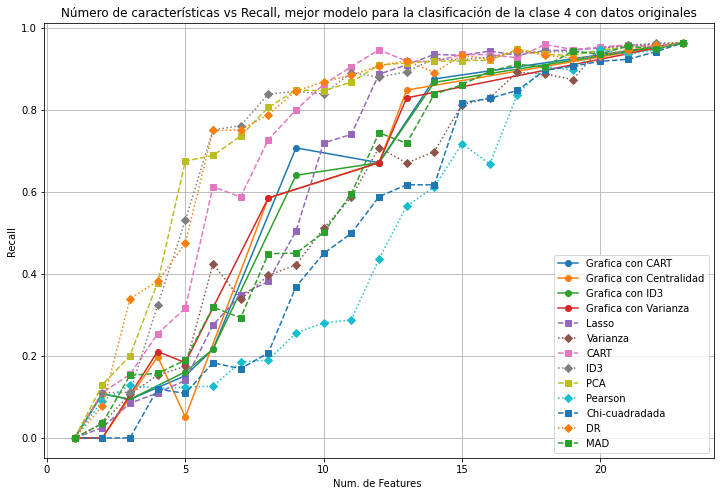

7 valores más grandes de Recall por iteración (excepto iteraciones 23 y 1):

Iteración 1:
  0.0000  Grafica con CART
  0.0000  Grafica con Centralidad
  0.0000  Grafica con ID3
  0.0000  Grafica con Varianza
  0.0000  Lasso
  0.0000  Varianza

Iteración 2:
  0.1295  PCA
  0.1107  CART
  0.1107  ID3
  0.1080  Grafica con CART
  0.1080  Grafica con ID3
  0.0911  Pearson

Iteración 3:
  0.3399  DR
  0.2006  PCA
  0.1551  CART
  0.1530  MAD
  0.1288  Pearson
  0.1113  ID3

Iteración 5:
  0.6756  PCA
  0.5309  ID3
  0.4753  DR
  0.3168  CART
  0.1901  MAD
  0.1838  Grafica con Varianza

Iteración 6:
  0.7515  ID3
  0.7503  DR
  0.6892  PCA
  0.6128  CART
  0.4248  Varianza
  0.3190  MAD

Iteración 9:
  0.8485  PCA
  0.8464  DR
  0.8453  ID3
  0.8005  CART
  0.7077  Grafica con CART
  0.6410  Grafica con ID3

Iteración 12:
  0.9470  CART
  0.9100  PCA
  0.9081  DR
  0.8874  Lasso
  0.8802  ID3
  0.7444  MAD

Iteración 14:
  0.9358  Lasso
  0.9258  ID3
  0.9189  PCA
  0.9184  CART
  0.8913  D

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estilos para las líneas y puntos
# Todos los que contienen "Gráficas" tendrán el mismo estilo
estilo_graficas = {'linestyle': '-', 'marker': 'o'}
# Los otros tendrán dos estilos diferentes para diferenciarlos
estilo_otros1 = {'linestyle': '--', 'marker': 's'}
estilo_otros2 = {'linestyle': ':', 'marker': 'D'}

def graficar_y_calcular_max(nombre_archivos_graficar, nombre_archivo_completo):
    plt.figure(figsize=(12, 8))
    valores_maximos = {}
    legend_labels = []  # Almacena los labels que serán usados en la leyenda

    for index, (nombre_archivo, titulo_grafica) in enumerate(nombre_archivos_graficar.items()):

        df_mejores_modelos = pd.read_csv(nombre_archivo)
        df_mejores_modelos_completo = pd.read_csv(nombre_archivo_completo)

        # Extraer el mejor recall de la clase 4
        mejor_recall_clase_4 = df_mejores_modelos_completo['Mejor_Recall_Clase_4'].values[0]
        recall_values = df_mejores_modelos['Recall'].values.flatten()

        # Determinar los valores del eje X (iteraciones o número de características)
        if nombre_archivo in ['Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv', 
                              'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv']:
            iteracion_values = [13, 8, 5, 4, 2, 1]
            # Insertar el punto adicional en (12, 0.6716)
            iteracion_values.insert(0, 12)
            recall_values = np.insert(recall_values, 0, 0.6716)
        
        elif nombre_archivo in ['Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv',
                                'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv']:
            iteracion_values = [14, 9, 6, 5, 3, 2, 1]
            # Insertar el punto adicional en (12, 0.6716)
            iteracion_values.insert(0, 12)
            recall_values = np.insert(recall_values, 0, 0.6716)
            
        else:
            iteracion_values = list(range(22, 22 - len(df_mejores_modelos), -1))

        # Insertar el valor correspondiente al mejor recall clase 4 al inicio
        iteracion_values.insert(0, 23)
        recall_values = np.insert(recall_values, 0, mejor_recall_clase_4)
        
        # Ordenar ambos arrays basados en iteracion_values
        iteracion_values, recall_values = zip(*sorted(zip(iteracion_values, recall_values)))
    
        # Graficar si hay valores disponibles
        if len(iteracion_values) > 0 and len(recall_values) > 0:
            # Asignar estilos según el nombre del archivo
            if "Grafica" in titulo_grafica:
                plt.plot(iteracion_values, recall_values, label=titulo_grafica, **estilo_graficas)
            elif index % 2 == 0:
                plt.plot(iteracion_values, recall_values, label=titulo_grafica, **estilo_otros1)
            else:
                plt.plot(iteracion_values, recall_values, label=titulo_grafica, **estilo_otros2)

            legend_labels.append(titulo_grafica)

        # Guardar valores máximos para cada iteración
        for i, iteracion in enumerate(iteracion_values):
            if iteracion not in valores_maximos:
                valores_maximos[iteracion] = []
            
            # Añadir el valor y el método correspondiente a la lista de la iteración
            valores_maximos[iteracion].append({'valor': recall_values[i], 'metodo': titulo_grafica})

    plt.xlabel('Num. de Features ')
    plt.ylabel('Recall')
    plt.title('Número de características vs Recall, mejor modelo para la clasificación de la clase 4 con datos originales')
    plt.grid(True)

    # Añadir la leyenda solo si hay etiquetas
    if legend_labels:
        plt.legend()
    else:
        print("No hay datos suficientes para generar una leyenda.")

    plt.show()

    # Excluir iteraciones 23 y 1
    iteraciones_excluir = [24, 0]
    
    # Mostrar los valores máximos de Recall por iteración
    print("7 valores más grandes de Recall por iteración (excepto iteraciones 23 y 1):")
    for iteracion, valores in valores_maximos.items():
        if iteracion not in iteraciones_excluir:
            # Ordenar los valores en orden descendente
            valores_ordenados = sorted(valores, key=lambda x: x['valor'], reverse=True)

            # Tomar los 6 primeros valores o los que haya disponibles
            mejores_valores = valores_ordenados[:6]
            
            # Imprimir los resultados para la iteración
            print(f"\nIteración {iteracion}:")
            for valor_info in mejores_valores:
                    print(f"  {valor_info['valor']:.4f}  {valor_info['metodo']}")

# Definición de la variable nombre_archivos_graficar fuera de la función
nombre_archivos_graficar = {
      
    'Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv': 'Grafica con CART',
    'Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv': 'Grafica con Centralidad',
    'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv': 'Grafica con ID3',
    'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv': 'Grafica con Varianza',

        'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4_corregido.csv': 'Lasso',
    'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv': 'Varianza',
    'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv': 'CART',
    'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv': 'ID3',
    'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv': 'PCA',
    'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv': 'Pearson',
    'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv': 'Chi-cuadradada',
    'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv': 'DR',
    'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv': 'MAD'}
  

nombre_archivo_completo = 'Aa_Mejores_Modelos_CCOMPLETO_CLASE4.csv'
graficar_y_calcular_max(nombre_archivos_graficar, nombre_archivo_completo)


# Data Frame con Smote

In [ ]:
TIMES2 = 'SMOTE_DATA.csv'
#'sonar.all-data.csv'
#'/content/drive/My Drive/Maestria-programas/Muestras_Unidas/SMOTE_CTGAN/SMOTE_DATA.csv'

df_red_neuronal2 = pd.read_csv(TIMES2)

# Obtén el número de columnas del DataFrame
num_columnas2 = df_red_neuronal2.shape[1]

# Imprime el número de columnas
print("Número de columnas:", num_columnas2)

In [ ]:
df_red_neuronal2.describe().T

In [ ]:
df_red_neuronal2.info()

In [ ]:
Tiempo, accuracy= experimentosMLP(df_red_neuronal2, nombre_archivo='Smote_Completo')

# Crear un DataFrame con los valores de tiempo_total y acc_promedio
Smote_rendimiento_completo_Smote = pd.DataFrame({'Num_Características': 23,'Tiempo_Total': Tiempo, 'Accuracy_Promedio': accuracy}, index=[23])

# Guardar el DataFrame en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Smote_completo.csv'
Smote_rendimiento_completo_Smote.to_csv(guardar_rendimiento, index=True)

In [ ]:
ruta_modelos = 'Modelo_neuronal_Smote_Completo.pkl'
modelos_cargados = cargar_modelos(ruta_modelos)

# Datos de prueba
X_test = df_red_neuronal2.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal2['IMECA_Total']

# Evaluar cada modelo y obtener su rendimiento
rendimientos = {}
i = 1
for nombre_modelo, modelo in modelos_cargados.items():

    rendimiento = evaluar_modelo(modelo, X_test, y_test)
    rendimientos[nombre_modelo] = rendimiento
    print('acabé ', i, ' veces.')
    print('Rendimiento del modelo', nombre_modelo, 'es:', rendimiento)
    i += 1
    print(' ')

print(' ')
print(' ')
print(' ')
print(' ')
print(' ')
print(' ')
# Seleccionar el modelo con el mejor rendimiento
mejor_modelo = max(rendimientos, key=rendimientos.get)
print("El mejor modelo es:", mejor_modelo)
print("Con una precisión de:", rendimientos[mejor_modelo])


In [ ]:
X_test = df_red_neuronal2.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal2['IMECA_Total']


# Cargar el modelo específico del archivo pkl
ruta_modelo = 'Modelo_neuronal_Smote_Completo.pkl'
with open(ruta_modelo, 'rb') as f:
    modelos_cargados = pickle.load(f)

# Extraer el modelo específico
modelo_prueba_kfold_9 = modelos_cargados['modelo_prueba_kfold_9']

# Obtener las predicciones del modelo en todo el conjunto de datos
y_pred = modelo_prueba_kfold_9.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels = [x + 1 for x in y_pred_labels]

# Definir etiquetas de las clases
labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")

plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

print("Matriz de Confusión:")
print(conf_matrix)